In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import datetime as dt

The [data set](https://drive.google.com/drive/folders/1Pkn9zuCi9fpc73KEfjOl6uLv3ZGTVVWW) contains information about users who have downloaded the Scanner application. There are many functions available, but we have limited ourselves to two: automatic document scanning and editing. During editing, the user can manually correct inaccuracies and errors caused by automatic scanning. To start using the program and take a trial, each user undergoes onboarding—we consider this event to be the first interaction with the application.

- Users who have not taken a trial are offered 3 free scans.
- The number of scans is not restricted for users who have taken a trial or paid for a recurring subscription.
- There is also payment information: when the user took a trial, paid for a recurring subscription, or canceled it.
- The trial is always free.
- The subscription is $7 and is charged automatically.
- There can be no refunds after the subscription is canceled.

It is necessary to analyze the document editing functionality - **who uses it and how, how it affects payments and revenues**.

Please draw up conclusions and suggestions for the product team. Add your thoughts and comments - imagine that a person without analytical skills will be checking the task.

Набір даних містить інформацію про користувачів, які завантажили додаток "Сканер". Існує багато функцій, але ми обмежилися двома: автоматичне сканування та редагування документів. Під час редагування користувач може вручну виправити неточності та помилки, спричинені автоматичним скануванням. Щоб почати користуватися програмою і пройти пробну версію, кожен користувач проходить онбордінг - ми вважаємо цю подію першою взаємодією з додатком.

 - Користувачам, які не пройшли пробну версію, пропонується 3 безкоштовних сканування.
 - Для користувачів, які пройшли пробну версію або оплатили постійну підписку, кількість сканувань не обмежена.
 - Також є інформація про оплату: коли користувач взяв пробну версію, оплатив постійну підписку або скасував її.
 - Пробна версія завжди безкоштовна.
 - Підписка коштує $7 і списується автоматично.
 - Після скасування підписки кошти не повертаються.

Необхідно проаналізувати функціонал редагування документів - хто і як ним користується, як він впливає на платежі та доходи.

Будь ласка, сформулюйте висновки та пропозиції для команди продукту. Додайте свої думки та коментарі - уявіть, що перевіряти завдання буде людина без аналітичних навичок

In [267]:
df_event = pd.read_csv('test1_app_events.csv')
df_event['event_time'] = pd.to_datetime(df_event['event_time'])
df_event['date'] = df_event['event_time'].dt.date
df_event.head()

user_id  event_type  \
0  scanner2#1be57a04-46ec-444d-8c76-c1b53dee6577  onboarding   
1  scanner2#bd9f0919-0c3d-470d-bd3d-24d149af090d  onboarding   
2  scanner2#09bdb831-fdc6-44b8-9669-96a4986a7c9f  onboarding   
3  scanner2#12423868-9f1d-46fe-b75f-e1549a5594bc  onboarding   
4  scanner2#20cab808-9625-4abe-84a0-cf4fed173cf3  onboarding   

               event_time        date  
0 2022-11-22 07:36:51.615  2022-11-22  
1 2022-11-25 21:34:08.374  2022-11-25  
2 2022-11-25 21:24:51.861  2022-11-25  
3 2022-11-23 00:06:50.579  2022-11-23  
4 2022-11-25 17:40:08.846  2022-11-25

In [3]:
len(df_event[df_event['event_type'] == 'onboarding']['user_id'].value_counts())

115077

In [4]:
df_event['event_time'].max(), df_event['event_time'].min() 

(Timestamp('2023-04-18 03:46:20.025000'),
 Timestamp('2022-11-01 00:00:36.334000'))

In [5]:
df_event['event_type'].value_counts()

event_type
onboarding    115077
scan           70216
adjustment     18108
Name: count, dtype: int64

In [6]:
df = df_event.groupby(['user_id', 'event_type'])['event_type'].value_counts().reset_index()
df

user_id  event_type  count
0                02071cf9-a224-4746-9fb9-ea840a8898da  onboarding      1
1                10cc6f3d-03a2-4dd1-b39e-0704b0dbe0f7  onboarding      1
2                146622ff-012a-45ac-bfe2-908d2a2e2950  onboarding      1
3                253858a4-8fae-46e4-997a-96d0be43a02b  onboarding      1
4                26e60d18-634a-444f-b565-51e09d7cc9ba  onboarding      1
...                                               ...         ...    ...
156239  scanner2#fffdc156-fb66-441f-978e-60678264c29f  adjustment      1
156240  scanner2#fffdc156-fb66-441f-978e-60678264c29f  onboarding      1
156241  scanner2#fffdc156-fb66-441f-978e-60678264c29f        scan      3
156242  scanner2#fffe32e9-3fb4-4956-b8d3-d4062238a6fa  onboarding      1
156243  scanner2#fffee3a4-5c22-444e-b45f-ee8fff877c78  onboarding      1

[156244 rows x 3 columns]

In [7]:
df.sort_values(by='user_id', ascending = True)

user_id  event_type  count
0                02071cf9-a224-4746-9fb9-ea840a8898da  onboarding      1
1                10cc6f3d-03a2-4dd1-b39e-0704b0dbe0f7  onboarding      1
2                146622ff-012a-45ac-bfe2-908d2a2e2950  onboarding      1
3                253858a4-8fae-46e4-997a-96d0be43a02b  onboarding      1
4                26e60d18-634a-444f-b565-51e09d7cc9ba  onboarding      1
...                                               ...         ...    ...
156240  scanner2#fffdc156-fb66-441f-978e-60678264c29f  onboarding      1
156239  scanner2#fffdc156-fb66-441f-978e-60678264c29f  adjustment      1
156241  scanner2#fffdc156-fb66-441f-978e-60678264c29f        scan      3
156242  scanner2#fffe32e9-3fb4-4956-b8d3-d4062238a6fa  onboarding      1
156243  scanner2#fffee3a4-5c22-444e-b45f-ee8fff877c78  onboarding      1

[156244 rows x 3 columns]

In [8]:
len(df_event['user_id'].value_counts())

115077

In [268]:
df_pay = pd.read_csv('test1_payments.csv')
df_pay['event_time'] = pd.to_datetime(df_pay['event_time'])
df_pay['date'] = df_pay['event_time'].dt.date
trials = df_pay[df_pay['event_type'] == 'took_trial']['user_id']

In [10]:
trials

9        scanner2#dbd5ece0-5b36-4c07-b210-778fb98238df
40       scanner2#e16ae40c-d14a-491b-a864-f5765a71c3af
70       scanner2#58ce487a-3f5f-4cf1-b001-5e00e44f9f12
71       scanner2#7d37c01f-193d-427b-805a-cdaef9f485fb
73       scanner2#d7227dd4-3b00-4f23-aa87-03433473f1eb
                             ...                      
35223    scanner2#88a6e63b-6a9e-4e12-b4f8-5a469c458e31
35311    scanner2#2460c3a4-1905-48b0-8121-bd525696e78c
35314    scanner2#1c18b6b4-3126-4ce2-89c6-0a2f3a421720
35325    scanner2#c33e3bde-b1a7-4457-aab5-30fbbbc80293
35366    scanner2#76fecf82-91cb-4997-b10e-88477efc2588
Name: user_id, Length: 8226, dtype: object

In [11]:
payers = df_pay[df_pay['event_type'] == 'payment']['user_id']

In [12]:
payers

0        scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f
1        scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39
2        scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5
3        scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7
4        scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b
                             ...                      
35405    scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de
35406    scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc
35407    scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073
35408    scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0
35409    scanner2#a630e2e3-bf2c-4d94-9410-9af1570f622f
Name: user_id, Length: 20892, dtype: object

In [13]:
df_trials_event = df_event[((~df_event['user_id'].isin(payers)) & (df_event['user_id'].isin(trials)))]
df_trials_event.head()

user_id  event_type  \
18  scanner2#88c8fafe-fd39-4774-abb1-bd64c94d023c  onboarding   
30  scanner2#e0de5cdf-31cf-49b6-accf-26d6ee2fa7df  onboarding   
76  scanner2#58666c56-107e-48bf-97be-e0db9a717f1d  onboarding   
81  scanner2#f9873802-69a1-44c4-a36f-dfa271c5d542  onboarding   
98  scanner2#98167b22-f357-4dbf-8c36-d3213c669e41  onboarding   

                event_time        date  
18 2022-11-29 09:13:39.333  2022-11-29  
30 2022-11-28 08:42:47.211  2022-11-28  
76 2022-11-16 12:26:58.937  2022-11-16  
81 2022-11-20 01:05:41.616  2022-11-20  
98 2022-11-26 14:44:47.853  2022-11-26

In [14]:
df_payers_event = df_event[((df_event['user_id'].isin(payers)) & ~(df_event['user_id'].isin(trials)))]
df_payers_event.head()

user_id  event_type  \
1197  scanner2#7ee551eb-71b6-44fd-860f-9042ab2c8c84  onboarding   
2621  scanner2#4ea3c7f9-5499-4400-ae23-c90e02cd0c84  onboarding   
3035  scanner2#8ba3cf6c-3271-4396-8b35-ab7ca9743410  onboarding   
5568  scanner2#af572b8f-16b9-42fb-a70e-ee74bf4740a1  onboarding   
7379  scanner2#a7bb6638-72a9-42aa-b862-2a8fca7f905b  onboarding   

                  event_time        date  
1197 2022-11-14 17:43:25.632  2022-11-14  
2621 2022-11-29 18:25:57.802  2022-11-29  
3035 2022-11-07 05:32:40.550  2022-11-07  
5568 2022-11-28 21:44:49.487  2022-11-28  
7379 2022-11-28 17:47:56.462  2022-11-28

In [15]:
df_not_payers_event = df_event[~((df_event['user_id'].isin(payers)) | (df_event['user_id'].isin(trials)))]
df_not_payers_event.head()

user_id  event_type  \
0  scanner2#1be57a04-46ec-444d-8c76-c1b53dee6577  onboarding   
1  scanner2#bd9f0919-0c3d-470d-bd3d-24d149af090d  onboarding   
2  scanner2#09bdb831-fdc6-44b8-9669-96a4986a7c9f  onboarding   
3  scanner2#12423868-9f1d-46fe-b75f-e1549a5594bc  onboarding   
4  scanner2#20cab808-9625-4abe-84a0-cf4fed173cf3  onboarding   

               event_time        date  
0 2022-11-22 07:36:51.615  2022-11-22  
1 2022-11-25 21:34:08.374  2022-11-25  
2 2022-11-25 21:24:51.861  2022-11-25  
3 2022-11-23 00:06:50.579  2022-11-23  
4 2022-11-25 17:40:08.846  2022-11-25

In [16]:
adj_scan_notpayer = df_not_payers_event[df_not_payers_event['event_type'] != 'onboarding']['user_id'].value_counts().reset_index().shape[0]
df_not_payers_event[df_not_payers_event['event_type'] != 'onboarding']['user_id'].value_counts().reset_index().head()

user_id  count
0  scanner2#a3b20430-67be-4153-8fe2-3613c01b976f   1306
1  scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159    281
2  scanner2#36536fe8-8c5d-4c8d-9885-410cc1c228c3    176
3  scanner2#f1910ea4-6018-446c-86a8-af3e7d0462a4    160
4  scanner2#b328c384-f593-4a11-be16-793bbfea30c2    157

In [17]:
df_not_payers_event.shape

(168999, 4)

In [18]:
df_not_payers_event.shape[0] + df_payers_event.shape[0] + df_trials_event.shape[0]

188464

In [35]:
df_event.shape

(203401, 5)

In [36]:
# plt.figure(figsize=(16, 5))
# sns.barplot(data=qwe,hue = 'payer/not_payer', x = 'payer/not_payer', y = 'num_of_users', palette = ['blue', 'red']);

In [37]:
df_pay['event_type'].value_counts()

event_type
payment                   20892
took_trial                 8226
cancelled_subscription     6292
Name: count, dtype: int64

In [38]:
onboarding_user = df_event[df_event['event_type'] == 'onboarding']
onboarding_user

user_id  event_type  \
0       scanner2#1be57a04-46ec-444d-8c76-c1b53dee6577  onboarding   
1       scanner2#bd9f0919-0c3d-470d-bd3d-24d149af090d  onboarding   
2       scanner2#09bdb831-fdc6-44b8-9669-96a4986a7c9f  onboarding   
3       scanner2#12423868-9f1d-46fe-b75f-e1549a5594bc  onboarding   
4       scanner2#20cab808-9625-4abe-84a0-cf4fed173cf3  onboarding   
...                                               ...         ...   
199476  scanner2#8cab39b8-79f5-44c2-b82b-e91de7bcabac  onboarding   
199477  scanner2#5f46ed8f-a783-47bf-9ccc-f40d60ddd096  onboarding   
199478  scanner2#60510599-4569-4213-9b83-e8c9d9096563  onboarding   
199479  scanner2#d586ec05-9cf2-4224-9b2b-396d3492bd2f  onboarding   
199480  scanner2#485d5f6a-45b3-4f7b-91ed-84521a0037a3  onboarding   

                    event_time        date   day  
0      2022-11-22 07:36:51.615  2022-11-22  22.0  
1      2022-11-25 21:34:08.374  2022-11-25  25.0  
2      2022-11-25 21:24:51.861  2022-11-25  25.0  
3      2022-11-23 00:06:50.579  2022-11-23  23.0  
4      2022-11-25 17:40:08.846  2022-11-25  25.0  
...                        ...         ...   ...  
199476 2022-11-29 02:23:54.919  2022-11-29  29.0  
199477 2022-11-29 18:14:45.529  2022-11-29  29.0  
199478 2022-11-28 19:39:20.120  2022-11-28  28.0  
199479 2022-11-17 20:36:10.777  2022-11-17  17.0  
199480 2022-11-26 16:29:40.115  2022-11-26  26.0  

[115077 rows x 5 columns]

In [39]:
users_pay = onboarding_user[onboarding_user['user_id'].isin(payers)]

In [40]:
users_pay.value_counts()

user_id                                        event_type  event_time               date        day 
scanner2#00076efd-13ee-40bb-9338-92dd6307606f  onboarding  2022-11-01 17:41:13.824  2022-11-01  1.0     1
scanner2#a94e62a9-c425-4f52-a016-1f6964ab1b0c  onboarding  2022-11-07 08:55:47.262  2022-11-07  7.0     1
scanner2#a96720da-bfe1-4190-91ad-77e3f30c6232  onboarding  2022-11-08 16:33:39.304  2022-11-08  8.0     1
scanner2#a96aa5fc-d9c4-4ec5-90b8-b5ad39271550  onboarding  2022-11-16 19:58:26.719  2022-11-16  16.0    1
scanner2#a975ffef-fe91-412f-943e-d48961a778e0  onboarding  2022-11-19 18:39:56.597  2022-11-19  19.0    1
                                                                                                       ..
scanner2#561ef3fc-654b-4a4b-a462-b8f79f3d6906  onboarding  2022-11-15 00:12:01.904  2022-11-15  15.0    1
scanner2#5637002c-3d5c-43d1-8f5b-d8dbb1dcd46e  onboarding  2022-11-26 08:15:07.447  2022-11-26  26.0    1
scanner2#5667e26f-ba93-4e59-8ad0-dff1f578aebb  onbo

In [41]:
users_trial = onboarding_user[onboarding_user['user_id'].isin(trials)]
users_trial.value_counts()

user_id                                        event_type  event_time               date        day 
scanner2#00076efd-13ee-40bb-9338-92dd6307606f  onboarding  2022-11-01 17:41:13.824  2022-11-01  1.0     1
scanner2#a9439fe4-8739-4ccd-8aae-968ef84dcf73  onboarding  2022-11-16 16:24:14.570  2022-11-16  16.0    1
scanner2#abc2eea8-73e6-48b3-906b-76cfbc70419b  onboarding  2022-11-04 12:14:41.201  2022-11-04  4.0     1
scanner2#abc2cc99-12eb-472f-aa5f-1dc5babc4d3c  onboarding  2022-11-24 06:26:40.843  2022-11-24  24.0    1
scanner2#abc259c4-5d69-430b-afeb-7293871d71ee  onboarding  2022-11-29 09:16:50.218  2022-11-29  29.0    1
                                                                                                       ..
scanner2#578216ef-b805-451c-ad98-07d5a4f30838  onboarding  2022-11-05 17:22:02.584  2022-11-05  5.0     1
scanner2#57768347-cbfe-4bce-a324-92141786842f  onboarding  2022-11-10 08:58:12.326  2022-11-10  10.0    1
scanner2#5773dd25-d934-4b17-b4ca-d35f45ee1cc1  onbo

In [42]:
users_not_trial_or_pay = onboarding_user[~((onboarding_user['user_id'].isin(payers)) | (onboarding_user['user_id'].isin(trials)))]
users_not_trial_or_pay.value_counts()

user_id                                        event_type  event_time               date        day 
02071cf9-a224-4746-9fb9-ea840a8898da           onboarding  2022-11-17 19:26:36.940  2022-11-17  17.0    1
scanner2#aa2512d9-d1d8-4594-aca5-56fe76a1e9c2  onboarding  2022-11-15 18:45:32.066  2022-11-15  15.0    1
scanner2#aa4b020c-97c9-4904-bc66-95c1bf0e7c3d  onboarding  2022-11-10 13:20:53.892  2022-11-10  10.0    1
scanner2#aa4afb3a-e035-4a2e-a198-918542b80862  onboarding  2022-11-24 12:59:05.032  2022-11-24  24.0    1
scanner2#aa4ac14e-9089-4528-a502-b274054396cc  onboarding  2022-11-05 23:24:24.643  2022-11-05  5.0     1
                                                                                                       ..
scanner2#55a268aa-c972-4b84-9f03-1bdd09820911  onboarding  2022-11-28 10:36:14.500  2022-11-28  28.0    1
scanner2#55a21f81-3850-4f27-922d-e6ddce1471af  onboarding  2022-11-03 05:08:22.721  2022-11-03  3.0     1
scanner2#55a18120-54b9-4943-a5d3-e9fefaebf428  onbo

In [43]:
users_pay.shape[0] + users_trial.shape[0] + users_not_trial_or_pay.shape[0]

118193

In [44]:
df_pay.head()

user_id event_type  \
0  scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f    payment   
1  scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39    payment   
2  scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5    payment   
3  scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7    payment   
4  scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b    payment   

               event_time        date  month  
0 2023-02-05 13:03:54.032  2023-02-05    2.0  
1 2023-02-05 13:06:50.305  2023-02-05    2.0  
2 2023-02-05 13:12:03.019  2023-02-05    2.0  
3 2023-02-05 13:29:46.132  2023-02-05    2.0  
4 2023-02-05 13:53:28.473  2023-02-05    2.0

In [45]:
df_pay['event_time'].max(), df_pay['event_time'].min()

(Timestamp('2023-04-18 03:25:05.823000'),
 Timestamp('2022-11-01 00:06:10.670000'))

In [46]:
df_pay['month'] = df_pay[df_pay['event_type'] == 'payment']['event_time'].dt.month
df_m = df_pay['month'].value_counts().reset_index()

In [47]:
df_event['day'] = df_event[df_event['event_type'] == 'onboarding']['event_time'].dt.day
df_d = df_event['day'].value_counts().reset_index()

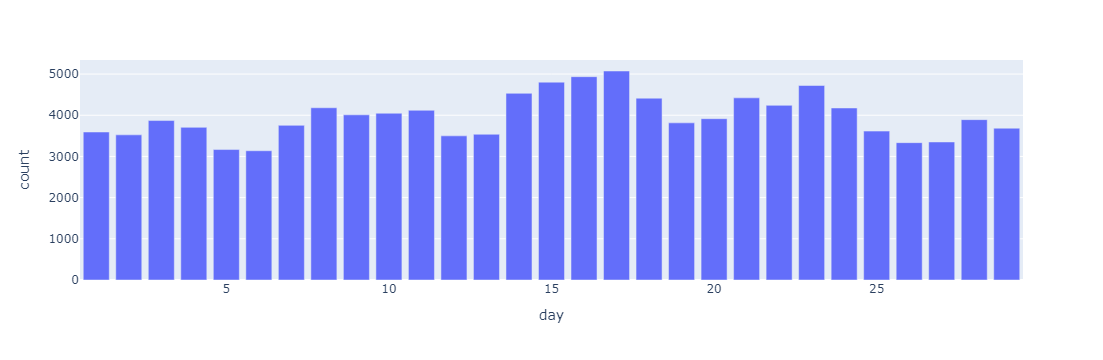

In [48]:
px.bar(data_frame = df_d, x='day', y='count')

In [49]:
df_event['event_time'].dt.day

0         22
1         25
2         25
3         23
4         25
          ..
203396    13
203397    13
203398    15
203399    15
203400    15
Name: event_time, Length: 203401, dtype: int32

In [50]:
df_event['event_time'].max(), df_event['event_time'].min()

(Timestamp('2023-04-18 03:46:20.025000'),
 Timestamp('2022-11-01 00:00:36.334000'))

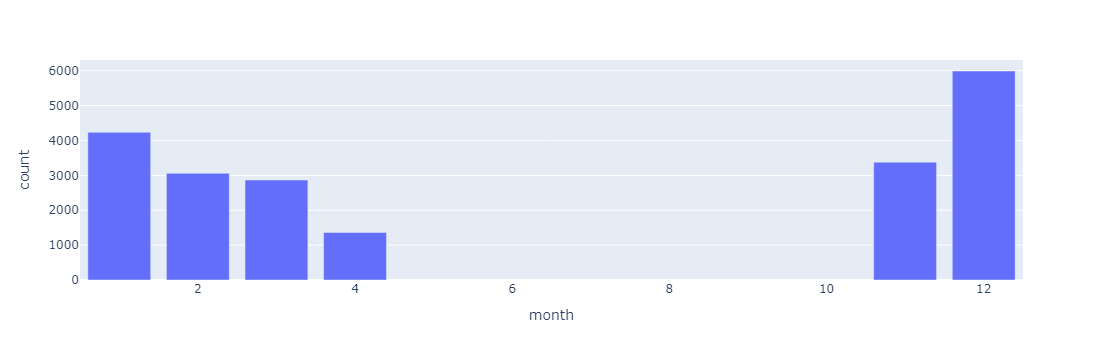

In [51]:
px.bar(data_frame = df_m, x='month', y='count')

In [52]:
df_pay[df_pay['event_type'] == 'payment'].min()

user_id       scanner2#00076efd-13ee-40bb-9338-92dd6307606f
event_type                                          payment
event_time                       2022-11-05 18:14:48.938000
date                                             2022-11-05
month                                                   1.0
dtype: object

In [53]:
df_pay[df_pay['user_id'] == 'scanner2#00076efd-13ee-40bb-9338-92dd6307606f']

user_id              event_type  \
251    scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
1123   scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
1947   scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
2737   scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
3532   scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
4252   scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
4937   scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
5591   scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
5819   scanner2#00076efd-13ee-40bb-9338-92dd6307606f  cancelled_subscription   
8155   scanner2#00076efd-13ee-40bb-9338-92dd6307606f              took_trial   
8701   scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
12730  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
14152  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
17503  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
20713  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
22277  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
23642  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
25924  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
30340  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
31545  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
32586  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
33705  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   
34729  scanner2#00076efd-13ee-40bb-9338-92dd6307606f                 payment   

                   event_time        date  month  
251   2023-02-07 10:42:51.797  2023-02-07    2.0  
1123  2023-02-14 10:43:07.031  2023-02-14    2.0  
1947  2023-02-21 10:42:49.615  2023-02-21    2.0  
2737  2023-02-28 10:43:40.825  2023-02-28    2.0  
3532  2023-03-07 10:44:34.749  2023-03-07    3.0  
4252  2023-03-14 09:42:23.435  2023-03-14    3.0  
4937  2023-03-21 09:42:31.266  2023-03-21    3.0  
5591  2023-03-28 09:43:43.621  2023-03-28    3.0  
5819  2023-03-30 12:43:47.581  2023-03-30    NaN  
8155  2022-11-01 17:42:26.801  2022-11-01    NaN  
8701  2022-11-29 10:42:56.399  2022-11-29   11.0  
12730 2022-12-06 10:43:40.561  2022-12-06   12.0  
14152 2022-11-08 10:45:03.906  2022-11-08   11.0  
17503 2022-11-15 10:43:30.358  2022-11-15   11.0  
20713 2022-12-13 10:43:14.994  2022-12-13   12.0  
22277 2022-12-20 10:44:19.099  2022-12-20   12.0  
23642 2022-12-27 10:42:40.697  2022-12-27   12.0  
25924 2022-11-22 10:43:50.456  2022-11-22   11.0  
30340 2023-01-03 10:49:44.386  2023-01-03    1.0  
31545 2023-01-10 10:44:06.071  2023-01-10    1.0  
32586 2023-01-17 10:48:47.520  2023-01-17    1.0  
33705 2023-01-24 10:44:54.855  2023-01-24    1.0  
34729 2023-01-31 10:43:46.596  2023-01-31    1.0

In [54]:
df_pay['date'] = df_pay['event_time'].dt.date

In [55]:
df_pay[df_pay['event_type'] == 'cancelled_subscription']['user_id'].value_counts()

user_id
scanner2#56f2ef19-618f-4de3-b94d-67c978bb5943    4
scanner2#866050dd-9872-47c7-9c5d-3c7230c88763    4
scanner2#0d67c906-1b7a-4ce2-a441-dee31f8473b2    4
scanner2#9c8bb663-40dd-4594-929c-ec8c0ab29877    4
scanner2#952b594a-4f4c-4bdf-a8d5-d708d772dd4e    3
                                                ..
scanner2#3dd28ab6-99dd-4ff1-ac47-967009bd7e08    1
scanner2#ad380c9c-27d1-4cd4-9d4e-dd3e03fc80c0    1
scanner2#0d0c81e3-7d84-438e-932b-6c0979680399    1
scanner2#343c6b2c-f06f-44e2-ad4a-3206ec8b6552    1
scanner2#bc938cc1-3654-4dba-8339-db3abe411cff    1
Name: count, Length: 6147, dtype: int64

In [56]:
total_revenue = df_pay[df_pay['event_type'] == 'payment'].shape[0] * 7 
total_revenue

146244

In [57]:
payers

0        scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f
1        scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39
2        scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5
3        scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7
4        scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b
                             ...                      
35405    scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de
35406    scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc
35407    scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073
35408    scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0
35409    scanner2#a630e2e3-bf2c-4d94-9410-9af1570f622f
Name: user_id, Length: 20892, dtype: object

In [58]:
df_payer_user = df_pay[df_pay['event_type'] == 'payment']['user_id']
df_payer_user

0        scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f
1        scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39
2        scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5
3        scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7
4        scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b
                             ...                      
35405    scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de
35406    scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc
35407    scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073
35408    scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0
35409    scanner2#a630e2e3-bf2c-4d94-9410-9af1570f622f
Name: user_id, Length: 20892, dtype: object

In [59]:
df_event[df_event['user_id'].isin(df_payer_user)]

user_id  event_type  \
102     scanner2#b3f9b5c1-946b-4584-b52e-bd9dd54f9260  onboarding   
173     scanner2#e436ece5-bfa2-4465-9ac2-61cfb59fe0aa  onboarding   
191     scanner2#1d864a59-ef8c-4a91-bab7-bfa938264306  onboarding   
237     scanner2#1125393e-0c76-4960-88b0-ed7005543b16  onboarding   
248     scanner2#26070c59-7820-49f1-b196-1737223340ff  onboarding   
...                                               ...         ...   
203369  scanner2#f0628613-f348-409b-803c-2db8b8f9a6f9        scan   
203388  scanner2#4d6c73ad-44e4-405a-93c2-92efa8ebaecb        scan   
203398  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   
203399  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36  adjustment   
203400  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   

                    event_time        date   day  
102    2022-11-07 01:02:00.641  2022-11-07   7.0  
173    2022-11-26 19:53:10.059  2022-11-26  26.0  
191    2022-11-04 05:50:47.304  2022-11-04   4.0  
237    2022-11-23 00:14:57.530  2022-11-23  23.0  
248    2022-11-20 03:01:18.235  2022-11-20  20.0  
...                        ...         ...   ...  
203369 2022-11-16 07:04:19.831  2022-11-16   NaN  
203388 2022-12-08 19:23:08.638  2022-12-08   NaN  
203398 2022-11-15 13:10:05.930  2022-11-15   NaN  
203399 2022-11-15 13:11:51.037  2022-11-15   NaN  
203400 2022-11-15 13:09:18.182  2022-11-15   NaN  

[15255 rows x 5 columns]

### Підозрілі юзери !!!

In [60]:
df_took_trial = df_pay[df_pay['event_type'] == 'took_trial']['user_id']
df_took_trial

9        scanner2#dbd5ece0-5b36-4c07-b210-778fb98238df
40       scanner2#e16ae40c-d14a-491b-a864-f5765a71c3af
70       scanner2#58ce487a-3f5f-4cf1-b001-5e00e44f9f12
71       scanner2#7d37c01f-193d-427b-805a-cdaef9f485fb
73       scanner2#d7227dd4-3b00-4f23-aa87-03433473f1eb
                             ...                      
35223    scanner2#88a6e63b-6a9e-4e12-b4f8-5a469c458e31
35311    scanner2#2460c3a4-1905-48b0-8121-bd525696e78c
35314    scanner2#1c18b6b4-3126-4ce2-89c6-0a2f3a421720
35325    scanner2#c33e3bde-b1a7-4457-aab5-30fbbbc80293
35366    scanner2#76fecf82-91cb-4997-b10e-88477efc2588
Name: user_id, Length: 8226, dtype: object

In [61]:
df_took_trial.value_counts()

user_id
scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb    2
scanner2#3f5588db-5fd5-45f4-bde5-cdfcc04a9974    2
scanner2#4fe479a0-403a-42c0-bfe3-ddb96aa15c4f    2
scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9    2
scanner2#7df49a32-8d66-45de-b66a-06722c7ccc22    2
                                                ..
scanner2#ed51b662-dcbe-44c6-a554-44dd0ad06fd5    1
scanner2#9c5c8907-97c8-4092-8916-060fcfd17989    1
scanner2#5bea6f3f-f826-4285-a686-416a24804981    1
scanner2#89009d75-ddbc-4a9c-957c-2e0b1bf49036    1
scanner2#76fecf82-91cb-4997-b10e-88477efc2588    1
Name: count, Length: 8220, dtype: int64

In [62]:
df_pay[df_pay['user_id'] == 'scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb']

user_id              event_type  \
17515  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb              took_trial   
18823  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb  cancelled_subscription   
30688  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb              took_trial   
30885  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb  cancelled_subscription   

                   event_time        date  month  
17515 2022-11-15 11:25:21.390  2022-11-15    NaN  
18823 2022-11-17 06:12:30.402  2022-11-17    NaN  
30688 2023-01-05 05:22:04.767  2023-01-05    NaN  
30885 2023-01-06 05:36:13.458  2023-01-06    NaN

In [63]:
df_event[df_event['user_id'] == 'scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb'].sort_values(by='event_time')

user_id  event_type  \
46705   scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb  onboarding   
18866   scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb        scan   
18867   scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb  adjustment   
178540  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb        scan   
178541  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb        scan   
178298  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb        scan   
178300  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb        scan   
178299  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb        scan   
178302  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb        scan   
178303  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb  adjustment   
178301  scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb  adjustment   

                    event_time        date   day  
46705  2022-11-15 11:21:25.700  2022-11-15  15.0  
18866  2022-11-15 11:23:01.770  2022-11-15   NaN  
18867  2022-11-15 11:26:31.897  2022-11-15   NaN  
178540 2022-11-18 12:28:53.042  2022-11-18   NaN  
178541 2022-11-18 12:29:26.740  2022-11-18   NaN  
178298 2023-01-05 05:22:43.364  2023-01-05   NaN  
178300 2023-01-05 05:24:03.286  2023-01-05   NaN  
178299 2023-01-05 05:25:46.882  2023-01-05   NaN  
178302 2023-01-05 05:30:32.052  2023-01-05   NaN  
178303 2023-01-05 05:35:23.883  2023-01-05   NaN  
178301 2023-01-05 05:37:57.661  2023-01-05   NaN

In [64]:
df_pay[df_pay['user_id'] == 'scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9'].sort_values(by='event_time')

user_id              event_type  \
23969  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9              took_trial   
24164  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  cancelled_subscription   
20128  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9              took_trial   
20275  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  cancelled_subscription   

                   event_time        date  month  
23969 2022-11-18 20:39:32.582  2022-11-18    NaN  
24164 2022-11-19 04:35:18.617  2022-11-19    NaN  
20128 2022-12-11 02:02:36.973  2022-12-11    NaN  
20275 2022-12-11 18:59:03.912  2022-12-11    NaN

In [65]:
df_event[df_event['user_id'] == 'scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9'].sort_values(by='event_time')

user_id  event_type  \
77223   scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  onboarding   
182261  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9        scan   
182262  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9        scan   
182263  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  adjustment   
182264  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  adjustment   
53244   scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  adjustment   
52748   scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9        scan   
52749   scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  adjustment   
96452   scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  adjustment   
96453   scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9        scan   
53059   scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9        scan   
53058   scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  adjustment   
183231  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  adjustment   

                    event_time        date   day  
77223  2022-11-18 20:38:43.087  2022-11-18  18.0  
182261 2022-11-18 20:40:25.750  2022-11-18   NaN  
182262 2022-11-18 20:41:22.903  2022-11-18   NaN  
182263 2022-11-18 20:41:41.424  2022-11-18   NaN  
182264 2022-11-18 20:41:46.092  2022-11-18   NaN  
53244  2022-11-19 21:52:21.965  2022-11-19   NaN  
52748  2022-11-22 23:48:19.993  2022-11-22   NaN  
52749  2022-11-22 23:49:24.414  2022-11-22   NaN  
96452  2022-11-23 00:00:23.675  2022-11-23   NaN  
96453  2022-11-23 00:01:00.325  2022-11-23   NaN  
53059  2022-12-11 02:02:51.969  2022-12-11   NaN  
53058  2022-12-11 02:03:25.692  2022-12-11   NaN  
183231 2022-12-12 03:07:02.443  2022-12-12   NaN

In [66]:
df_payer_user

0        scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f
1        scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39
2        scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5
3        scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7
4        scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b
                             ...                      
35405    scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de
35406    scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc
35407    scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073
35408    scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0
35409    scanner2#a630e2e3-bf2c-4d94-9410-9af1570f622f
Name: user_id, Length: 20892, dtype: object

In [67]:
df_event[(df_event['user_id'].isin(df_payer_user)) & (df_event['user_id'])]

user_id  event_type  \
102     scanner2#b3f9b5c1-946b-4584-b52e-bd9dd54f9260  onboarding   
173     scanner2#e436ece5-bfa2-4465-9ac2-61cfb59fe0aa  onboarding   
191     scanner2#1d864a59-ef8c-4a91-bab7-bfa938264306  onboarding   
237     scanner2#1125393e-0c76-4960-88b0-ed7005543b16  onboarding   
248     scanner2#26070c59-7820-49f1-b196-1737223340ff  onboarding   
...                                               ...         ...   
203369  scanner2#f0628613-f348-409b-803c-2db8b8f9a6f9        scan   
203388  scanner2#4d6c73ad-44e4-405a-93c2-92efa8ebaecb        scan   
203398  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   
203399  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36  adjustment   
203400  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   

                    event_time        date   day  
102    2022-11-07 01:02:00.641  2022-11-07   7.0  
173    2022-11-26 19:53:10.059  2022-11-26  26.0  
191    2022-11-04 05:50:47.304  2022-11-04   4.0  
237    2022-11-23 00:14:57.530  2022-11-23  23.0  
248    2022-11-20 03:01:18.235  2022-11-20  20.0  
...                        ...         ...   ...  
203369 2022-11-16 07:04:19.831  2022-11-16   NaN  
203388 2022-12-08 19:23:08.638  2022-12-08   NaN  
203398 2022-11-15 13:10:05.930  2022-11-15   NaN  
203399 2022-11-15 13:11:51.037  2022-11-15   NaN  
203400 2022-11-15 13:09:18.182  2022-11-15   NaN  

[15255 rows x 5 columns]

In [68]:
df_event['user_id']

0         scanner2#1be57a04-46ec-444d-8c76-c1b53dee6577
1         scanner2#bd9f0919-0c3d-470d-bd3d-24d149af090d
2         scanner2#09bdb831-fdc6-44b8-9669-96a4986a7c9f
3         scanner2#12423868-9f1d-46fe-b75f-e1549a5594bc
4         scanner2#20cab808-9625-4abe-84a0-cf4fed173cf3
                              ...                      
203396    scanner2#713b1f3e-fa7d-4f08-b234-48bd2ff174e3
203397    scanner2#713b1f3e-fa7d-4f08-b234-48bd2ff174e3
203398    scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36
203399    scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36
203400    scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36
Name: user_id, Length: 203401, dtype: object

In [69]:
df = df_event.merge(df_pay, how='left', on='user_id')

In [70]:
df

user_id event_type_x  \
0       scanner2#1be57a04-46ec-444d-8c76-c1b53dee6577   onboarding   
1       scanner2#bd9f0919-0c3d-470d-bd3d-24d149af090d   onboarding   
2       scanner2#09bdb831-fdc6-44b8-9669-96a4986a7c9f   onboarding   
3       scanner2#12423868-9f1d-46fe-b75f-e1549a5594bc   onboarding   
4       scanner2#20cab808-9625-4abe-84a0-cf4fed173cf3   onboarding   
...                                               ...          ...   
341722  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36   adjustment   
341723  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36         scan   
341724  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36         scan   
341725  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36         scan   
341726  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36         scan   

                  event_time_x      date_x   day            event_type_y  \
0      2022-11-22 07:36:51.615  2022-11-22  22.0                     NaN   
1      2022-11-25 21:34:08.374  2022-11-25  25.0                     NaN   
2      2022-11-25 21:24:51.861  2022-11-25  25.0                     NaN   
3      2022-11-23 00:06:50.579  2022-11-23  23.0                     NaN   
4      2022-11-25 17:40:08.846  2022-11-25  25.0                     NaN   
...                        ...         ...   ...                     ...   
341722 2022-11-15 13:11:51.037  2022-11-15   NaN  cancelled_subscription   
341723 2022-11-15 13:09:18.182  2022-11-15   NaN                 payment   
341724 2022-11-15 13:09:18.182  2022-11-15   NaN              took_trial   
341725 2022-11-15 13:09:18.182  2022-11-15   NaN                 payment   
341726 2022-11-15 13:09:18.182  2022-11-15   NaN  cancelled_subscription   

                  event_time_y      date_y  month  
0                          NaT         NaN    NaN  
1                          NaT         NaN    NaN  
2                          NaT         NaN    NaN  
3                          NaT         NaN    NaN  
4                          NaT         NaN    NaN  
...                        ...         ...    ...  
341722 2023-01-10 20:13:04.927  2023-01-10    NaN  
341723 2022-12-07 05:24:22.292  2022-12-07   12.0  
341724 2022-11-15 13:09:05.437  2022-11-15    NaN  
341725 2023-01-10 18:41:25.449  2023-01-10    1.0  
341726 2023-01-10 20:13:04.927  2023-01-10    NaN  

[341727 rows x 9 columns]

In [71]:
df[df['event_type_y'].isna()]['event_type_x'].value_counts()

event_type_x
onboarding    106779
scan           49162
adjustment     12920
Name: count, dtype: int64

In [72]:
# df[(df['user_id'].isin(df_payer_user)) & (df['event_time_y'] < df['event_time_x'] < (df['event_time_y'] + pd.Timedelta("7 day"))) & (df['event_type_y'] == 'payment') & (df['event_type_x'] != 'onboarding')]

In [73]:
df_action_before_trial = df[(~(df['user_id'].isin(df_payer_user)) & (df['event_time_x'] < df['event_time_y']) & (df['event_type_y'] == 'took_trial') & (df['event_type_x'] != 'onboarding'))]

In [74]:
filtered_df_trial = df[
    (df['user_id'].isin(df_payer_user)) &
    (df['event_time_y'] < df['event_time_x']) &
    (df['event_time_x'] < (df['event_time_y'] + pd.Timedelta("7 day"))) &
    (df['event_type_y'] == 'took_trial') &
    (df['event_type_x'] != 'onboarding')
]

filtered_df_trial

user_id event_type_x  \
11800   scanner2#822f0471-b7eb-4e72-b886-60da05efaf96         scan   
11822   scanner2#822f0471-b7eb-4e72-b886-60da05efaf96   adjustment   
11844   scanner2#822f0471-b7eb-4e72-b886-60da05efaf96   adjustment   
12034   scanner2#21c9f4f0-dae0-4334-b167-4450180e16d2         scan   
12046   scanner2#c8f0ef32-f565-480a-9d87-a2e27f0a6707         scan   
...                                               ...          ...   
341635  scanner2#f1dcea11-4867-475d-85c7-9dcea1af88bf         scan   
341664  scanner2#f0628613-f348-409b-803c-2db8b8f9a6f9         scan   
341716  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36         scan   
341720  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36   adjustment   
341724  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36         scan   

                  event_time_x      date_x  day event_type_y  \
11800  2022-11-21 12:53:01.761  2022-11-21  NaN   took_trial   
11822  2022-11-21 12:53:24.647  2022-11-21  NaN   took_trial   
11844  2022-11-21 12:51:28.596  2022-11-21  NaN   took_trial   
12034  2022-11-09 16:52:08.986  2022-11-09  NaN   took_trial   
12046  2022-11-10 11:43:47.346  2022-11-10  NaN   took_trial   
...                        ...         ...  ...          ...   
341635 2022-11-28 04:41:22.799  2022-11-28  NaN   took_trial   
341664 2022-11-16 07:04:19.831  2022-11-16  NaN   took_trial   
341716 2022-11-15 13:10:05.930  2022-11-15  NaN   took_trial   
341720 2022-11-15 13:11:51.037  2022-11-15  NaN   took_trial   
341724 2022-11-15 13:09:18.182  2022-11-15  NaN   took_trial   

                  event_time_y      date_y  month  
11800  2022-11-21 09:58:39.629  2022-11-21    NaN  
11822  2022-11-21 09:58:39.629  2022-11-21    NaN  
11844  2022-11-21 09:58:39.629  2022-11-21    NaN  
12034  2022-11-09 16:48:32.854  2022-11-09    NaN  
12046  2022-11-04 20:56:39.795  2022-11-04    NaN  
...                        ...         ...    ...  
341635 2022-11-22 02:47:42.207  2022-11-22    NaN  
341664 2022-11-16 07:03:23.321  2022-11-16    NaN  
341716 2022-11-15 13:09:05.437  2022-11-15    NaN  
341720 2022-11-15 13:09:05.437  2022-11-15    NaN  
341724 2022-11-15 13:09:05.437  2022-11-15    NaN  

[7008 rows x 9 columns]

In [75]:
filtered_df_trial = df[
    (df['user_id'].isin(df_payer_user)) &
    (df['event_time_y'] < df['event_time_x']) &
    (df['event_time_x'] < (df['event_time_y'] + pd.Timedelta("7 day"))) &
    (df['event_type_y'] == 'took_trial') &
    (df['event_type_x'] != 'onboarding')
]

filtered_df_trial

user_id event_type_x  \
11800   scanner2#822f0471-b7eb-4e72-b886-60da05efaf96         scan   
11822   scanner2#822f0471-b7eb-4e72-b886-60da05efaf96   adjustment   
11844   scanner2#822f0471-b7eb-4e72-b886-60da05efaf96   adjustment   
12034   scanner2#21c9f4f0-dae0-4334-b167-4450180e16d2         scan   
12046   scanner2#c8f0ef32-f565-480a-9d87-a2e27f0a6707         scan   
...                                               ...          ...   
341635  scanner2#f1dcea11-4867-475d-85c7-9dcea1af88bf         scan   
341664  scanner2#f0628613-f348-409b-803c-2db8b8f9a6f9         scan   
341716  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36         scan   
341720  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36   adjustment   
341724  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36         scan   

                  event_time_x      date_x  day event_type_y  \
11800  2022-11-21 12:53:01.761  2022-11-21  NaN   took_trial   
11822  2022-11-21 12:53:24.647  2022-11-21  NaN   took_trial   
11844  2022-11-21 12:51:28.596  2022-11-21  NaN   took_trial   
12034  2022-11-09 16:52:08.986  2022-11-09  NaN   took_trial   
12046  2022-11-10 11:43:47.346  2022-11-10  NaN   took_trial   
...                        ...         ...  ...          ...   
341635 2022-11-28 04:41:22.799  2022-11-28  NaN   took_trial   
341664 2022-11-16 07:04:19.831  2022-11-16  NaN   took_trial   
341716 2022-11-15 13:10:05.930  2022-11-15  NaN   took_trial   
341720 2022-11-15 13:11:51.037  2022-11-15  NaN   took_trial   
341724 2022-11-15 13:09:18.182  2022-11-15  NaN   took_trial   

                  event_time_y      date_y  month  
11800  2022-11-21 09:58:39.629  2022-11-21    NaN  
11822  2022-11-21 09:58:39.629  2022-11-21    NaN  
11844  2022-11-21 09:58:39.629  2022-11-21    NaN  
12034  2022-11-09 16:48:32.854  2022-11-09    NaN  
12046  2022-11-04 20:56:39.795  2022-11-04    NaN  
...                        ...         ...    ...  
341635 2022-11-22 02:47:42.207  2022-11-22    NaN  
341664 2022-11-16 07:03:23.321  2022-11-16    NaN  
341716 2022-11-15 13:09:05.437  2022-11-15    NaN  
341720 2022-11-15 13:09:05.437  2022-11-15    NaN  
341724 2022-11-15 13:09:05.437  2022-11-15    NaN  

[7008 rows x 9 columns]

In [76]:
df_pay[df_pay['user_id'] == 'scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b']

user_id              event_type  \
11647  scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b                 payment   
13279  scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b                 payment   
18999  scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b              took_trial   
21143  scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b                 payment   
22646  scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b                 payment   
27095  scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b                 payment   
29445  scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b                 payment   
29754  scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b  cancelled_subscription   

                   event_time        date  month  
11647 2022-12-02 20:31:50.045  2022-12-02   12.0  
13279 2022-12-08 04:28:22.542  2022-12-08   12.0  
18999 2022-11-17 12:27:22.789  2022-11-17    NaN  
21143 2022-12-15 04:29:20.616  2022-12-15   12.0  
22646 2022-12-22 04:33:44.784  2022-12-22   12.0  
27095 2022-11-24 04:29:33.806  2022-11-24   11.0  
29445 2022-12-29 04:28:23.616  2022-12-29   12.0  
29754 2022-12-30 20:58:10.022  2022-12-30    NaN

In [77]:
df_event[df_event['user_id'] == 'scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b']

user_id  event_type  \
59521   scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b        scan   
59705   scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b        scan   
59706   scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b        scan   
151794  scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b  onboarding   
202944  scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b        scan   

                    event_time        date   day  
59521  2022-11-17 12:27:26.083  2022-11-17   NaN  
59705  2022-11-23 20:19:41.741  2022-11-23   NaN  
59706  2022-11-23 20:20:33.554  2022-11-23   NaN  
151794 2022-11-17 12:25:37.212  2022-11-17  17.0  
202944 2022-12-06 04:09:11.512  2022-12-06   NaN

In [78]:
df12 = df_action_before_trial.groupby('user_id')['event_type_x'].value_counts().reset_index()
df12

user_id event_type_x  count
0     scanner2#0032fca5-a59b-4547-8c8d-87ef1703d4db         scan      1
1     scanner2#003d55d1-3f5d-4ca9-b2fb-f4ae1113482b         scan      1
2     scanner2#0051f4f0-7cb1-438a-8da8-d6876c5aa05b         scan      1
3     scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260         scan     40
4     scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260   adjustment     18
...                                             ...          ...    ...
1138  scanner2#fec63e9d-3898-41f3-aec5-35832baf1a3c         scan      1
1139  scanner2#ff1bd6ce-9e08-416c-a6ac-cc8f66c51e10         scan      1
1140  scanner2#ff47e3b0-4ac9-4625-b703-49d77eaa40dc         scan      1
1141  scanner2#ff4bb2b0-6388-45f2-90cd-e45283977e34         scan      1
1142  scanner2#ffd3c2a8-7c19-4aaf-940a-f65de066e0db         scan      1

[1143 rows x 3 columns]

In [79]:
df12[df12['count'] > 3]

user_id event_type_x  count
3     scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260         scan     40
4     scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260   adjustment     18
16    scanner2#02ee7579-dacd-4cf4-bd0d-17d6f2b15846         scan      4
27    scanner2#05c7ccab-2084-4360-9723-f3cfea023601         scan      5
36    scanner2#07dbd7ea-0a41-48d6-822e-119be9697cfa         scan      4
69    scanner2#0fd996c1-7dc1-4bee-92c8-f835b1923ea3         scan      8
137   scanner2#20f57451-e20f-4ddb-b878-633efb9ef01c         scan      4
178   scanner2#2acc6dee-9b7d-46cc-a30c-3cd49dd830a9         scan      5
185   scanner2#2c2475fd-57a6-4338-9ec5-bff3832deb24   adjustment      4
229   scanner2#33c73057-15c5-4ede-96a4-44fef17e06df         scan      6
245   scanner2#36b3274a-375f-4239-944b-bcb20b329306         scan      4
266   scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment     12
293   scanner2#424b379b-eee3-4029-9645-114ba0e13c01         scan      5
319   scanner2#490034ca-6f61-48e4-8e70-b7c8f6efcdc5         scan      5
330   scanner2#4ab91e38-58d6-4a72-9a6d-13dbcd88683e         scan      4
377   scanner2#59e5f69e-2507-4d8f-a120-9f52bd3040eb         scan      4
408   scanner2#60b6120e-6e0c-44ee-b1d5-15fed467d4c9         scan      4
413   scanner2#6388f924-e622-41a1-9254-c71e21ea3d2c         scan      6
448   scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9   adjustment      5
449   scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9         scan      4
455   scanner2#6c664cda-c201-4a6d-b5be-d68f3200db27         scan      5
465   scanner2#6dfd6fe0-7690-4581-bcf4-a2a68df0286f         scan      6
492   scanner2#76de6846-b062-4cd0-920e-54f6a376a778         scan      4
495   scanner2#77dd9dd7-1764-42df-ae0e-c2cd213afa85         scan      7
594   scanner2#8d718454-c17b-4dc0-bc29-13c1bd8edaaa         scan      6
609   scanner2#903ed6b1-43b7-40a3-95d7-3a8fb23c0e25   adjustment      4
615   scanner2#911a070d-d2b7-453b-9084-8a17a6761cc3         scan      6
625   scanner2#947c56d4-8477-419b-a3be-f7ecf91e9af9         scan      6
635   scanner2#966c0a50-fd6b-4397-93d3-30ea4282a0f0         scan     16
649   scanner2#9a252f70-4b5a-4476-a053-f3f5f8b6b315         scan      4
652   scanner2#9af0d113-cebb-4f24-a8f2-cd29d5864325         scan      4
683   scanner2#a237f299-ea05-434d-88ce-2bdf787032ac   adjustment      4
684   scanner2#a237f299-ea05-434d-88ce-2bdf787032ac         scan      4
702   scanner2#a65474b1-07d6-47c9-9390-7a12d3126091         scan      4
719   scanner2#aa244193-24fc-4d9a-86b1-1ae1c94d5ef9         scan      4
732   scanner2#acf1830d-d4ae-4aca-820b-595959581732         scan      4
750   scanner2#b1a97bde-f0ef-4ddb-b44c-c891b2455b28         scan      5
751   scanner2#b2821c36-1736-4548-9df0-060e6e912738         scan      4
776   scanner2#b8b0658e-0aae-491e-9906-c883a2aeba96         scan      7
782   scanner2#ba2161ac-e138-408d-a440-15b16ea33cc2         scan     10
808   scanner2#beeae8c3-2600-4389-a599-0bf1da13343e         scan      4
812   scanner2#bf4eca9a-3a90-4753-b550-9f7d87f47aa6         scan      4
824   scanner2#c1a3a81d-ceba-4323-a1e5-c0a344998b2f         scan      4
855   scanner2#c680337f-46aa-449c-a0bf-8ccfa8ccb2a8   adjustment      5
856   scanner2#c680337f-46aa-449c-a0bf-8ccfa8ccb2a8         scan      5
902   scanner2#ced92e14-92d9-48ca-8cdd-e7ffbf5e1090         scan      7
1059  scanner2#ee6691cb-d061-42fa-9aed-2506597cd62b         scan      4
1134  scanner2#fe5b322e-0c66-4c4c-9835-83f629f14109         scan      5

In [80]:
df_pay[df_pay['user_id'] == 'scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260']

user_id              event_type  \
32841  scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260  cancelled_subscription   
32963  scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260              took_trial   

                   event_time        date  month  
32841 2023-01-18 13:27:43.337  2023-01-18    NaN  
32963 2023-01-19 06:00:47.045  2023-01-19    NaN

In [81]:
df_event[df_event['user_id'] == 'scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260']

user_id  event_type  \
9892    scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260        scan   
9893    scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260  adjustment   
9894    scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260        scan   
9895    scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260        scan   
9900    scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260  adjustment   
...                                               ...         ...   
176713  scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260        scan   
176751  scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260        scan   
176752  scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260        scan   
176753  scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260        scan   
176754  scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260        scan   

                    event_time        date  day  
9892   2023-01-30 19:58:09.845  2023-01-30  NaN  
9893   2023-01-30 19:58:18.679  2023-01-30  NaN  
9894   2023-01-31 13:05:56.828  2023-01-31  NaN  
9895   2023-01-31 13:06:35.151  2023-01-31  NaN  
9900   2023-01-17 19:59:59.050  2023-01-17  NaN  
...                        ...         ...  ...  
176713 2022-11-25 15:26:12.242  2022-11-25  NaN  
176751 2022-11-27 10:53:20.637  2022-11-27  NaN  
176752 2022-11-30 07:40:20.929  2022-11-30  NaN  
176753 2022-11-30 07:56:06.787  2022-11-30  NaN  
176754 2022-11-30 07:57:22.881  2022-11-30  NaN  

[63 rows x 5 columns]

In [82]:
df_action_before_trial[df_action_before_trial['user_id'] == 'scanner2#ffc7f0ed-3a15-4425-be00-9c6004b7b793']

Empty DataFrame
Columns: [user_id, event_type_x, event_time_x, date_x, day, event_type_y, event_time_y, date_y, month]
Index: []

In [83]:
df_action_before_trial.dtypes

user_id                 object
event_type_x            object
event_time_x    datetime64[ns]
date_x                  object
day                    float64
event_type_y            object
event_time_y    datetime64[ns]
date_y                  object
month                  float64
dtype: object

In [84]:
df_pay[df_pay['user_id'] == 'scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260']

user_id              event_type  \
32841  scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260  cancelled_subscription   
32963  scanner2#00d11077-7c2e-469d-b2f9-4f4b289ed260              took_trial   

                   event_time        date  month  
32841 2023-01-18 13:27:43.337  2023-01-18    NaN  
32963 2023-01-19 06:00:47.045  2023-01-19    NaN

In [85]:
df_pay[df_pay['user_id'] == 'scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53']

user_id              event_type  \
15662  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53              took_trial   
15674  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  cancelled_subscription   

                   event_time        date  month  
15662 2022-11-11 10:56:59.351  2022-11-11    NaN  
15674 2022-11-11 11:28:56.546  2022-11-11    NaN

In [86]:
df_action_before_trial[df_action_before_trial['user_id'] == 'scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53']

user_id event_type_x  \
140861  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53         scan   
140863  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53         scan   
322179  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   
322197  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   
322199  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   
322201  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   
322531  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   
322533  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   
322535  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   
322537  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   
322539  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   
322814  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   
322816  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   
322818  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53   adjustment   

                  event_time_x      date_x  day event_type_y  \
140861 2022-11-07 09:19:10.688  2022-11-07  NaN   took_trial   
140863 2022-11-07 09:19:54.272  2022-11-07  NaN   took_trial   
322179 2022-11-09 10:34:26.339  2022-11-09  NaN   took_trial   
322197 2022-11-10 09:07:27.125  2022-11-10  NaN   took_trial   
322199 2022-11-10 09:07:33.427  2022-11-10  NaN   took_trial   
322201 2022-11-10 09:06:33.069  2022-11-10  NaN   took_trial   
322531 2022-11-10 17:15:53.199  2022-11-10  NaN   took_trial   
322533 2022-11-10 17:15:03.344  2022-11-10  NaN   took_trial   
322535 2022-11-10 17:15:15.786  2022-11-10  NaN   took_trial   
322537 2022-11-10 17:15:23.057  2022-11-10  NaN   took_trial   
322539 2022-11-10 17:15:29.879  2022-11-10  NaN   took_trial   
322814 2022-11-10 11:21:46.231  2022-11-10  NaN   took_trial   
322816 2022-11-10 11:22:45.585  2022-11-10  NaN   took_trial   
322818 2022-11-10 11:21:53.891  2022-11-10  NaN   took_trial   

                  event_time_y      date_y  month  
140861 2022-11-11 10:56:59.351  2022-11-11    NaN  
140863 2022-11-11 10:56:59.351  2022-11-11    NaN  
322179 2022-11-11 10:56:59.351  2022-11-11    NaN  
322197 2022-11-11 10:56:59.351  2022-11-11    NaN  
322199 2022-11-11 10:56:59.351  2022-11-11    NaN  
322201 2022-11-11 10:56:59.351  2022-11-11    NaN  
322531 2022-11-11 10:56:59.351  2022-11-11    NaN  
322533 2022-11-11 10:56:59.351  2022-11-11    NaN  
322535 2022-11-11 10:56:59.351  2022-11-11    NaN  
322537 2022-11-11 10:56:59.351  2022-11-11    NaN  
322539 2022-11-11 10:56:59.351  2022-11-11    NaN  
322814 2022-11-11 10:56:59.351  2022-11-11    NaN  
322816 2022-11-11 10:56:59.351  2022-11-11    NaN  
322818 2022-11-11 10:56:59.351  2022-11-11    NaN

In [87]:
df_event[df_event['user_id'] == 'scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53']

user_id  event_type  \
86142   scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53        scan   
86143   scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53        scan   
115506  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  onboarding   
192905  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   
192920  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   
192921  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   
192922  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   
193070  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   
193071  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   
193072  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   
193073  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   
193074  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   
193223  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   
193224  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   
193225  scanner2#3af69516-fc71-4be7-8446-bafa65c1dd53  adjustment   

                    event_time        date  day  
86142  2022-11-07 09:19:10.688  2022-11-07  NaN  
86143  2022-11-07 09:19:54.272  2022-11-07  NaN  
115506 2022-11-07 09:18:31.890  2022-11-07  7.0  
192905 2022-11-09 10:34:26.339  2022-11-09  NaN  
192920 2022-11-10 09:07:27.125  2022-11-10  NaN  
192921 2022-11-10 09:07:33.427  2022-11-10  NaN  
192922 2022-11-10 09:06:33.069  2022-11-10  NaN  
193070 2022-11-10 17:15:53.199  2022-11-10  NaN  
193071 2022-11-10 17:15:03.344  2022-11-10  NaN  
193072 2022-11-10 17:15:15.786  2022-11-10  NaN  
193073 2022-11-10 17:15:23.057  2022-11-10  NaN  
193074 2022-11-10 17:15:29.879  2022-11-10  NaN  
193223 2022-11-10 11:21:46.231  2022-11-10  NaN  
193224 2022-11-10 11:22:45.585  2022-11-10  NaN  
193225 2022-11-10 11:21:53.891  2022-11-10  NaN

In [88]:
df[(df['user_id'].isin(df_payer_user)) & (df['event_type_x'] < df['event_type_y']) & (df['event_type_y'] == 'payment') & (df['event_type_x'] != 'onboarding')]

user_id event_type_x  \
11807   scanner2#822f0471-b7eb-4e72-b886-60da05efaf96   adjustment   
11808   scanner2#822f0471-b7eb-4e72-b886-60da05efaf96   adjustment   
11809   scanner2#822f0471-b7eb-4e72-b886-60da05efaf96   adjustment   
11810   scanner2#822f0471-b7eb-4e72-b886-60da05efaf96   adjustment   
11811   scanner2#822f0471-b7eb-4e72-b886-60da05efaf96   adjustment   
...                                               ...          ...   
341377  scanner2#023e780e-6517-4780-b1fd-1478b4a08d0c   adjustment   
341378  scanner2#023e780e-6517-4780-b1fd-1478b4a08d0c   adjustment   
341595  scanner2#d1ebb055-29ce-43bf-ad73-d198c4711e34   adjustment   
341719  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36   adjustment   
341721  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36   adjustment   

                  event_time_x      date_x  day event_type_y  \
11807  2022-11-21 12:53:24.647  2022-11-21  NaN      payment   
11808  2022-11-21 12:53:24.647  2022-11-21  NaN      payment   
11809  2022-11-21 12:53:24.647  2022-11-21  NaN      payment   
11810  2022-11-21 12:53:24.647  2022-11-21  NaN      payment   
11811  2022-11-21 12:53:24.647  2022-11-21  NaN      payment   
...                        ...         ...  ...          ...   
341377 2022-11-30 17:00:08.669  2022-11-30  NaN      payment   
341378 2022-11-30 17:00:08.669  2022-11-30  NaN      payment   
341595 2022-11-21 10:42:06.716  2022-11-21  NaN      payment   
341719 2022-11-15 13:11:51.037  2022-11-15  NaN      payment   
341721 2022-11-15 13:11:51.037  2022-11-15  NaN      payment   

                  event_time_y      date_y  month  
11807  2023-02-06 02:00:00.812  2023-02-06    2.0  
11808  2023-02-13 01:58:19.122  2023-02-13    2.0  
11809  2023-02-20 02:00:38.793  2023-02-20    2.0  
11810  2023-02-27 02:00:49.897  2023-02-27    2.0  
11811  2023-03-06 01:59:17.897  2023-03-06    3.0  
...                        ...         ...    ...  
341377 2023-01-15 10:26:24.044  2023-01-15    1.0  
341378 2023-01-22 10:22:24.274  2023-01-22    1.0  
341595 2022-12-02 01:06:55.445  2022-12-02   12.0  
341719 2022-12-07 05:24:22.292  2022-12-07   12.0  
341721 2023-01-10 18:41:25.449  2023-01-10    1.0  

[13597 rows x 9 columns]

In [89]:
df_event['event_time'] + pd.Timedelta("7 day")

0        2022-11-29 07:36:51.615
1        2022-12-02 21:34:08.374
2        2022-12-02 21:24:51.861
3        2022-11-30 00:06:50.579
4        2022-12-02 17:40:08.846
                   ...          
203396   2022-11-20 10:21:38.945
203397   2022-11-20 10:20:42.044
203398   2022-11-22 13:10:05.930
203399   2022-11-22 13:11:51.037
203400   2022-11-22 13:09:18.182
Name: event_time, Length: 203401, dtype: datetime64[ns]

In [90]:
df_event['event_time']

0        2022-11-22 07:36:51.615
1        2022-11-25 21:34:08.374
2        2022-11-25 21:24:51.861
3        2022-11-23 00:06:50.579
4        2022-11-25 17:40:08.846
                   ...          
203396   2022-11-13 10:21:38.945
203397   2022-11-13 10:20:42.044
203398   2022-11-15 13:10:05.930
203399   2022-11-15 13:11:51.037
203400   2022-11-15 13:09:18.182
Name: event_time, Length: 203401, dtype: datetime64[ns]

In [91]:
filtered_df_pay = df[
    (df['user_id'].isin(df_payer_user)) &
    (df['event_time_y'] < df['event_time_x']) &
    (df['event_time_x'] < (df['event_time_y'] + pd.Timedelta("7 day"))) &
    (df['event_type_y'] == 'payment') &
    (df['event_type_x'] != 'onboarding')
]

filtered_df_pay

user_id event_type_x  \
11777   scanner2#4895c817-97b7-4bd7-a0fe-95e01ec9d12c         scan   
12077   scanner2#8ba3cf6c-3271-4396-8b35-ab7ca9743410         scan   
12090   scanner2#8ba3cf6c-3271-4396-8b35-ab7ca9743410         scan   
12103   scanner2#8ba3cf6c-3271-4396-8b35-ab7ca9743410         scan   
12116   scanner2#8ba3cf6c-3271-4396-8b35-ab7ca9743410         scan   
...                                               ...          ...   
340733  scanner2#cc3788a3-9c5c-4c2e-8373-46eb27d12562         scan   
340800  scanner2#69d6048e-4f57-4fae-9679-1a0d4b09172b         scan   
341288  scanner2#77e86ae3-3a8a-412c-a27c-051c1969cc0b         scan   
341525  scanner2#a4f936b3-45af-4c29-9360-eec732f39aa0         scan   
341693  scanner2#4d6c73ad-44e4-405a-93c2-92efa8ebaecb         scan   

                  event_time_x      date_x  day event_type_y  \
11777  2022-11-25 01:17:48.538  2022-11-25  NaN      payment   
12077  2023-01-14 04:18:09.058  2023-01-14  NaN      payment   
12090  2023-01-14 04:19:04.027  2023-01-14  NaN      payment   
12103  2023-01-14 04:03:14.545  2023-01-14  NaN      payment   
12116  2023-01-14 04:04:09.703  2023-01-14  NaN      payment   
...                        ...         ...  ...          ...   
340733 2022-11-18 15:01:27.286  2022-11-18  NaN      payment   
340800 2022-12-06 04:09:11.512  2022-12-06  NaN      payment   
341288 2022-11-26 18:24:55.241  2022-11-26  NaN      payment   
341525 2023-02-22 09:42:17.655  2023-02-22  NaN      payment   
341693 2022-12-08 19:23:08.638  2022-12-08  NaN      payment   

                  event_time_y      date_y  month  
11777  2022-11-24 05:14:35.691  2022-11-24   11.0  
12077  2023-01-07 23:39:37.476  2023-01-07    1.0  
12090  2023-01-07 23:39:37.476  2023-01-07    1.0  
12103  2023-01-07 23:39:37.476  2023-01-07    1.0  
12116  2023-01-07 23:39:37.476  2023-01-07    1.0  
...                        ...         ...    ...  
340733 2022-11-17 23:36:33.178  2022-11-17   11.0  
340800 2022-12-02 20:31:50.045  2022-12-02   12.0  
341288 2022-11-26 14:38:51.098  2022-11-26   11.0  
341525 2023-02-17 07:42:09.510  2023-02-17    2.0  
341693 2022-12-04 17:30:26.074  2022-12-04   12.0  

[3099 rows x 9 columns]

In [92]:
kk = filtered_df_pay.groupby('user_id')['event_type_x'].value_counts().reset_index()

In [93]:
kk.sort_values(by='count', ascending=False)

user_id event_type_x  count
255  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57         scan    118
560  scanner2#cc070f98-d497-46c5-9df6-5b7205274ca5         scan     97
277  scanner2#631f364d-6611-4858-95cc-85f0deecd2eb         scan     80
191  scanner2#4875b99f-c64c-44e8-9d3c-e6508e278081         scan     73
266  scanner2#5d09ad82-3648-4bcc-8b88-b2005968dcbd         scan     67
..                                             ...          ...    ...
317  scanner2#737058fe-60de-44bd-8d49-7d2dc51b3a12   adjustment      1
313  scanner2#70e99d91-8813-49cc-abc2-d216bb0d6f4e   adjustment      1
311  scanner2#70e8c94b-6627-40a6-b114-7eba931138bd         scan      1
309  scanner2#700a82c6-7350-444f-9b9d-82fa19d11a54         scan      1
709  scanner2#ffc65df4-8f41-4228-96df-4a26d64a242b         scan      1

[710 rows x 3 columns]

In [94]:
df_pay[df_pay['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

user_id              event_type  \
148    scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
1014   scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
1847   scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
2640   scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
3448   scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
4171   scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
4853   scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
5505   scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
6161   scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
6403   scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57  cancelled_subscription   
7891   scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57              took_trial   
12459  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
20489  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
22084  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
23474  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
30188  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
31423  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
32529  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
33586  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   
34620  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57                 payment   

                   event_time        date  month  
148   2023-02-06 14:01:27.913  2023-02-06    2.0  
1014  2023-02-13 14:01:42.664  2023-02-13    2.0  
1847  2023-02-20 14:01:21.226  2023-02-20    2.0  
2640  2023-02-27 14:02:31.181  2023-02-27    2.0  
3448  2023-03-06 13:59:10.882  2023-03-06    3.0  
4171  2023-03-13 13:02:25.832  2023-03-13    3.0  
4853  2023-03-20 12:59:28.603  2023-03-20    3.0  
5505  2023-03-27 13:00:33.232  2023-03-27    3.0  
6161  2023-04-03 13:00:09.199  2023-04-03    4.0  
6403  2023-04-05 21:23:56.637  2023-04-05    NaN  
7891  2022-11-28 21:59:05.567  2022-11-28    NaN  
12459 2022-12-05 14:03:10.206  2022-12-05   12.0  
20489 2022-12-12 14:02:10.508  2022-12-12   12.0  
22084 2022-12-19 14:03:44.029  2022-12-19   12.0  
23474 2022-12-26 13:59:18.198  2022-12-26   12.0  
30188 2023-01-02 14:06:50.948  2023-01-02    1.0  
31423 2023-01-09 14:01:37.446  2023-01-09    1.0  
32529 2023-01-16 14:08:11.955  2023-01-16    1.0  
33586 2023-01-23 14:01:07.217  2023-01-23    1.0  
34620 2023-01-30 14:04:35.926  2023-01-30    1.0

In [95]:
df_pay['end_sub'] = df_pay['event_time'] + pd.Timedelta('7 day')
df_pay.head()

user_id event_type  \
0  scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f    payment   
1  scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39    payment   
2  scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5    payment   
3  scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7    payment   
4  scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b    payment   

               event_time        date  month                 end_sub  
0 2023-02-05 13:03:54.032  2023-02-05    2.0 2023-02-12 13:03:54.032  
1 2023-02-05 13:06:50.305  2023-02-05    2.0 2023-02-12 13:06:50.305  
2 2023-02-05 13:12:03.019  2023-02-05    2.0 2023-02-12 13:12:03.019  
3 2023-02-05 13:29:46.132  2023-02-05    2.0 2023-02-12 13:29:46.132  
4 2023-02-05 13:53:28.473  2023-02-05    2.0 2023-02-12 13:53:28.473

In [96]:
def min_endsub_cancelsub(group):
    if group['event_time_y'].notna().any():
        cancellation_date = group['event_time_y']
        group['end_sub_x'] = group['end_sub_x'].apply(lambda x: min(x, cancellation_date))

In [97]:
df_pay.value_counts()

user_id                                        event_type  event_time               date        month  end_sub                
scanner2#00076efd-13ee-40bb-9338-92dd6307606f  payment     2022-11-08 10:45:03.906  2022-11-08  11.0   2022-11-15 10:45:03.906    1
scanner2#aa0cc0e4-107f-4dfb-8d8a-43c504ba22e0  payment     2022-11-12 09:03:54.406  2022-11-12  11.0   2022-11-19 09:03:54.406    1
                                                           2023-03-18 08:03:06.021  2023-03-18  3.0    2023-03-25 08:03:06.021    1
                                                           2023-03-11 09:05:38.589  2023-03-11  3.0    2023-03-18 09:05:38.589    1
                                                           2023-03-04 09:05:04.404  2023-03-04  3.0    2023-03-11 09:05:04.404    1
                                                                                                                                 ..
scanner2#546f2b06-852e-4853-9b1e-6db123d36398  payment     2022-12-03 08:37:43.70

In [98]:
df_cancelled = df_pay[df_pay['event_type'] == 'cancelled_subscription']
df_cancelled.head()

user_id              event_type  \
37  scanner2#6910fc2a-e198-4cf1-961c-39222f5ec775  cancelled_subscription   
60  scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5  cancelled_subscription   
67  scanner2#dcced808-3bcf-45c8-a1bc-76a5a51a293b  cancelled_subscription   
68  scanner2#f540bf0f-6cc9-415f-9af8-1f8b12b1fd2e  cancelled_subscription   
98  scanner2#0d67c906-1b7a-4ce2-a441-dee31f8473b2  cancelled_subscription   

                event_time        date  month                 end_sub  
37 2023-02-05 20:23:44.937  2023-02-05    NaN 2023-02-12 20:23:44.937  
60 2023-02-06 02:29:00.993  2023-02-06    NaN 2023-02-13 02:29:00.993  
67 2023-02-06 03:20:22.308  2023-02-06    NaN 2023-02-13 03:20:22.308  
68 2023-02-06 03:43:11.400  2023-02-06    NaN 2023-02-13 03:43:11.400  
98 2023-02-06 07:41:49.617  2023-02-06    NaN 2023-02-13 07:41:49.617

In [99]:
dfv = df_pay.merge(df_cancelled, how='left', on='user_id')

In [100]:
dfv

user_id event_type_x  \
0      scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f      payment   
1      scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39      payment   
2      scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5      payment   
3      scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7      payment   
4      scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b      payment   
...                                              ...          ...   
36153  scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de      payment   
36154  scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc      payment   
36155  scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073      payment   
36156  scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0      payment   
36157  scanner2#a630e2e3-bf2c-4d94-9410-9af1570f622f      payment   

                 event_time_x      date_x  month_x               end_sub_x  \
0     2023-02-05 13:03:54.032  2023-02-05      2.0 2023-02-12 13:03:54.032   
1     2023-02-05 13:06:50.305  2023-02-05      2.0 2023-02-12 13:06:50.305   
2     2023-02-05 13:12:03.019  2023-02-05      2.0 2023-02-12 13:12:03.019   
3     2023-02-05 13:29:46.132  2023-02-05      2.0 2023-02-12 13:29:46.132   
4     2023-02-05 13:53:28.473  2023-02-05      2.0 2023-02-12 13:53:28.473   
...                       ...         ...      ...                     ...   
36153 2023-02-05 12:50:28.705  2023-02-05      2.0 2023-02-12 12:50:28.705   
36154 2023-02-05 12:52:11.995  2023-02-05      2.0 2023-02-12 12:52:11.995   
36155 2023-02-05 12:54:12.612  2023-02-05      2.0 2023-02-12 12:54:12.612   
36156 2023-02-05 12:54:26.487  2023-02-05      2.0 2023-02-12 12:54:26.487   
36157 2023-02-05 12:58:55.041  2023-02-05      2.0 2023-02-12 12:58:55.041   

                 event_type_y            event_time_y      date_y  month_y  \
0                         NaN                     NaT         NaN      NaN   
1      cancelled_subscription 2023-03-26 14:33:49.830  2023-03-26      NaN   
2      cancelled_subscription 2023-02-06 02:29:00.993  2023-02-06      NaN   
3                         NaN                     NaT         NaN      NaN   
4                         NaN                     NaT         NaN      NaN   
...                       ...                     ...         ...      ...   
36153                     NaN                     NaT         NaN      NaN   
36154                     NaN                     NaT         NaN      NaN   
36155                     NaN                     NaT         NaN      NaN   
36156                     NaN                     NaT         NaN      NaN   
36157                     NaN                     NaT         NaN      NaN   

                    end_sub_y  
0                         NaT  
1     2023-04-02 14:33:49.830  
2     2023-02-13 02:29:00.993  
3                         NaT  
4                         NaT  
...                       ...  
36153                     NaT  
36154                     NaT  
36155                     NaT  
36156                     NaT  
36157                     NaT  

[36158 rows x 11 columns]

In [101]:
grouped = dfv.groupby(['user_id', 'event_time_x'])

In [102]:
grouped

In [103]:
result = grouped.apply(min_endsub_cancelsub)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\thien\miniconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\thien\AppData\Local\Temp\ipykernel_7388\196950463.py", line 1, in <module>
    result = grouped.apply(min_endsub_cancelsub)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thien\miniconda3\Lib\site-packages\pandas\core\groupby\groupby.py", line 1824, in apply
    result = self._python_apply_general(f, self._selected_obj)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thien\miniconda3\Lib\site-packages\pandas\core\groupby\groupby.py", line 1885, in _python_apply_general
    values, mutated = self._grouper.apply_groupwise(f, data, self.axis)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thien\miniconda3\Lib\site-packages\pandas\core\groupby\ops.py", line 919, in apply_groupwise
    r

In [104]:
df_pay['event_type'].value_counts()

event_type
payment                   20892
took_trial                 8226
cancelled_subscription     6292
Name: count, dtype: int64

In [105]:
df_cancel = df_pay[df_pay['event_type'] == 'cancelled_subscription']
df_cancel

user_id              event_type  \
37     scanner2#6910fc2a-e198-4cf1-961c-39222f5ec775  cancelled_subscription   
60     scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5  cancelled_subscription   
67     scanner2#dcced808-3bcf-45c8-a1bc-76a5a51a293b  cancelled_subscription   
68     scanner2#f540bf0f-6cc9-415f-9af8-1f8b12b1fd2e  cancelled_subscription   
98     scanner2#0d67c906-1b7a-4ce2-a441-dee31f8473b2  cancelled_subscription   
...                                              ...                     ...   
35373  scanner2#4ff74599-e707-4cf9-bd48-076aab70b557  cancelled_subscription   
35392  scanner2#bf34b417-6c7a-4189-a659-4cad28cd4f86  cancelled_subscription   
35396  scanner2#11b6c302-6653-4669-849d-e34bbafd509f  cancelled_subscription   
35398  scanner2#3498e8fc-d603-46c2-a636-50d3672b3fcd  cancelled_subscription   
35402  scanner2#bc938cc1-3654-4dba-8339-db3abe411cff  cancelled_subscription   

                   event_time        date  month                 end_sub  
37    2023-02-05 20:23:44.937  2023-02-05    NaN 2023-02-12 20:23:44.937  
60    2023-02-06 02:29:00.993  2023-02-06    NaN 2023-02-13 02:29:00.993  
67    2023-02-06 03:20:22.308  2023-02-06    NaN 2023-02-13 03:20:22.308  
68    2023-02-06 03:43:11.400  2023-02-06    NaN 2023-02-13 03:43:11.400  
98    2023-02-06 07:41:49.617  2023-02-06    NaN 2023-02-13 07:41:49.617  
...                       ...         ...    ...                     ...  
35373 2023-02-05 05:38:29.770  2023-02-05    NaN 2023-02-12 05:38:29.770  
35392 2023-02-05 09:32:28.780  2023-02-05    NaN 2023-02-12 09:32:28.780  
35396 2023-02-05 10:51:06.091  2023-02-05    NaN 2023-02-12 10:51:06.091  
35398 2023-02-05 11:57:16.984  2023-02-05    NaN 2023-02-12 11:57:16.984  
35402 2023-02-05 12:21:30.693  2023-02-05    NaN 2023-02-12 12:21:30.693  

[6292 rows x 6 columns]

In [106]:
df_pay_with_per = df_pay.merge(df_cancel, how='left', on='user_id')

In [107]:
df_pay_with_per

user_id event_type_x  \
0      scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f      payment   
1      scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39      payment   
2      scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5      payment   
3      scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7      payment   
4      scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b      payment   
...                                              ...          ...   
36153  scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de      payment   
36154  scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc      payment   
36155  scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073      payment   
36156  scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0      payment   
36157  scanner2#a630e2e3-bf2c-4d94-9410-9af1570f622f      payment   

                 event_time_x      date_x  month_x               end_sub_x  \
0     2023-02-05 13:03:54.032  2023-02-05      2.0 2023-02-12 13:03:54.032   
1     2023-02-05 13:06:50.305  2023-02-05      2.0 2023-02-12 13:06:50.305   
2     2023-02-05 13:12:03.019  2023-02-05      2.0 2023-02-12 13:12:03.019   
3     2023-02-05 13:29:46.132  2023-02-05      2.0 2023-02-12 13:29:46.132   
4     2023-02-05 13:53:28.473  2023-02-05      2.0 2023-02-12 13:53:28.473   
...                       ...         ...      ...                     ...   
36153 2023-02-05 12:50:28.705  2023-02-05      2.0 2023-02-12 12:50:28.705   
36154 2023-02-05 12:52:11.995  2023-02-05      2.0 2023-02-12 12:52:11.995   
36155 2023-02-05 12:54:12.612  2023-02-05      2.0 2023-02-12 12:54:12.612   
36156 2023-02-05 12:54:26.487  2023-02-05      2.0 2023-02-12 12:54:26.487   
36157 2023-02-05 12:58:55.041  2023-02-05      2.0 2023-02-12 12:58:55.041   

                 event_type_y            event_time_y      date_y  month_y  \
0                         NaN                     NaT         NaN      NaN   
1      cancelled_subscription 2023-03-26 14:33:49.830  2023-03-26      NaN   
2      cancelled_subscription 2023-02-06 02:29:00.993  2023-02-06      NaN   
3                         NaN                     NaT         NaN      NaN   
4                         NaN                     NaT         NaN      NaN   
...                       ...                     ...         ...      ...   
36153                     NaN                     NaT         NaN      NaN   
36154                     NaN                     NaT         NaN      NaN   
36155                     NaN                     NaT         NaN      NaN   
36156                     NaN                     NaT         NaN      NaN   
36157                     NaN                     NaT         NaN      NaN   

                    end_sub_y  
0                         NaT  
1     2023-04-02 14:33:49.830  
2     2023-02-13 02:29:00.993  
3                         NaT  
4                         NaT  
...                       ...  
36153                     NaT  
36154                     NaT  
36155                     NaT  
36156                     NaT  
36157                     NaT  

[36158 rows x 11 columns]

In [108]:
df_pay_with_per['end_of_sub_1'] = min(df_pay_with_per['event_time_x'] if df_pay_with_per['event_type_x'] == 'payment' | df_pay_with_per['event_type_x'] == 'took_trial', df_pay_with_per['event_time_y'] if df_pay_with_per['event_time_x'] < df_pay_with_per['event_time_y'] < df_pay_with_per['event_time_x'] + pd.Timedelta('7 day'))

SyntaxError: expected 'else' after 'if' expression (1520029556.py, line 1)

In [109]:
def calculate_end_of_sub(row):
    if row['event_type_x'] in ['payment', 'took_trial']:
        end_time = row['end_sub_x']
    else:
        end_time = pd.NaT
        
    if row['event_time_x'] < row['event_time_y'] < (row['end_sub_x']):
        end_time = min(end_time, row['event_time_y']) if pd.notna(end_time) else row['event_time_y']
        
    return end_time

In [110]:
df_pay_with_per['end_of_sub_1'] = df_pay_with_per.apply(calculate_end_of_sub, axis=1)

In [111]:
df_pay_with_per[df_pay_with_per['user_id'] == 'scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9']	

user_id            event_type_x  \
20568  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9              took_trial   
20569  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9              took_trial   
20720  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  cancelled_subscription   
20721  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  cancelled_subscription   
24477  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9              took_trial   
24478  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9              took_trial   
24674  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  cancelled_subscription   
24675  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  cancelled_subscription   

                 event_time_x      date_x  month_x               end_sub_x  \
20568 2022-12-11 02:02:36.973  2022-12-11      NaN 2022-12-18 02:02:36.973   
20569 2022-12-11 02:02:36.973  2022-12-11      NaN 2022-12-18 02:02:36.973   
20720 2022-12-11 18:59:03.912  2022-12-11      NaN 2022-12-18 18:59:03.912   
20721 2022-12-11 18:59:03.912  2022-12-11      NaN 2022-12-18 18:59:03.912   
24477 2022-11-18 20:39:32.582  2022-11-18      NaN 2022-11-25 20:39:32.582   
24478 2022-11-18 20:39:32.582  2022-11-18      NaN 2022-11-25 20:39:32.582   
24674 2022-11-19 04:35:18.617  2022-11-19      NaN 2022-11-26 04:35:18.617   
24675 2022-11-19 04:35:18.617  2022-11-19      NaN 2022-11-26 04:35:18.617   

                 event_type_y            event_time_y      date_y  month_y  \
20568  cancelled_subscription 2022-12-11 18:59:03.912  2022-12-11      NaN   
20569  cancelled_subscription 2022-11-19 04:35:18.617  2022-11-19      NaN   
20720  cancelled_subscription 2022-12-11 18:59:03.912  2022-12-11      NaN   
20721  cancelled_subscription 2022-11-19 04:35:18.617  2022-11-19      NaN   
24477  cancelled_subscription 2022-12-11 18:59:03.912  2022-12-11      NaN   
24478  cancelled_subscription 2022-11-19 04:35:18.617  2022-11-19      NaN   
24674  cancelled_subscription 2022-12-11 18:59:03.912  2022-12-11      NaN   
24675  cancelled_subscription 2022-11-19 04:35:18.617  2022-11-19      NaN   

                    end_sub_y            end_of_sub_1  
20568 2022-12-18 18:59:03.912 2022-12-11 18:59:03.912  
20569 2022-11-26 04:35:18.617 2022-12-18 02:02:36.973  
20720 2022-12-18 18:59:03.912                     NaT  
20721 2022-11-26 04:35:18.617                     NaT  
24477 2022-12-18 18:59:03.912 2022-11-25 20:39:32.582  
24478 2022-11-26 04:35:18.617 2022-11-19 04:35:18.617  
24674 2022-12-18 18:59:03.912                     NaT  
24675 2022-11-26 04:35:18.617                     NaT

In [112]:
df_pay_with_per

user_id event_type_x  \
0      scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f      payment   
1      scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39      payment   
2      scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5      payment   
3      scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7      payment   
4      scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b      payment   
...                                              ...          ...   
36153  scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de      payment   
36154  scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc      payment   
36155  scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073      payment   
36156  scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0      payment   
36157  scanner2#a630e2e3-bf2c-4d94-9410-9af1570f622f      payment   

                 event_time_x      date_x  month_x               end_sub_x  \
0     2023-02-05 13:03:54.032  2023-02-05      2.0 2023-02-12 13:03:54.032   
1     2023-02-05 13:06:50.305  2023-02-05      2.0 2023-02-12 13:06:50.305   
2     2023-02-05 13:12:03.019  2023-02-05      2.0 2023-02-12 13:12:03.019   
3     2023-02-05 13:29:46.132  2023-02-05      2.0 2023-02-12 13:29:46.132   
4     2023-02-05 13:53:28.473  2023-02-05      2.0 2023-02-12 13:53:28.473   
...                       ...         ...      ...                     ...   
36153 2023-02-05 12:50:28.705  2023-02-05      2.0 2023-02-12 12:50:28.705   
36154 2023-02-05 12:52:11.995  2023-02-05      2.0 2023-02-12 12:52:11.995   
36155 2023-02-05 12:54:12.612  2023-02-05      2.0 2023-02-12 12:54:12.612   
36156 2023-02-05 12:54:26.487  2023-02-05      2.0 2023-02-12 12:54:26.487   
36157 2023-02-05 12:58:55.041  2023-02-05      2.0 2023-02-12 12:58:55.041   

                 event_type_y            event_time_y      date_y  month_y  \
0                         NaN                     NaT         NaN      NaN   
1      cancelled_subscription 2023-03-26 14:33:49.830  2023-03-26      NaN   
2      cancelled_subscription 2023-02-06 02:29:00.993  2023-02-06      NaN   
3                         NaN                     NaT         NaN      NaN   
4                         NaN                     NaT         NaN      NaN   
...                       ...                     ...         ...      ...   
36153                     NaN                     NaT         NaN      NaN   
36154                     NaN                     NaT         NaN      NaN   
36155                     NaN                     NaT         NaN      NaN   
36156                     NaN                     NaT         NaN      NaN   
36157                     NaN                     NaT         NaN      NaN   

                    end_sub_y            end_of_sub_1  
0                         NaT 2023-02-12 13:03:54.032  
1     2023-04-02 14:33:49.830 2023-02-12 13:06:50.305  
2     2023-02-13 02:29:00.993 2023-02-06 02:29:00.993  
3                         NaT 2023-02-12 13:29:46.132  
4                         NaT 2023-02-12 13:53:28.473  
...                       ...                     ...  
36153                     NaT 2023-02-12 12:50:28.705  
36154                     NaT 2023-02-12 12:52:11.995  
36155                     NaT 2023-02-12 12:54:12.612  
36156                     NaT 2023-02-12 12:54:26.487  
36157                     NaT 2023-02-12 12:58:55.041  

[36158 rows x 12 columns]

In [113]:
df_pay_with_per[df_pay_with_per['event_type_y'] == 'cancelled_subscription']

user_id            event_type_x  \
1      scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39                 payment   
2      scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5                 payment   
7      scanner2#99b3d3fe-816c-49f8-bee4-e36824870763                 payment   
8      scanner2#99534ada-a416-4872-b21a-750b986f6a15                 payment   
9      scanner2#dbd5ece0-5b36-4c07-b210-778fb98238df              took_trial   
...                                              ...                     ...   
36143  scanner2#11b6c302-6653-4669-849d-e34bbafd509f  cancelled_subscription   
36144  scanner2#11b6c302-6653-4669-849d-e34bbafd509f  cancelled_subscription   
36146  scanner2#3498e8fc-d603-46c2-a636-50d3672b3fcd  cancelled_subscription   
36150  scanner2#bc938cc1-3654-4dba-8339-db3abe411cff  cancelled_subscription   
36152  scanner2#dcced808-3bcf-45c8-a1bc-76a5a51a293b                 payment   

                 event_time_x      date_x  month_x               end_sub_x  \
1     2023-02-05 13:06:50.305  2023-02-05      2.0 2023-02-12 13:06:50.305   
2     2023-02-05 13:12:03.019  2023-02-05      2.0 2023-02-12 13:12:03.019   
7     2023-02-05 14:33:24.813  2023-02-05      2.0 2023-02-12 14:33:24.813   
8     2023-02-05 14:33:58.754  2023-02-05      2.0 2023-02-12 14:33:58.754   
9     2023-02-05 15:14:55.268  2023-02-05      NaN 2023-02-12 15:14:55.268   
...                       ...         ...      ...                     ...   
36143 2023-02-05 10:51:06.091  2023-02-05      NaN 2023-02-12 10:51:06.091   
36144 2023-02-05 10:51:06.091  2023-02-05      NaN 2023-02-12 10:51:06.091   
36146 2023-02-05 11:57:16.984  2023-02-05      NaN 2023-02-12 11:57:16.984   
36150 2023-02-05 12:21:30.693  2023-02-05      NaN 2023-02-12 12:21:30.693   
36152 2023-02-05 12:48:32.489  2023-02-05      2.0 2023-02-12 12:48:32.489   

                 event_type_y            event_time_y      date_y  month_y  \
1      cancelled_subscription 2023-03-26 14:33:49.830  2023-03-26      NaN   
2      cancelled_subscription 2023-02-06 02:29:00.993  2023-02-06      NaN   
7      cancelled_subscription 2023-03-15 21:45:28.703  2023-03-15      NaN   
8      cancelled_subscription 2023-02-25 03:29:56.696  2023-02-25      NaN   
9      cancelled_subscription 2023-03-04 15:44:32.423  2023-03-04      NaN   
...                       ...                     ...         ...      ...   
36143  cancelled_subscription 2022-11-11 11:44:39.034  2022-11-11      NaN   
36144  cancelled_subscription 2023-02-05 10:51:06.091  2023-02-05      NaN   
36146  cancelled_subscription 2023-02-05 11:57:16.984  2023-02-05      NaN   
36150  cancelled_subscription 2023-02-05 12:21:30.693  2023-02-05      NaN   
36152  cancelled_subscription 2023-02-06 03:20:22.308  2023-02-06      NaN   

                    end_sub_y            end_of_sub_1  
1     2023-04-02 14:33:49.830 2023-02-12 13:06:50.305  
2     2023-02-13 02:29:00.993 2023-02-06 02:29:00.993  
7     2023-03-22 21:45:28.703 2023-02-12 14:33:24.813  
8     2023-03-04 03:29:56.696 2023-02-12 14:33:58.754  
9     2023-03-11 15:44:32.423 2023-02-12 15:14:55.268  
...                       ...                     ...  
36143 2022-11-18 11:44:39.034                     NaT  
36144 2023-02-12 10:51:06.091                     NaT  
36146 2023-02-12 11:57:16.984                     NaT  
36150 2023-02-12 12:21:30.693                     NaT  
36152 2023-02-13 03:20:22.308 2023-02-06 03:20:22.308  

[22013 rows x 12 columns]

In [125]:
# hh = df_pay_with_per.drop(~(df_pay_with_per[df_pay_with_per['event_type_x'].isin(['payment', 'took_trial'])].index), inplace=True)

In [126]:
condition = df_pay_with_per['event_type_x'].isin(['payment', 'took_trial'])

df_filtered = df_pay_with_per[condition]

df_pay_with_per.drop(df_pay_with_per[~condition].index, inplace=True)

In [127]:
df_pay_with_per

user_id event_type_x  \
0      scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f      payment   
1      scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39      payment   
2      scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5      payment   
3      scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7      payment   
4      scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b      payment   
...                                              ...          ...   
36153  scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de      payment   
36154  scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc      payment   
36155  scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073      payment   
36156  scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0      payment   
36157  scanner2#a630e2e3-bf2c-4d94-9410-9af1570f622f      payment   

                 event_time_x      date_x  month_x               end_sub_x  \
0     2023-02-05 13:03:54.032  2023-02-05      2.0 2023-02-12 13:03:54.032   
1     2023-02-05 13:06:50.305  2023-02-05      2.0 2023-02-12 13:06:50.305   
2     2023-02-05 13:12:03.019  2023-02-05      2.0 2023-02-12 13:12:03.019   
3     2023-02-05 13:29:46.132  2023-02-05      2.0 2023-02-12 13:29:46.132   
4     2023-02-05 13:53:28.473  2023-02-05      2.0 2023-02-12 13:53:28.473   
...                       ...         ...      ...                     ...   
36153 2023-02-05 12:50:28.705  2023-02-05      2.0 2023-02-12 12:50:28.705   
36154 2023-02-05 12:52:11.995  2023-02-05      2.0 2023-02-12 12:52:11.995   
36155 2023-02-05 12:54:12.612  2023-02-05      2.0 2023-02-12 12:54:12.612   
36156 2023-02-05 12:54:26.487  2023-02-05      2.0 2023-02-12 12:54:26.487   
36157 2023-02-05 12:58:55.041  2023-02-05      2.0 2023-02-12 12:58:55.041   

                 event_type_y            event_time_y      date_y  month_y  \
0                         NaN                     NaT         NaN      NaN   
1      cancelled_subscription 2023-03-26 14:33:49.830  2023-03-26      NaN   
2      cancelled_subscription 2023-02-06 02:29:00.993  2023-02-06      NaN   
3                         NaN                     NaT         NaN      NaN   
4                         NaN                     NaT         NaN      NaN   
...                       ...                     ...         ...      ...   
36153                     NaN                     NaT         NaN      NaN   
36154                     NaN                     NaT         NaN      NaN   
36155                     NaN                     NaT         NaN      NaN   
36156                     NaN                     NaT         NaN      NaN   
36157                     NaN                     NaT         NaN      NaN   

                    end_sub_y            end_of_sub_1  
0                         NaT 2023-02-12 13:03:54.032  
1     2023-04-02 14:33:49.830 2023-02-12 13:06:50.305  
2     2023-02-13 02:29:00.993 2023-02-06 02:29:00.993  
3                         NaT 2023-02-12 13:29:46.132  
4                         NaT 2023-02-12 13:53:28.473  
...                       ...                     ...  
36153                     NaT 2023-02-12 12:50:28.705  
36154                     NaT 2023-02-12 12:52:11.995  
36155                     NaT 2023-02-12 12:54:12.612  
36156                     NaT 2023-02-12 12:54:26.487  
36157                     NaT 2023-02-12 12:58:55.041  

[29538 rows x 12 columns]

In [128]:
df_pay_with_per[df_pay_with_per['user_id'] == 'scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9']

user_id event_type_x  \
20568  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9   took_trial   
20569  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9   took_trial   
24477  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9   took_trial   
24478  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9   took_trial   

                 event_time_x      date_x  month_x               end_sub_x  \
20568 2022-12-11 02:02:36.973  2022-12-11      NaN 2022-12-18 02:02:36.973   
20569 2022-12-11 02:02:36.973  2022-12-11      NaN 2022-12-18 02:02:36.973   
24477 2022-11-18 20:39:32.582  2022-11-18      NaN 2022-11-25 20:39:32.582   
24478 2022-11-18 20:39:32.582  2022-11-18      NaN 2022-11-25 20:39:32.582   

                 event_type_y            event_time_y      date_y  month_y  \
20568  cancelled_subscription 2022-12-11 18:59:03.912  2022-12-11      NaN   
20569  cancelled_subscription 2022-11-19 04:35:18.617  2022-11-19      NaN   
24477  cancelled_subscription 2022-12-11 18:59:03.912  2022-12-11      NaN   
24478  cancelled_subscription 2022-11-19 04:35:18.617  2022-11-19      NaN   

                    end_sub_y            end_of_sub_1  
20568 2022-12-18 18:59:03.912 2022-12-11 18:59:03.912  
20569 2022-11-26 04:35:18.617 2022-12-18 02:02:36.973  
24477 2022-12-18 18:59:03.912 2022-11-25 20:39:32.582  
24478 2022-11-26 04:35:18.617 2022-11-19 04:35:18.617

In [129]:
df_pay_with_per[df_pay_with_per['event_type_x'].isin(['payment', 'took_trial'])].index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       36147, 36148, 36149, 36151, 36152, 36153, 36154, 36155, 36156, 36157],
      dtype='int64', length=29538)

In [130]:
df_pay_with_per['event_type_x'].value_counts()

event_type_x
payment       21165
took_trial     8373
Name: count, dtype: int64

In [131]:
21165 + 8373 + 6620

36158

In [132]:
df_pay_with_per[(df_pay_with_per['event_type_y'] == 'cancelled_subscription') & (df_pay_with_per['end_of_sub_1'] == df_pay_with_per['event_time_y'])]

user_id event_type_x  \
2      scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5      payment   
12     scanner2#1e2a34de-7777-4306-88e8-74a9ef440eee      payment   
32     scanner2#b6a3eb1f-a5bd-487a-b1ea-50303819e14f      payment   
58     scanner2#e67515a4-38b9-4aef-9163-58e8674d82c2      payment   
76     scanner2#7e4964ec-ac07-4a93-b6a6-5928e01975b4      payment   
...                                              ...          ...   
36073  scanner2#63dd357b-c313-4d21-a369-6255ba36fc92      payment   
36080  scanner2#6910fc2a-e198-4cf1-961c-39222f5ec775      payment   
36111  scanner2#76fecf82-91cb-4997-b10e-88477efc2588   took_trial   
36124  scanner2#3b1ed49f-3dfa-4751-948f-6f08a63e4acb      payment   
36152  scanner2#dcced808-3bcf-45c8-a1bc-76a5a51a293b      payment   

                 event_time_x      date_x  month_x               end_sub_x  \
2     2023-02-05 13:12:03.019  2023-02-05      2.0 2023-02-12 13:12:03.019   
12    2023-02-05 16:38:47.100  2023-02-05      2.0 2023-02-12 16:38:47.100   
32    2023-02-05 19:36:10.457  2023-02-05      2.0 2023-02-12 19:36:10.457   
58    2023-02-06 01:56:27.978  2023-02-06      2.0 2023-02-13 01:56:27.978   
76    2023-02-06 04:48:18.094  2023-02-06      2.0 2023-02-13 04:48:18.094   
...                       ...         ...      ...                     ...   
36073 2023-02-04 16:32:15.762  2023-02-04      2.0 2023-02-11 16:32:15.762   
36080 2023-02-04 18:25:24.385  2023-02-04      2.0 2023-02-11 18:25:24.385   
36111 2023-02-05 01:37:06.476  2023-02-05      NaN 2023-02-12 01:37:06.476   
36124 2023-02-05 07:15:13.762  2023-02-05      2.0 2023-02-12 07:15:13.762   
36152 2023-02-05 12:48:32.489  2023-02-05      2.0 2023-02-12 12:48:32.489   

                 event_type_y            event_time_y      date_y  month_y  \
2      cancelled_subscription 2023-02-06 02:29:00.993  2023-02-06      NaN   
12     cancelled_subscription 2023-02-10 19:59:42.415  2023-02-10      NaN   
32     cancelled_subscription 2023-02-12 17:40:24.302  2023-02-12      NaN   
58     cancelled_subscription 2023-02-06 09:00:08.141  2023-02-06      NaN   
76     cancelled_subscription 2023-02-08 19:37:01.089  2023-02-08      NaN   
...                       ...                     ...         ...      ...   
36073  cancelled_subscription 2023-02-10 23:56:03.429  2023-02-10      NaN   
36080  cancelled_subscription 2023-02-05 20:23:44.937  2023-02-05      NaN   
36111  cancelled_subscription 2023-02-09 19:13:09.403  2023-02-09      NaN   
36124  cancelled_subscription 2023-02-07 09:50:07.119  2023-02-07      NaN   
36152  cancelled_subscription 2023-02-06 03:20:22.308  2023-02-06      NaN   

                    end_sub_y            end_of_sub_1  
2     2023-02-13 02:29:00.993 2023-02-06 02:29:00.993  
12    2023-02-17 19:59:42.415 2023-02-10 19:59:42.415  
32    2023-02-19 17:40:24.302 2023-02-12 17:40:24.302  
58    2023-02-13 09:00:08.141 2023-02-06 09:00:08.141  
76    2023-02-15 19:37:01.089 2023-02-08 19:37:01.089  
...                       ...                     ...  
36073 2023-02-17 23:56:03.429 2023-02-10 23:56:03.429  
36080 2023-02-12 20:23:44.937 2023-02-05 20:23:44.937  
36111 2023-02-16 19:13:09.403 2023-02-09 19:13:09.403  
36124 2023-02-14 09:50:07.119 2023-02-07 09:50:07.119  
36152 2023-02-13 03:20:22.308 2023-02-06 03:20:22.308  

[5893 rows x 12 columns]

In [133]:
df_pay_with_per.columns

Index(['user_id', 'event_type_x', 'event_time_x', 'date_x', 'month_x',
       'end_sub_x', 'event_type_y', 'event_time_y', 'date_y', 'month_y',
       'end_sub_y', 'end_of_sub_1'],
      dtype='object')

In [134]:
df_pay[df_pay['user_id'] == 'scanner2#76fecf82-91cb-4997-b10e-88477efc2588']

user_id              event_type  \
596    scanner2#76fecf82-91cb-4997-b10e-88477efc2588  cancelled_subscription   
35366  scanner2#76fecf82-91cb-4997-b10e-88477efc2588              took_trial   

                   event_time        date  month                 end_sub  
596   2023-02-09 19:13:09.403  2023-02-09    NaN 2023-02-16 19:13:09.403  
35366 2023-02-05 01:37:06.476  2023-02-05    NaN 2023-02-12 01:37:06.476

In [135]:
df_pay_with_per.drop(columns=['date_x', 'month_x', 'end_sub_x', 'event_type_y', 'event_time_y', 'date_y', 'month_y',
       'end_sub_y'], inplace=True)

In [136]:
df_pay_with_per.columns = ['user_id', 'sub_type', 'time_of_buy', 'end_of_sub']

In [137]:
df_pay_with_per.drop_duplicates(inplace=True)

In [138]:
df_pay_with_per ### Отримали юзера і період коли в нього була підписка

user_id sub_type  \
0      scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f  payment   
1      scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39  payment   
2      scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5  payment   
3      scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7  payment   
4      scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b  payment   
...                                              ...      ...   
36153  scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de  payment   
36154  scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc  payment   
36155  scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073  payment   
36156  scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0  payment   
36157  scanner2#a630e2e3-bf2c-4d94-9410-9af1570f622f  payment   

                  time_of_buy              end_of_sub  
0     2023-02-05 13:03:54.032 2023-02-12 13:03:54.032  
1     2023-02-05 13:06:50.305 2023-02-12 13:06:50.305  
2     2023-02-05 13:12:03.019 2023-02-06 02:29:00.993  
3     2023-02-05 13:29:46.132 2023-02-12 13:29:46.132  
4     2023-02-05 13:53:28.473 2023-02-12 13:53:28.473  
...                       ...                     ...  
36153 2023-02-05 12:50:28.705 2023-02-12 12:50:28.705  
36154 2023-02-05 12:52:11.995 2023-02-12 12:52:11.995  
36155 2023-02-05 12:54:12.612 2023-02-12 12:54:12.612  
36156 2023-02-05 12:54:26.487 2023-02-12 12:54:26.487  
36157 2023-02-05 12:58:55.041 2023-02-12 12:58:55.041  

[29290 rows x 4 columns]

In [139]:
df_pay_with_per_sorted = df_pay_with_per.sort_values(by='end_of_sub')

df_filte = df_pay_with_per_sorted.drop_duplicates(subset=['user_id', 'sub_type', 'time_of_buy'], keep='first')

df_filte

user_id    sub_type  \
7870  scanner2#6e550fdb-d4a6-41fd-b0af-e96ce24c1c45  took_trial   
7874  scanner2#9e01f760-9efe-4cda-94d2-e4c879497b8a  took_trial   
7876  scanner2#a2716fb3-4283-4f47-a362-799ced7bcdf4  took_trial   
7880  scanner2#3e5c5abc-2e94-4873-81cf-49c0c1e1de6a  took_trial   
7882  scanner2#77249910-c6f5-48b9-913c-3e602a2f2391  took_trial   
...                                             ...         ...   
7603  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
7604  scanner2#c6e0ec1e-b7d0-47d1-98a6-89d7ab7c514f     payment   
7605  scanner2#f9d7220f-5d9f-4ff0-952c-9b26f91ae4fd     payment   
7608  scanner2#5e382f37-69f3-402b-95c1-14ee9b8cb550     payment   
7609  scanner2#83e06a13-2aa1-4c0b-9dc0-0913f6955418     payment   

                 time_of_buy              end_of_sub  
7870 2022-11-01 00:06:10.670 2022-11-01 00:07:08.948  
7874 2022-11-01 00:16:02.442 2022-11-01 00:16:56.771  
7876 2022-11-01 00:18:13.772 2022-11-01 00:22:23.321  
7880 2022-11-01 00:32:44.655 2022-11-01 00:36:55.536  
7882 2022-11-01 00:43:59.434 2022-11-01 00:45:17.496  
...                      ...                     ...  
7603 2023-04-18 02:00:24.883 2023-04-25 02:00:24.883  
7604 2023-04-18 02:32:55.352 2023-04-25 02:32:55.352  
7605 2023-04-18 02:37:13.486 2023-04-25 02:37:13.486  
7608 2023-04-18 03:11:56.716 2023-04-25 03:11:56.716  
7609 2023-04-18 03:25:05.823 2023-04-25 03:25:05.823  

[29118 rows x 4 columns]

In [140]:
df_filte[df_filte['user_id'] == 'scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9']

user_id    sub_type  \
24478  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  took_trial   
20568  scanner2#6b133a98-2988-4a45-8441-d648e4ec18e9  took_trial   

                  time_of_buy              end_of_sub  
24478 2022-11-18 20:39:32.582 2022-11-19 04:35:18.617  
20568 2022-12-11 02:02:36.973 2022-12-11 18:59:03.912

In [141]:
df_filte['sub_type'].value_counts()

sub_type
payment       20892
took_trial     8226
Name: count, dtype: int64

In [142]:
df_filte['user_id'].value_counts()

user_id
scanner2#50f6b1e6-60f8-4ad2-a9b6-f3e80ef355b6    25
scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb    25
scanner2#b01e1b46-63f9-4dab-86e5-b5afe8fe9b87    24
scanner2#a267cbc5-c6b2-4c51-9359-8960777ea54a    24
scanner2#4be67b63-c060-43d1-8b0d-fd535264c09f    24
                                                 ..
scanner2#0032fca5-a59b-4547-8c8d-87ef1703d4db     1
scanner2#e11f7e1b-911e-4e1e-9732-094daddae28d     1
scanner2#495a97ed-0cf7-4cc9-b8c9-6b691196a9d5     1
scanner2#4b47c3df-2be6-4504-9549-ccf971f97f93     1
scanner2#cf0214b0-263a-4a89-8675-0de6e19d4695     1
Name: count, Length: 8260, dtype: int64

In [143]:
df_pay['user_id'].value_counts()

user_id
scanner2#50f6b1e6-60f8-4ad2-a9b6-f3e80ef355b6    25
scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb    25
scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0    24
scanner2#1fb704bf-a3ce-43ac-a6ec-d7aee84402cf    24
scanner2#ecf1f20b-9068-4604-bb8c-e86adf97c933    24
                                                 ..
scanner2#57a2eca8-e008-4a80-b3fb-f116d3859cc8     1
scanner2#f6c72a93-12e9-4803-9894-7f6a6983f40a     1
scanner2#631aacac-b789-4858-bed4-189537477c33     1
scanner2#9e3196ce-0482-4bd8-bcbf-638b05e1b4d1     1
scanner2#c56456ec-7251-45c9-9d0c-8cc018db165b     1
Name: count, Length: 8298, dtype: int64

In [144]:
df_pay.shape

(35410, 6)

In [145]:
df_pay[df_pay['user_id'] == 'scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb']

user_id  event_type  \
206    scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
1074   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
1910   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
2697   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
3498   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
4219   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
4902   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
5558   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
6211   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
6829   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
7433   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
8042   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb  took_trial   
8497   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
12619  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
14067  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
17325  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
20624  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
22191  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
23569  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
25742  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
30271  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
31494  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
32604  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
33654  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
34684  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   

                   event_time        date  month                 end_sub  
206   2023-02-07 02:59:58.763  2023-02-07    2.0 2023-02-14 02:59:58.763  
1074  2023-02-14 03:01:08.368  2023-02-14    2.0 2023-02-21 03:01:08.368  
1910  2023-02-21 03:00:42.404  2023-02-21    2.0 2023-02-28 03:00:42.404  
2697  2023-02-28 03:02:56.110  2023-02-28    2.0 2023-03-07 03:02:56.110  
3498  2023-03-07 03:00:18.214  2023-03-07    3.0 2023-03-14 03:00:18.214  
4219  2023-03-14 01:59:44.168  2023-03-14    3.0 2023-03-21 01:59:44.168  
4902  2023-03-21 02:00:32.483  2023-03-21    3.0 2023-03-28 02:00:32.483  
5558  2023-03-28 02:01:13.036  2023-03-28    3.0 2023-04-04 02:01:13.036  
6211  2023-04-04 02:03:49.590  2023-04-04    4.0 2023-04-11 02:03:49.590  
6829  2023-04-11 02:00:09.216  2023-04-11    4.0 2023-04-18 02:00:09.216  
7433  2023-04-18 02:00:24.883  2023-04-18    4.0 2023-04-25 02:00:24.883  
8042  2022-11-01 09:59:44.191  2022-11-01    NaN 2022-11-08 09:59:44.191  
8497  2022-11-29 03:02:25.843  2022-11-29   11.0 2022-12-06 03:02:25.843  
12619 2022-12-06 03:00:30.105  2022-12-06   12.0 2022-12-13 03:00:30.105  
14067 2022-11-08 02:59:43.296  2022-11-08   11.0 2022-11-15 02:59:43.296  
17325 2022-11-15 02:59:41.512  2022-11-15   11.0 2022-11-22 02:59:41.512  
20624 2022-12-13 03:02:17.219  2022-12-13   12.0 2022-12-20 03:02:17.219  
22191 2022-12-20 03:01:39.479  2022-12-20   12.0 2022-12-27 03:01:39.479  
23569 2022-12-27 03:00:47.029  2022-12-27   12.0 2023-01-03 03:00:47.029  
25742 2022-11-22 03:00:26.656  2022-11-22   11.0 2022-11-29 03:00:26.656  
30271 2023-01-03 03:02:01.743  2023-01-03    1.0 2023-01-10 03:02:01.743  
31494 2023-01-10 03:00:36.739  2023-01-10    1.0 2023-01-17 03:00:36.739  
32604 2023-01-17 11:30:24.955  2023-01-17    1.0 2023-01-24 11:30:24.955  
33654 2023-01-24 03:02:12.217  2023-01-24    1.0 2023-01-31 03:02:12.217  
34684 2023-01-31 03:00:53.109  2023-01-31    1.0 2023-02-07 03:00:53.109

In [146]:
df_filte[df_filte['user_id'] == 'scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb']

user_id    sub_type  \
8224   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb  took_trial   
14374  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
17708  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
26289  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
8685   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
12900  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
21075  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
22664  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
24069  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
30904  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
32162  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
33296  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
34372  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
35422  scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
211    scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
1097   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
1953   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
2759   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
3580   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
4314   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
5006   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
5679   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
6353   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
6983   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   
7603   scanner2#4794d224-66df-4cec-8000-8fde5e1ecafb     payment   

                  time_of_buy              end_of_sub  
8224  2022-11-01 09:59:44.191 2022-11-08 09:59:44.191  
14374 2022-11-08 02:59:43.296 2022-11-15 02:59:43.296  
17708 2022-11-15 02:59:41.512 2022-11-22 02:59:41.512  
26289 2022-11-22 03:00:26.656 2022-11-29 03:00:26.656  
8685  2022-11-29 03:02:25.843 2022-12-06 03:02:25.843  
12900 2022-12-06 03:00:30.105 2022-12-13 03:00:30.105  
21075 2022-12-13 03:02:17.219 2022-12-20 03:02:17.219  
22664 2022-12-20 03:01:39.479 2022-12-27 03:01:39.479  
24069 2022-12-27 03:00:47.029 2023-01-03 03:00:47.029  
30904 2023-01-03 03:02:01.743 2023-01-10 03:02:01.743  
32162 2023-01-10 03:00:36.739 2023-01-17 03:00:36.739  
33296 2023-01-17 11:30:24.955 2023-01-24 11:30:24.955  
34372 2023-01-24 03:02:12.217 2023-01-31 03:02:12.217  
35422 2023-01-31 03:00:53.109 2023-02-07 03:00:53.109  
211   2023-02-07 02:59:58.763 2023-02-14 02:59:58.763  
1097  2023-02-14 03:01:08.368 2023-02-21 03:01:08.368  
1953  2023-02-21 03:00:42.404 2023-02-28 03:00:42.404  
2759  2023-02-28 03:02:56.110 2023-03-07 03:02:56.110  
3580  2023-03-07 03:00:18.214 2023-03-14 03:00:18.214  
4314  2023-03-14 01:59:44.168 2023-03-21 01:59:44.168  
5006  2023-03-21 02:00:32.483 2023-03-28 02:00:32.483  
5679  2023-03-28 02:01:13.036 2023-04-04 02:01:13.036  
6353  2023-04-04 02:03:49.590 2023-04-11 02:03:49.590  
6983  2023-04-11 02:00:09.216 2023-04-18 02:00:09.216  
7603  2023-04-18 02:00:24.883 2023-04-25 02:00:24.883

In [147]:
df_event

user_id  event_type  \
0       scanner2#1be57a04-46ec-444d-8c76-c1b53dee6577  onboarding   
1       scanner2#bd9f0919-0c3d-470d-bd3d-24d149af090d  onboarding   
2       scanner2#09bdb831-fdc6-44b8-9669-96a4986a7c9f  onboarding   
3       scanner2#12423868-9f1d-46fe-b75f-e1549a5594bc  onboarding   
4       scanner2#20cab808-9625-4abe-84a0-cf4fed173cf3  onboarding   
...                                               ...         ...   
203396  scanner2#713b1f3e-fa7d-4f08-b234-48bd2ff174e3  adjustment   
203397  scanner2#713b1f3e-fa7d-4f08-b234-48bd2ff174e3        scan   
203398  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   
203399  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36  adjustment   
203400  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   

                    event_time        date   day  
0      2022-11-22 07:36:51.615  2022-11-22  22.0  
1      2022-11-25 21:34:08.374  2022-11-25  25.0  
2      2022-11-25 21:24:51.861  2022-11-25  25.0  
3      2022-11-23 00:06:50.579  2022-11-23  23.0  
4      2022-11-25 17:40:08.846  2022-11-25  25.0  
...                        ...         ...   ...  
203396 2022-11-13 10:21:38.945  2022-11-13   NaN  
203397 2022-11-13 10:20:42.044  2022-11-13   NaN  
203398 2022-11-15 13:10:05.930  2022-11-15   NaN  
203399 2022-11-15 13:11:51.037  2022-11-15   NaN  
203400 2022-11-15 13:09:18.182  2022-11-15   NaN  

[203401 rows x 5 columns]

In [148]:
dfy = df_event.merge(df_filte, how='left', on='user_id')
dfy.drop(columns=['date', 'day'], inplace=True)
dfy

user_id  event_type  \
0       scanner2#1be57a04-46ec-444d-8c76-c1b53dee6577  onboarding   
1       scanner2#bd9f0919-0c3d-470d-bd3d-24d149af090d  onboarding   
2       scanner2#09bdb831-fdc6-44b8-9669-96a4986a7c9f  onboarding   
3       scanner2#12423868-9f1d-46fe-b75f-e1549a5594bc  onboarding   
4       scanner2#20cab808-9625-4abe-84a0-cf4fed173cf3  onboarding   
...                                               ...         ...   
315196  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36  adjustment   
315197  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36  adjustment   
315198  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   
315199  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   
315200  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   

                    event_time    sub_type             time_of_buy  \
0      2022-11-22 07:36:51.615         NaN                     NaT   
1      2022-11-25 21:34:08.374         NaN                     NaT   
2      2022-11-25 21:24:51.861         NaN                     NaT   
3      2022-11-23 00:06:50.579         NaN                     NaT   
4      2022-11-25 17:40:08.846         NaN                     NaT   
...                        ...         ...                     ...   
315196 2022-11-15 13:11:51.037     payment 2022-12-07 05:24:22.292   
315197 2022-11-15 13:11:51.037     payment 2023-01-10 18:41:25.449   
315198 2022-11-15 13:09:18.182  took_trial 2022-11-15 13:09:05.437   
315199 2022-11-15 13:09:18.182     payment 2022-12-07 05:24:22.292   
315200 2022-11-15 13:09:18.182     payment 2023-01-10 18:41:25.449   

                    end_of_sub  
0                          NaT  
1                          NaT  
2                          NaT  
3                          NaT  
4                          NaT  
...                        ...  
315196 2022-12-14 05:24:22.292  
315197 2023-01-10 20:13:04.927  
315198 2022-11-22 13:09:05.437  
315199 2022-12-14 05:24:22.292  
315200 2023-01-10 20:13:04.927  

[315201 rows x 6 columns]

In [149]:
dfy['sub_type'].isna().sum()

168999

In [150]:
317251 - 168999

148252

In [151]:
len(df_event['user_id'].unique()) ### ті хто просто використав продукт

115077

In [152]:
len(df_pay['user_id'].unique()) ### ті хто взяли підписку\тріал

8298

In [153]:
condition = (dfy['sub_type'].isna()) | ((dfy['sub_type'].notna()) & (dfy['time_of_buy'] < dfy['event_time']) & (dfy['event_time'] < dfy['end_of_sub']))

dfy_filtered = dfy[condition]

In [365]:
len(df_event['user_id'].unique())

115077

In [154]:
dfy_filtered

user_id  event_type  \
0       scanner2#1be57a04-46ec-444d-8c76-c1b53dee6577  onboarding   
1       scanner2#bd9f0919-0c3d-470d-bd3d-24d149af090d  onboarding   
2       scanner2#09bdb831-fdc6-44b8-9669-96a4986a7c9f  onboarding   
3       scanner2#12423868-9f1d-46fe-b75f-e1549a5594bc  onboarding   
4       scanner2#20cab808-9625-4abe-84a0-cf4fed173cf3  onboarding   
...                                               ...         ...   
315185  scanner2#d1a21606-fec8-4c22-96f1-3254710fb1cc        scan   
315186  scanner2#d1a21606-fec8-4c22-96f1-3254710fb1cc  adjustment   
315192  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   
315195  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36  adjustment   
315198  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   

                    event_time    sub_type             time_of_buy  \
0      2022-11-22 07:36:51.615         NaN                     NaT   
1      2022-11-25 21:34:08.374         NaN                     NaT   
2      2022-11-25 21:24:51.861         NaN                     NaT   
3      2022-11-23 00:06:50.579         NaN                     NaT   
4      2022-11-25 17:40:08.846         NaN                     NaT   
...                        ...         ...                     ...   
315185 2022-11-05 09:35:19.845         NaN                     NaT   
315186 2022-11-05 09:35:35.473         NaN                     NaT   
315192 2022-11-15 13:10:05.930  took_trial 2022-11-15 13:09:05.437   
315195 2022-11-15 13:11:51.037  took_trial 2022-11-15 13:09:05.437   
315198 2022-11-15 13:09:18.182  took_trial 2022-11-15 13:09:05.437   

                    end_of_sub  
0                          NaT  
1                          NaT  
2                          NaT  
3                          NaT  
4                          NaT  
...                        ...  
315185                     NaT  
315186                     NaT  
315192 2022-11-22 13:09:05.437  
315195 2022-11-22 13:09:05.437  
315198 2022-11-22 13:09:05.437  

[188852 rows x 6 columns]

In [155]:
dfy_filtered['sub_type'].value_counts()

sub_type
took_trial    16875
payment        2978
Name: count, dtype: int64

In [156]:
def categorize_subscription(row):
    if pd.isna(row['sub_type']):
        return 'free'
    else:
        return row['sub_type']

In [157]:
dfy_filtered['sub_type'] = dfy_filtered.apply(categorize_subscription, axis=1)

C:\Users\thien\AppData\Local\Temp\ipykernel_7388\693302788.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [158]:
dfy_filtered

user_id  event_type  \
0       scanner2#1be57a04-46ec-444d-8c76-c1b53dee6577  onboarding   
1       scanner2#bd9f0919-0c3d-470d-bd3d-24d149af090d  onboarding   
2       scanner2#09bdb831-fdc6-44b8-9669-96a4986a7c9f  onboarding   
3       scanner2#12423868-9f1d-46fe-b75f-e1549a5594bc  onboarding   
4       scanner2#20cab808-9625-4abe-84a0-cf4fed173cf3  onboarding   
...                                               ...         ...   
315185  scanner2#d1a21606-fec8-4c22-96f1-3254710fb1cc        scan   
315186  scanner2#d1a21606-fec8-4c22-96f1-3254710fb1cc  adjustment   
315192  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   
315195  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36  adjustment   
315198  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   

                    event_time    sub_type             time_of_buy  \
0      2022-11-22 07:36:51.615        free                     NaT   
1      2022-11-25 21:34:08.374        free                     NaT   
2      2022-11-25 21:24:51.861        free                     NaT   
3      2022-11-23 00:06:50.579        free                     NaT   
4      2022-11-25 17:40:08.846        free                     NaT   
...                        ...         ...                     ...   
315185 2022-11-05 09:35:19.845        free                     NaT   
315186 2022-11-05 09:35:35.473        free                     NaT   
315192 2022-11-15 13:10:05.930  took_trial 2022-11-15 13:09:05.437   
315195 2022-11-15 13:11:51.037  took_trial 2022-11-15 13:09:05.437   
315198 2022-11-15 13:09:18.182  took_trial 2022-11-15 13:09:05.437   

                    end_of_sub  
0                          NaT  
1                          NaT  
2                          NaT  
3                          NaT  
4                          NaT  
...                        ...  
315185                     NaT  
315186                     NaT  
315192 2022-11-22 13:09:05.437  
315195 2022-11-22 13:09:05.437  
315198 2022-11-22 13:09:05.437  

[188852 rows x 6 columns]

In [159]:
qq = dfy_filtered[dfy_filtered['sub_type'] == 'free'].groupby(['user_id', 'sub_type', 'event_type']).size().unstack(fill_value=0).reset_index()

In [160]:
qq.sort_values(by='scan', ascending = False)

event_type                                        user_id sub_type  \
68307       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f     free   
106648      scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159     free   
22426       scanner2#36536fe8-8c5d-4c8d-9885-410cc1c228c3     free   
100751      scanner2#f1910ea4-6018-446c-86a8-af3e7d0462a4     free   
74868       scanner2#b328c384-f593-4a11-be16-793bbfea30c2     free   
...                                                   ...      ...   
40289       scanner2#60f026cd-6d9e-437e-b6b8-bfa57344fbc6     free   
40287       scanner2#60edbca7-ffd3-41e2-8efb-901112cdd123     free   
40286       scanner2#60ecab8f-e7b0-4a4a-a764-04906dbc4481     free   
40285       scanner2#60ec86f0-5ede-4b48-8b12-5578fa513e0f     free   
106816      scanner2#fffee3a4-5c22-444e-b45f-ee8fff877c78     free   

event_type  adjustment  onboarding  scan  
68307               80           1  1226  
106648               2           1   279  
22426                1           1   175  
100751              23           1   137  
74868               30           1   127  
...                ...         ...   ...  
40289                0           1     0  
40287                0           1     0  
40286                0           1     0  
40285                0           1     0  
106816               0           1     0  

[106817 rows x 5 columns]

In [161]:
df_event[df_event['user_id'] == 'scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159']

user_id event_type  \
17814   scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159       scan   
17815   scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159       scan   
17816   scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159       scan   
17817   scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159       scan   
17818   scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159       scan   
...                                               ...        ...   
178385  scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159       scan   
178386  scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159       scan   
178404  scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159       scan   
178513  scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159       scan   
178514  scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159       scan   

                    event_time        date  day  
17814  2023-03-23 17:11:38.647  2023-03-23  NaN  
17815  2023-03-23 17:14:14.298  2023-03-23  NaN  
17816  2023-03-23 17:15:46.532  2023-03-23  NaN  
17817  2023-03-23 17:23:05.599  2023-03-23  NaN  
17818  2023-03-23 17:25:30.734  2023-03-23  NaN  
...                        ...         ...  ...  
178385 2023-01-26 17:36:30.220  2023-01-26  NaN  
178386 2023-01-26 17:44:09.401  2023-01-26  NaN  
178404 2023-03-01 19:02:08.722  2023-03-01  NaN  
178513 2023-02-08 18:58:54.688  2023-02-08  NaN  
178514 2023-02-08 18:41:56.575  2023-02-08  NaN  

[282 rows x 5 columns]

In [162]:
df_pay[df_pay['user_id'] == 'scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159']

Empty DataFrame
Columns: [user_id, event_type, event_time, date, month, end_sub]
Index: []

In [163]:
qq.groupby('sub_type').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [328]:
# df_filtered11 = dfy_filtered[dfy_filtered['event_type'].isin(['scan', 'adjustment'])]

# user_event_counts1 = df_filtered11.groupby(['user_id', 'sub_typQe', 'event_type']).size().unstack(fill_value=0).reset_index()

In [327]:
df_filtered1

user_id  event_type  \
10998   scanner2#37f36d9f-334c-49ee-9912-2bf8fe24afb5        scan   
10999   scanner2#37f36d9f-334c-49ee-9912-2bf8fe24afb5        scan   
11004   scanner2#37f36d9f-334c-49ee-9912-2bf8fe24afb5        scan   
11005   scanner2#23d940d8-597a-487d-a8af-4bca88d43b61        scan   
11006   scanner2#23d940d8-597a-487d-a8af-4bca88d43b61        scan   
...                                               ...         ...   
315185  scanner2#d1a21606-fec8-4c22-96f1-3254710fb1cc        scan   
315186  scanner2#d1a21606-fec8-4c22-96f1-3254710fb1cc  adjustment   
315192  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   
315195  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36  adjustment   
315198  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   

                    event_time    sub_type             time_of_buy  \
10998  2023-01-19 06:06:44.369        free                     NaT   
10999  2023-01-19 06:03:19.991        free                     NaT   
11004  2023-01-19 06:08:26.675        free                     NaT   
11005  2022-11-15 21:29:46.567        free                     NaT   
11006  2022-12-15 18:38:04.151        free                     NaT   
...                        ...         ...                     ...   
315185 2022-11-05 09:35:19.845        free                     NaT   
315186 2022-11-05 09:35:35.473        free                     NaT   
315192 2022-11-15 13:10:05.930  took_trial 2022-11-15 13:09:05.437   
315195 2022-11-15 13:11:51.037  took_trial 2022-11-15 13:09:05.437   
315198 2022-11-15 13:09:18.182  took_trial 2022-11-15 13:09:05.437   

                    end_of_sub  
10998                      NaT  
10999                      NaT  
11004                      NaT  
11005                      NaT  
11006                      NaT  
...                        ...  
315185                     NaT  
315186                     NaT  
315192 2022-11-22 13:09:05.437  
315195 2022-11-22 13:09:05.437  
315198 2022-11-22 13:09:05.437  

[82019 rows x 6 columns]

In [165]:
df_filtered1 = dfy_filtered[dfy_filtered['event_type'].isin(['scan', 'adjustment'])]

user_event_counts = df_filtered1.groupby(['user_id', 'sub_type', 'event_type']).size().unstack(fill_value=0).reset_index()

# average_events_per_subscription = user_event_counts.groupby('sub_type').mean()

In [248]:
df_filtered1

user_id  event_type  \
10998   scanner2#37f36d9f-334c-49ee-9912-2bf8fe24afb5        scan   
10999   scanner2#37f36d9f-334c-49ee-9912-2bf8fe24afb5        scan   
11004   scanner2#37f36d9f-334c-49ee-9912-2bf8fe24afb5        scan   
11005   scanner2#23d940d8-597a-487d-a8af-4bca88d43b61        scan   
11006   scanner2#23d940d8-597a-487d-a8af-4bca88d43b61        scan   
...                                               ...         ...   
315185  scanner2#d1a21606-fec8-4c22-96f1-3254710fb1cc        scan   
315186  scanner2#d1a21606-fec8-4c22-96f1-3254710fb1cc  adjustment   
315192  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   
315195  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36  adjustment   
315198  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   

                    event_time    sub_type             time_of_buy  \
10998  2023-01-19 06:06:44.369        free                     NaT   
10999  2023-01-19 06:03:19.991        free                     NaT   
11004  2023-01-19 06:08:26.675        free                     NaT   
11005  2022-11-15 21:29:46.567        free                     NaT   
11006  2022-12-15 18:38:04.151        free                     NaT   
...                        ...         ...                     ...   
315185 2022-11-05 09:35:19.845        free                     NaT   
315186 2022-11-05 09:35:35.473        free                     NaT   
315192 2022-11-15 13:10:05.930  took_trial 2022-11-15 13:09:05.437   
315195 2022-11-15 13:11:51.037  took_trial 2022-11-15 13:09:05.437   
315198 2022-11-15 13:09:18.182  took_trial 2022-11-15 13:09:05.437   

                    end_of_sub  
10998                      NaT  
10999                      NaT  
11004                      NaT  
11005                      NaT  
11006                      NaT  
...                        ...  
315185                     NaT  
315186                     NaT  
315192 2022-11-22 13:09:05.437  
315195 2022-11-22 13:09:05.437  
315198 2022-11-22 13:09:05.437  

[82019 rows x 6 columns]

# Юзери в яких > 3 сканів (проблемні, поведінка не типова їх не враховую)

In [283]:
nn = user_event_counts[user_event_counts['sub_type'] == 'free'].sort_values(by='scan', ascending = False)
nn[nn['scan'] > 3]

event_type                                        user_id sub_type  \
20178       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f     free   
31383       scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159     free   
6498        scanner2#36536fe8-8c5d-4c8d-9885-410cc1c228c3     free   
29660       scanner2#f1910ea4-6018-446c-86a8-af3e7d0462a4     free   
22129       scanner2#b328c384-f593-4a11-be16-793bbfea30c2     free   
...                                                   ...      ...   
25524       scanner2#cf9e7a77-2ea6-4d70-8951-d3fca9875985     free   
8747        scanner2#4895be47-91f4-45ca-b4b3-13f7d0b42fd6     free   
10651       scanner2#5883238c-c057-489a-8ece-f6c3c635ec33     free   
18864       scanner2#99622530-e82c-45ff-b4d5-1aa13e979087     free   
18803       scanner2#98e9e174-c67d-481e-809c-127a16c3070d     free   

event_type  adjustment  scan  
20178               80  1226  
31383                2   279  
6498                 1   175  
29660               23   137  
22129               30   127  
...                ...   ...  
25524                0     4  
8747                12     4  
10651                0     4  
18864                1     4  
18803                0     4  

[2192 rows x 4 columns]

In [343]:
index_not_typical = user_event_counts[(user_event_counts['sub_type'] == 'free') & (user_event_counts['scan'] > 3)].index

In [342]:
filtered_data_without_not_typical = user_event_counts.loc[~user_event_counts.index.isin(index_not_typical)]

In [299]:
filtered_data_without_not_typical

event_type                                        user_id    sub_type  \
0           scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c        free   
1           scanner2#00037c4e-5f94-4d5c-afbd-438cc773a2eb        free   
2           scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5        free   
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   
4           scanner2#00086dc7-3510-4022-b900-dbef76931c68        free   
...                                                   ...         ...   
31429       scanner2#fffa99fd-5ffe-4749-83a0-319272d2ed0b        free   
31430       scanner2#fffbce0e-189c-4a2e-be8d-117073d17ead        free   
31431       scanner2#fffc7d41-78f5-42ef-9d83-265e5beba99d        free   
31432       scanner2#fffd04f9-2d88-47a2-92bd-98a928b6eab4        free   
31433       scanner2#fffdc156-fb66-441f-978e-60678264c29f        free   

event_type  adjustment  scan  
0                    0     1  
1                    0     1  
2                    0     2  
3                    1     1  
4                    0     1  
...                ...   ...  
31429                0     2  
31430                0     1  
31431                1     2  
31432                0     2  
31433                1     3  

[29242 rows x 4 columns]

In [290]:
df_pay[df_pay['user_id'] == 'scanner2#5883238c-c057-489a-8ece-f6c3c635ec33'] ## ПЕРЕВІРКА ЧИ Є ЦІ ЮЗЕРИ В ОПЛАЧЕНИХ 

Empty DataFrame
Columns: [user_id, event_type, event_time, date]
Index: []

In [289]:
df_event[df_event['user_id'] == 'scanner2#5883238c-c057-489a-8ece-f6c3c635ec33'] ## ПЕРЕВІРКА ЧИ Є ДІЇ ВІДПОВІДАЮТЬ ТАБЛИЦІ 

user_id  event_type  \
17423   scanner2#5883238c-c057-489a-8ece-f6c3c635ec33        scan   
72764   scanner2#5883238c-c057-489a-8ece-f6c3c635ec33        scan   
106415  scanner2#5883238c-c057-489a-8ece-f6c3c635ec33  onboarding   
133567  scanner2#5883238c-c057-489a-8ece-f6c3c635ec33        scan   
133568  scanner2#5883238c-c057-489a-8ece-f6c3c635ec33        scan   

                    event_time        date  
17423  2023-03-13 17:43:16.620  2023-03-13  
72764  2022-12-30 17:19:56.703  2022-12-30  
106415 2022-11-03 01:44:10.861  2022-11-03  
133567 2023-02-07 04:45:18.406  2023-02-07  
133568 2023-02-07 04:40:50.586  2023-02-07

In [168]:
dfy

user_id  event_type  \
0       scanner2#1be57a04-46ec-444d-8c76-c1b53dee6577  onboarding   
1       scanner2#bd9f0919-0c3d-470d-bd3d-24d149af090d  onboarding   
2       scanner2#09bdb831-fdc6-44b8-9669-96a4986a7c9f  onboarding   
3       scanner2#12423868-9f1d-46fe-b75f-e1549a5594bc  onboarding   
4       scanner2#20cab808-9625-4abe-84a0-cf4fed173cf3  onboarding   
...                                               ...         ...   
315196  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36  adjustment   
315197  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36  adjustment   
315198  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   
315199  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   
315200  scanner2#9f4e48c4-67aa-4e4a-9837-3e239c179a36        scan   

                    event_time    sub_type             time_of_buy  \
0      2022-11-22 07:36:51.615         NaN                     NaT   
1      2022-11-25 21:34:08.374         NaN                     NaT   
2      2022-11-25 21:24:51.861         NaN                     NaT   
3      2022-11-23 00:06:50.579         NaN                     NaT   
4      2022-11-25 17:40:08.846         NaN                     NaT   
...                        ...         ...                     ...   
315196 2022-11-15 13:11:51.037     payment 2022-12-07 05:24:22.292   
315197 2022-11-15 13:11:51.037     payment 2023-01-10 18:41:25.449   
315198 2022-11-15 13:09:18.182  took_trial 2022-11-15 13:09:05.437   
315199 2022-11-15 13:09:18.182     payment 2022-12-07 05:24:22.292   
315200 2022-11-15 13:09:18.182     payment 2023-01-10 18:41:25.449   

                    end_of_sub  
0                          NaT  
1                          NaT  
2                          NaT  
3                          NaT  
4                          NaT  
...                        ...  
315196 2022-12-14 05:24:22.292  
315197 2023-01-10 20:13:04.927  
315198 2022-11-22 13:09:05.437  
315199 2022-12-14 05:24:22.292  
315200 2023-01-10 20:13:04.927  

[315201 rows x 6 columns]

In [278]:
df_event.shape

(203401, 4)

In [277]:
df_event[df_event['user_id'] == 'scanner2#cae6f564-ff63-41fb-a8b0-6cd48bb679f5']

user_id  event_type  \
12137   scanner2#cae6f564-ff63-41fb-a8b0-6cd48bb679f5        scan   
73004   scanner2#cae6f564-ff63-41fb-a8b0-6cd48bb679f5        scan   
73005   scanner2#cae6f564-ff63-41fb-a8b0-6cd48bb679f5        scan   
73006   scanner2#cae6f564-ff63-41fb-a8b0-6cd48bb679f5        scan   
73007   scanner2#cae6f564-ff63-41fb-a8b0-6cd48bb679f5        scan   
73008   scanner2#cae6f564-ff63-41fb-a8b0-6cd48bb679f5  adjustment   
73009   scanner2#cae6f564-ff63-41fb-a8b0-6cd48bb679f5        scan   
73010   scanner2#cae6f564-ff63-41fb-a8b0-6cd48bb679f5        scan   
106475  scanner2#cae6f564-ff63-41fb-a8b0-6cd48bb679f5  onboarding   

                    event_time        date  
12137  2023-03-16 08:06:41.001  2023-03-16  
73004  2022-11-27 15:06:49.154  2022-11-27  
73005  2022-11-27 15:09:03.902  2022-11-27  
73006  2022-11-27 15:10:53.838  2022-11-27  
73007  2022-11-27 15:26:30.105  2022-11-27  
73008  2022-11-27 15:08:13.460  2022-11-27  
73009  2022-11-27 15:32:43.053  2022-11-27  
73010  2022-11-27 15:30:54.956  2022-11-27  
106475 2022-11-27 15:05:28.549  2022-11-27

In [169]:
df_pay

user_id event_type  \
0      scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f    payment   
1      scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39    payment   
2      scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5    payment   
3      scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7    payment   
4      scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b    payment   
...                                              ...        ...   
35405  scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de    payment   
35406  scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc    payment   
35407  scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073    payment   
35408  scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0    payment   
35409  scanner2#a630e2e3-bf2c-4d94-9410-9af1570f622f    payment   

                   event_time        date  month                 end_sub  
0     2023-02-05 13:03:54.032  2023-02-05    2.0 2023-02-12 13:03:54.032  
1     2023-02-05 13:06:50.305  2023-02-05    2.0 2023-02-12 13:06:50.305  
2     2023-02-05 13:12:03.019  2023-02-05    2.0 2023-02-12 13:12:03.019  
3     2023-02-05 13:29:46.132  2023-02-05    2.0 2023-02-12 13:29:46.132  
4     2023-02-05 13:53:28.473  2023-02-05    2.0 2023-02-12 13:53:28.473  
...                       ...         ...    ...                     ...  
35405 2023-02-05 12:50:28.705  2023-02-05    2.0 2023-02-12 12:50:28.705  
35406 2023-02-05 12:52:11.995  2023-02-05    2.0 2023-02-12 12:52:11.995  
35407 2023-02-05 12:54:12.612  2023-02-05    2.0 2023-02-12 12:54:12.612  
35408 2023-02-05 12:54:26.487  2023-02-05    2.0 2023-02-12 12:54:26.487  
35409 2023-02-05 12:58:55.041  2023-02-05    2.0 2023-02-12 12:58:55.041  

[35410 rows x 6 columns]

In [323]:
df_pay

user_id event_type  \
0      scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f    payment   
1      scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39    payment   
2      scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5    payment   
3      scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7    payment   
4      scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b    payment   
...                                              ...        ...   
35405  scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de    payment   
35406  scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc    payment   
35407  scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073    payment   
35408  scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0    payment   
35409  scanner2#a630e2e3-bf2c-4d94-9410-9af1570f622f    payment   

                   event_time        date  
0     2023-02-05 13:03:54.032  2023-02-05  
1     2023-02-05 13:06:50.305  2023-02-05  
2     2023-02-05 13:12:03.019  2023-02-05  
3     2023-02-05 13:29:46.132  2023-02-05  
4     2023-02-05 13:53:28.473  2023-02-05  
...                       ...         ...  
35405 2023-02-05 12:50:28.705  2023-02-05  
35406 2023-02-05 12:52:11.995  2023-02-05  
35407 2023-02-05 12:54:12.612  2023-02-05  
35408 2023-02-05 12:54:26.487  2023-02-05  
35409 2023-02-05 12:58:55.041  2023-02-05  

[35410 rows x 4 columns]

In [170]:
subscription_counts = df_pay.groupby(['user_id', 'event_type']).size().unstack(fill_value=0).reset_index()

In [172]:
subscription_counts

event_type                                        user_id  \
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f   
1           scanner2#00167300-479e-4372-9c26-8031f0db0201   
2           scanner2#001fd064-5386-42a7-a111-1118e290a526   
3           scanner2#0032fca5-a59b-4547-8c8d-87ef1703d4db   
4           scanner2#00376cc1-b811-45fb-92e7-0e94d8610a5c   
...                                                   ...   
8293        scanner2#ffd3c2a8-7c19-4aaf-940a-f65de066e0db   
8294        scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01   
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94   
8296        scanner2#fffb227b-d7b4-4b31-b6e0-bd30893dab47   
8297        scanner2#fffda6cb-41a9-4b9c-981b-337d4083d185   

event_type  cancelled_subscription  payment  took_trial  
0                                1       21           1  
1                                1        0           1  
2                                1        0           1  
3                                1        0           1  
4                                1        0           1  
...                            ...      ...         ...  
8293                             1        0           1  
8294                             0        0           1  
8295                             0        1           1  
8296                             1        0           1  
8297                             0        0           1  

[8298 rows x 4 columns]

In [204]:
user_event_counts1

event_type                                        user_id    sub_type  \
0           scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c        free   
1           scanner2#00037c4e-5f94-4d5c-afbd-438cc773a2eb        free   
2           scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5        free   
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   
4           scanner2#00086dc7-3510-4022-b900-dbef76931c68        free   
...                                                   ...         ...   
31429       scanner2#fffa99fd-5ffe-4749-83a0-319272d2ed0b        free   
31430       scanner2#fffbce0e-189c-4a2e-be8d-117073d17ead        free   
31431       scanner2#fffc7d41-78f5-42ef-9d83-265e5beba99d        free   
31432       scanner2#fffd04f9-2d88-47a2-92bd-98a928b6eab4        free   
31433       scanner2#fffdc156-fb66-441f-978e-60678264c29f        free   

event_type  adjustment  scan  
0                    0     1  
1                    0     1  
2                    0     2  
3                    1     1  
4                    0     1  
...                ...   ...  
31429                0     2  
31430                0     1  
31431                1     2  
31432                0     2  
31433                1     3  

[31434 rows x 4 columns]

In [205]:
df_pay.groupby(['user_id', 'event_type']).size().unstack(fill_value=0).reset_index()

event_type                                        user_id  \
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f   
1           scanner2#00167300-479e-4372-9c26-8031f0db0201   
2           scanner2#001fd064-5386-42a7-a111-1118e290a526   
3           scanner2#0032fca5-a59b-4547-8c8d-87ef1703d4db   
4           scanner2#00376cc1-b811-45fb-92e7-0e94d8610a5c   
...                                                   ...   
8293        scanner2#ffd3c2a8-7c19-4aaf-940a-f65de066e0db   
8294        scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01   
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94   
8296        scanner2#fffb227b-d7b4-4b31-b6e0-bd30893dab47   
8297        scanner2#fffda6cb-41a9-4b9c-981b-337d4083d185   

event_type  cancelled_subscription  payment  took_trial  
0                                1       21           1  
1                                1        0           1  
2                                1        0           1  
3                                1        0           1  
4                                1        0           1  
...                            ...      ...         ...  
8293                             1        0           1  
8294                             0        0           1  
8295                             0        1           1  
8296                             1        0           1  
8297                             0        0           1  

[8298 rows x 4 columns]

In [326]:
user_event_counts

event_type                                        user_id    sub_type  \
0           scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c        free   
1           scanner2#00037c4e-5f94-4d5c-afbd-438cc773a2eb        free   
2           scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5        free   
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   
4           scanner2#00086dc7-3510-4022-b900-dbef76931c68        free   
...                                                   ...         ...   
31429       scanner2#fffa99fd-5ffe-4749-83a0-319272d2ed0b        free   
31430       scanner2#fffbce0e-189c-4a2e-be8d-117073d17ead        free   
31431       scanner2#fffc7d41-78f5-42ef-9d83-265e5beba99d        free   
31432       scanner2#fffd04f9-2d88-47a2-92bd-98a928b6eab4        free   
31433       scanner2#fffdc156-fb66-441f-978e-60678264c29f        free   

event_type  adjustment  scan  
0                    0     1  
1                    0     1  
2                    0     2  
3                    1     1  
4                    0     1  
...                ...   ...  
31429                0     2  
31430                0     1  
31431                1     2  
31432                0     2  
31433                1     3  

[31434 rows x 4 columns]

In [206]:
subscription_counts[subscription_counts['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

event_type                                        user_id  \
2864        scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57   

event_type  cancelled_subscription  payment  took_trial  
2864                             1       18           1

In [207]:
user_event_counts[user_event_counts['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

event_type                                        user_id    sub_type  \
10908       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57     payment   
10909       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57  took_trial   

event_type  adjustment  scan  
10908                1   118  
10909                0    23

In [301]:
merged_df123 = pd.merge(filtered_data_without_not_typical, subscription_counts, on='user_id', how='left')

In [325]:
filtered_data_without_not_typical

event_type                                        user_id    sub_type  \
0           scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c        free   
1           scanner2#00037c4e-5f94-4d5c-afbd-438cc773a2eb        free   
2           scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5        free   
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   
4           scanner2#00086dc7-3510-4022-b900-dbef76931c68        free   
...                                                   ...         ...   
31429       scanner2#fffa99fd-5ffe-4749-83a0-319272d2ed0b        free   
31430       scanner2#fffbce0e-189c-4a2e-be8d-117073d17ead        free   
31431       scanner2#fffc7d41-78f5-42ef-9d83-265e5beba99d        free   
31432       scanner2#fffd04f9-2d88-47a2-92bd-98a928b6eab4        free   
31433       scanner2#fffdc156-fb66-441f-978e-60678264c29f        free   

event_type  adjustment  scan  
0                    0     1  
1                    0     1  
2                    0     2  
3                    1     1  
4                    0     1  
...                ...   ...  
31429                0     2  
31430                0     1  
31431                1     2  
31432                0     2  
31433                1     3  

[29242 rows x 4 columns]

In [320]:
subscription_counts.drop(columns='cancelled_subscription')

event_type                                        user_id  payment  took_trial
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f       21           1
1           scanner2#00167300-479e-4372-9c26-8031f0db0201        0           1
2           scanner2#001fd064-5386-42a7-a111-1118e290a526        0           1
3           scanner2#0032fca5-a59b-4547-8c8d-87ef1703d4db        0           1
4           scanner2#00376cc1-b811-45fb-92e7-0e94d8610a5c        0           1
...                                                   ...      ...         ...
8293        scanner2#ffd3c2a8-7c19-4aaf-940a-f65de066e0db        0           1
8294        scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01        0           1
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94        1           1
8296        scanner2#fffb227b-d7b4-4b31-b6e0-bd30893dab47        0           1
8297        scanner2#fffda6cb-41a9-4b9c-981b-337d4083d185        0           1

[8298 rows x 3 columns]

In [316]:
subscription_counts[subscription_counts['payment'] != 0]

event_type                                        user_id  \
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f   
5           scanner2#00377c68-3ff6-4ef6-a565-622e88e1a0a5   
9           scanner2#003d66f7-e1bf-447d-bf8d-2909b578fe18   
10          scanner2#00456d6d-bcdd-42a3-a517-228a3b10af00   
13          scanner2#00641cd9-b538-4547-9ca5-ffd12474a785   
...                                                   ...   
8284        scanner2#ff9967bb-2902-4640-ba5a-8c791b4dd3a5   
8286        scanner2#ffac3fa6-5093-48ef-ae99-63c2fa795709   
8287        scanner2#ffbcfeb5-7645-4f4f-818f-2516234c424b   
8289        scanner2#ffc65df4-8f41-4228-96df-4a26d64a242b   
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94   

event_type  cancelled_subscription  payment  took_trial  
0                                1       21           1  
5                                1        1           1  
9                                0       15           1  
10                               1        5           1  
13                               1       13           1  
...                            ...      ...         ...  
8284                             1        5           1  
8286                             0        1           1  
8287                             1        5           1  
8289                             1        2           1  
8295                             0        1           1  

[3156 rows x 4 columns]

In [322]:
filtered_data_without_not_typical[filtered_data_without_not_typical['sub_type'] != 'free'].sort_values(by='scan', ascending = False)

event_type                                        user_id    sub_type  \
10908       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57     payment   
25090       scanner2#cc070f98-d497-46c5-9df6-5b7205274ca5     payment   
27891       scanner2#e2d458f8-5861-48bc-b751-6a639439a5f1  took_trial   
11986       scanner2#631f364d-6611-4858-95cc-85f0deecd2eb     payment   
8729        scanner2#4875b99f-c64c-44e8-9d3c-e6508e278081     payment   
...                                                   ...         ...   
6296        scanner2#34a4c54d-7ba4-4255-8ef8-78775e835faa  took_trial   
1527        scanner2#0d0d5f26-5842-4968-9f53-24b88a188e84  took_trial   
19111       scanner2#9b2562e9-8031-46ef-a190-1bf505893aa5  took_trial   
27933       scanner2#e3187363-c413-462d-ba79-489d48a88365  took_trial   
5161        scanner2#2b2fd6a6-3633-497a-9162-3f1b905375e6  took_trial   

event_type  adjustment  scan  
10908                1   118  
25090                0    97  
27891                0    93  
11986                3    80  
8729                 3    73  
...                ...   ...  
6296                 1     0  
1527                 1     0  
19111                1     0  
27933                1     0  
5161                 2     0  

[5866 rows x 4 columns]

### Юзери які мають тільки cancelled_sub без took_trial or payment

In [335]:
subscription_counts[(subscription_counts['payment'] == 0) & (subscription_counts['took_trial'] == 0)]

event_type                                        user_id  \
105         scanner2#039f8c31-fbfc-48ff-ab76-ce2bdcdb3631   
189         scanner2#069adf78-646e-478b-991f-cd35f834c815   
342         scanner2#0bd8eb67-e103-4e1d-bbed-ba86a7818f77   
402         scanner2#0df3a0a2-eea6-4a7e-ac02-a3c53d9209a2   
595         scanner2#14167076-9a26-4b67-89ae-db93def23371   
766         scanner2#1977fca5-5fc8-42d3-bd63-52087321aff7   
883         scanner2#1d1ac75e-9e09-4904-ac37-2e358aed77ee   
893         scanner2#1d6c648f-ce61-4be8-8dbf-9a40bd1c0d24   
990         scanner2#204c5c08-fc15-474b-a8cc-0e7b85ff75e4   
1672        scanner2#35477f20-eb20-42e4-9ba2-2b2c5d1be969   
1691        scanner2#35dd1961-2e6d-4a2a-bcbe-1ce761e951db   
1722        scanner2#36b02ebb-5f4a-488e-8341-2a919486a3ab   
1966        scanner2#3eed5720-1790-4e22-b9c6-30fda8c1d464   
2012        scanner2#4043b879-23f4-486b-917c-a9c1a28800a3   
2067        scanner2#4215960e-53db-4f66-b01d-a2ef113dce43   
2616        scanner2#529321af-1163-4887-be1b-7ca7b99c5d49   
2805        scanner2#58dd5da1-afee-4eba-80ae-e5f1cb26419b   
2821        scanner2#59481492-683d-47ab-8b99-09f1d5e49475   
3166        scanner2#6379a29e-8305-402c-8c6e-8dbc1d200403   
3236        scanner2#658f79e4-3b32-4e8c-b964-70420b5d4813   
3443        scanner2#6c2d8775-f771-4f2d-954b-ce71fdac27d5   
3533        scanner2#6ee79972-04f2-480c-ac26-112b688a6a11   
3903        scanner2#7b5df981-2e8b-46c1-adbc-e1193f9a3778   
4261        scanner2#859c6f60-02fa-4c4d-b1da-a18e39e3eebc   
4336        scanner2#87c14a37-1a07-493f-9baf-6902d73ad39d   
4906        scanner2#9911ac7b-5ec6-45e8-8510-60146734a7e5   
5085        scanner2#9e3196ce-0482-4bd8-bcbf-638b05e1b4d1   
5464        scanner2#a9bbfb27-414e-41c5-b700-38d315bfabd4   
5472        scanner2#aa06f451-1ea4-4977-8e41-1c5e111d52ca   
5617        scanner2#ae88fb1b-2147-4ccd-8fac-d0863ce0e481   
5697        scanner2#b1168d32-4390-4496-bcc3-40f53b7043f4   
5808        scanner2#b446155b-2e6c-4f90-bdab-318e4f7945d3   
5830        scanner2#b4bdfa57-5f67-454d-99a2-cf2a5179c768   
5891        scanner2#b6cdc803-0c44-4052-bd7e-5eb6916c68ec   
7199        scanner2#deb344ca-59af-46fe-8a3f-481ad38e646f   
7408        scanner2#e4609101-8d7a-46cb-829b-88e4999b2ea2   
8204        scanner2#fd4f21c2-09ca-446a-b5e2-9f86c41b1a28   
8215        scanner2#fda5859c-3a4a-4ff2-8e75-bc15fd387630   

event_type  cancelled_subscription  payment  took_trial  
105                              1        0           0  
189                              1        0           0  
342                              1        0           0  
402                              1        0           0  
595                              1        0           0  
766                              1        0           0  
883                              1        0           0  
893                              1        0           0  
990                              1        0           0  
1672                             1        0           0  
1691                             1        0           0  
1722                             1        0           0  
1966                             1        0           0  
2012                             1        0           0  
2067                             1        0           0  
2616                             1        0           0  
2805                             1        0           0  
2821                             1        0           0  
3166                             1        0           0  
3236                             1        0           0  
3443                             1        0           0  
3533                             1        0           0  
3903                             1        0           0  
4261                             1        0           0  
4336                             1        0           0  
4906                             1        0           0  
5085                             1        0           

In [420]:
index_cancel_without_sub = subscription_counts[(subscription_counts['payment'] == 0) & (subscription_counts['took_trial'] == 0)].index

In [421]:
filtered_subscription_counts = subscription_counts.loc[~subscription_counts.index.isin(index_cancel_without_sub)]

In [419]:
subscription_counts

event_type                                        user_id  \
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f   
1           scanner2#00167300-479e-4372-9c26-8031f0db0201   
2           scanner2#001fd064-5386-42a7-a111-1118e290a526   
3           scanner2#0032fca5-a59b-4547-8c8d-87ef1703d4db   
4           scanner2#00376cc1-b811-45fb-92e7-0e94d8610a5c   
...                                                   ...   
8293        scanner2#ffd3c2a8-7c19-4aaf-940a-f65de066e0db   
8294        scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01   
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94   
8296        scanner2#fffb227b-d7b4-4b31-b6e0-bd30893dab47   
8297        scanner2#fffda6cb-41a9-4b9c-981b-337d4083d185   

event_type  cancelled_subscription  payment  took_trial  
0                                1       21           1  
1                                1        0           1  
2                                1        0           1  
3                                1        0           1  
4                                1        0           1  
...                            ...      ...         ...  
8293                             1        0           1  
8294                             0        0           1  
8295                             0        1           1  
8296                             1        0           1  
8297                             0        0           1  

[8298 rows x 4 columns]

In [422]:
filtered_subscription_counts

event_type                                        user_id  \
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f   
1           scanner2#00167300-479e-4372-9c26-8031f0db0201   
2           scanner2#001fd064-5386-42a7-a111-1118e290a526   
3           scanner2#0032fca5-a59b-4547-8c8d-87ef1703d4db   
4           scanner2#00376cc1-b811-45fb-92e7-0e94d8610a5c   
...                                                   ...   
8293        scanner2#ffd3c2a8-7c19-4aaf-940a-f65de066e0db   
8294        scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01   
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94   
8296        scanner2#fffb227b-d7b4-4b31-b6e0-bd30893dab47   
8297        scanner2#fffda6cb-41a9-4b9c-981b-337d4083d185   

event_type  cancelled_subscription  payment  took_trial  
0                                1       21           1  
1                                1        0           1  
2                                1        0           1  
3                                1        0           1  
4                                1        0           1  
...                            ...      ...         ...  
8293                             1        0           1  
8294                             0        0           1  
8295                             0        1           1  
8296                             1        0           1  
8297                             0        0           1  

[8260 rows x 4 columns]

In [346]:
filtered_data_without_not_typical

event_type                                        user_id    sub_type  \
0           scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c        free   
1           scanner2#00037c4e-5f94-4d5c-afbd-438cc773a2eb        free   
2           scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5        free   
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   
4           scanner2#00086dc7-3510-4022-b900-dbef76931c68        free   
...                                                   ...         ...   
31429       scanner2#fffa99fd-5ffe-4749-83a0-319272d2ed0b        free   
31430       scanner2#fffbce0e-189c-4a2e-be8d-117073d17ead        free   
31431       scanner2#fffc7d41-78f5-42ef-9d83-265e5beba99d        free   
31432       scanner2#fffd04f9-2d88-47a2-92bd-98a928b6eab4        free   
31433       scanner2#fffdc156-fb66-441f-978e-60678264c29f        free   

event_type  adjustment  scan  
0                    0     1  
1                    0     1  
2                    0     2  
3                    1     1  
4                    0     1  
...                ...   ...  
31429                0     2  
31430                0     1  
31431                1     2  
31432                0     2  
31433                1     3  

[29242 rows x 4 columns]

In [340]:
user_event_counts

event_type                                        user_id    sub_type  \
0           scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c        free   
1           scanner2#00037c4e-5f94-4d5c-afbd-438cc773a2eb        free   
2           scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5        free   
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   
4           scanner2#00086dc7-3510-4022-b900-dbef76931c68        free   
...                                                   ...         ...   
31429       scanner2#fffa99fd-5ffe-4749-83a0-319272d2ed0b        free   
31430       scanner2#fffbce0e-189c-4a2e-be8d-117073d17ead        free   
31431       scanner2#fffc7d41-78f5-42ef-9d83-265e5beba99d        free   
31432       scanner2#fffd04f9-2d88-47a2-92bd-98a928b6eab4        free   
31433       scanner2#fffdc156-fb66-441f-978e-60678264c29f        free   

event_type  adjustment  scan  
0                    0     1  
1                    0     1  
2                    0     2  
3                    1     1  
4                    0     1  
...                ...   ...  
31429                0     2  
31430                0     1  
31431                1     2  
31432                0     2  
31433                1     3  

[31434 rows x 4 columns]

In [341]:
subscription_counts

event_type                                        user_id  \
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f   
1           scanner2#00167300-479e-4372-9c26-8031f0db0201   
2           scanner2#001fd064-5386-42a7-a111-1118e290a526   
3           scanner2#0032fca5-a59b-4547-8c8d-87ef1703d4db   
4           scanner2#00376cc1-b811-45fb-92e7-0e94d8610a5c   
...                                                   ...   
8293        scanner2#ffd3c2a8-7c19-4aaf-940a-f65de066e0db   
8294        scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01   
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94   
8296        scanner2#fffb227b-d7b4-4b31-b6e0-bd30893dab47   
8297        scanner2#fffda6cb-41a9-4b9c-981b-337d4083d185   

event_type  cancelled_subscription  payment  took_trial  
0                                1       21           1  
1                                1        0           1  
2                                1        0           1  
3                                1        0           1  
4                                1        0           1  
...                            ...      ...         ...  
8293                             1        0           1  
8294                             0        0           1  
8295                             0        1           1  
8296                             1        0           1  
8297                             0        0           1  

[8298 rows x 4 columns]

In [351]:
filtered_subscription_counts.drop(columns='cancelled_subscription', inplace=True)

C:\Users\thien\AppData\Local\Temp\ipykernel_7388\3782675968.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [352]:
filtered_subscription_counts

event_type                                        user_id  payment  took_trial
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f       21           1
5           scanner2#00377c68-3ff6-4ef6-a565-622e88e1a0a5        1           1
9           scanner2#003d66f7-e1bf-447d-bf8d-2909b578fe18       15           1
10          scanner2#00456d6d-bcdd-42a3-a517-228a3b10af00        5           1
13          scanner2#00641cd9-b538-4547-9ca5-ffd12474a785       13           1
...                                                   ...      ...         ...
8284        scanner2#ff9967bb-2902-4640-ba5a-8c791b4dd3a5        5           1
8286        scanner2#ffac3fa6-5093-48ef-ae99-63c2fa795709        1           1
8287        scanner2#ffbcfeb5-7645-4f4f-818f-2516234c424b        5           1
8289        scanner2#ffc65df4-8f41-4228-96df-4a26d64a242b        2           1
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94        1           1

[3116 rows x 3 columns]

In [418]:
subscription_counts

event_type                                        user_id  \
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f   
1           scanner2#00167300-479e-4372-9c26-8031f0db0201   
2           scanner2#001fd064-5386-42a7-a111-1118e290a526   
3           scanner2#0032fca5-a59b-4547-8c8d-87ef1703d4db   
4           scanner2#00376cc1-b811-45fb-92e7-0e94d8610a5c   
...                                                   ...   
8293        scanner2#ffd3c2a8-7c19-4aaf-940a-f65de066e0db   
8294        scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01   
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94   
8296        scanner2#fffb227b-d7b4-4b31-b6e0-bd30893dab47   
8297        scanner2#fffda6cb-41a9-4b9c-981b-337d4083d185   

event_type  cancelled_subscription  payment  took_trial  
0                                1       21           1  
1                                1        0           1  
2                                1        0           1  
3                                1        0           1  
4                                1        0           1  
...                            ...      ...         ...  
8293                             1        0           1  
8294                             0        0           1  
8295                             0        1           1  
8296                             1        0           1  
8297                             0        0           1  

[8298 rows x 4 columns]

In [354]:
filtere = filtered_data_without_not_typical[filtered_data_without_not_typical['sub_type'].isin(['payment', 'free', 'took_trial'])]

result = filtere.groupby('user_id').apply(lambda x: x.head(3)).reset_index(drop=True)

C:\Users\thien\AppData\Local\Temp\ipykernel_7388\1547921117.py:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [358]:
for_cross_merge = pd.DataFrame({'sub_type' : ['free', 'payment', 'took_trial']})
for_cross_merge

sub_type
0        free
1     payment
2  took_trial

In [360]:
test_for_cross = pd.DataFrame({'user_id' : ['1', '2', '3']})

In [361]:
test_for_cross.merge(for_cross_merge, how='cross')

user_id    sub_type
0       1        free
1       1     payment
2       1  took_trial
3       2        free
4       2     payment
5       2  took_trial
6       3        free
7       3     payment
8       3  took_trial

In [372]:
df_for_cross_with_unique_user_id =  df_event['user_id'].value_counts().reset_index().drop(columns='count')
len(df_for_cross_with_unique_user_id)

115077

In [373]:
df_cross = df_for_cross_with_unique_user_id.merge(for_cross_merge, how='cross')

In [375]:
df_cross.head()

user_id    sub_type
0  scanner2#a3b20430-67be-4153-8fe2-3613c01b976f        free
1  scanner2#a3b20430-67be-4153-8fe2-3613c01b976f     payment
2  scanner2#a3b20430-67be-4153-8fe2-3613c01b976f  took_trial
3  scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159        free
4  scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159     payment

In [356]:
result[result['user_id'] == 'scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c']

event_type                                        user_id sub_type  \
0           scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c     free   

event_type  adjustment  scan  
0                    0     1

In [339]:
filtered_data_without_not_typical

event_type                                        user_id    sub_type  \
0           scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c        free   
1           scanner2#00037c4e-5f94-4d5c-afbd-438cc773a2eb        free   
2           scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5        free   
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   
4           scanner2#00086dc7-3510-4022-b900-dbef76931c68        free   
...                                                   ...         ...   
31429       scanner2#fffa99fd-5ffe-4749-83a0-319272d2ed0b        free   
31430       scanner2#fffbce0e-189c-4a2e-be8d-117073d17ead        free   
31431       scanner2#fffc7d41-78f5-42ef-9d83-265e5beba99d        free   
31432       scanner2#fffd04f9-2d88-47a2-92bd-98a928b6eab4        free   
31433       scanner2#fffdc156-fb66-441f-978e-60678264c29f        free   

event_type  adjustment  scan  
0                    0     1  
1                    0     1  
2                    0     2  
3                    1     1  
4                    0     1  
...                ...   ...  
31429                0     2  
31430                0     1  
31431                1     2  
31432                0     2  
31433                1     3  

[31396 rows x 4 columns]

In [377]:
df_fin = df_cross.merge(filtered_data_without_not_typical, how='left', on=['user_id', 'sub_type'])

In [382]:
df_fin = df_fin.fillna(0)
df_fin.head(6)

user_id    sub_type  adjustment  scan
0  scanner2#a3b20430-67be-4153-8fe2-3613c01b976f        free         0.0   0.0
1  scanner2#a3b20430-67be-4153-8fe2-3613c01b976f     payment         0.0   0.0
2  scanner2#a3b20430-67be-4153-8fe2-3613c01b976f  took_trial         0.0   0.0
3  scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159        free         0.0   0.0
4  scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159     payment         0.0   0.0
5  scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159  took_trial         0.0   0.0

In [379]:
df_fin[df_fin['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

user_id    sub_type  adjustment  \
18  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57        free         NaN   
19  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57     payment         1.0   
20  scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57  took_trial         0.0   

     scan  
18    NaN  
19  118.0  
20   23.0

In [387]:
filtered_subscription_counts['free'] = 1

C:\Users\thien\AppData\Local\Temp\ipykernel_7388\3721624267.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [429]:
filtered_subscription_counts

event_type                                        user_id  \
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f   
1           scanner2#00167300-479e-4372-9c26-8031f0db0201   
2           scanner2#001fd064-5386-42a7-a111-1118e290a526   
3           scanner2#0032fca5-a59b-4547-8c8d-87ef1703d4db   
4           scanner2#00376cc1-b811-45fb-92e7-0e94d8610a5c   
...                                                   ...   
8293        scanner2#ffd3c2a8-7c19-4aaf-940a-f65de066e0db   
8294        scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01   
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94   
8296        scanner2#fffb227b-d7b4-4b31-b6e0-bd30893dab47   
8297        scanner2#fffda6cb-41a9-4b9c-981b-337d4083d185   

event_type  cancelled_subscription  payment  took_trial  
0                                1       21           1  
1                                1        0           1  
2                                1        0           1  
3                                1        0           1  
4                                1        0           1  
...                            ...      ...         ...  
8293                             1        0           1  
8294                             0        0           1  
8295                             0        1           1  
8296                             1        0           1  
8297                             0        0           1  

[8260 rows x 4 columns]

In [438]:
filtered_subscription_counts[(filtered_subscription_counts['payment'] != 0) & (filtered_subscription_counts['took_trial'] == 0 )]

event_type                                        user_id  \
132         scanner2#047fdf8e-ac18-48dd-8353-7a15e604c4ac   
263         scanner2#08d706e3-dbc1-4c86-a593-cb1f7facd613   
444         scanner2#0f4f1fda-5fe7-4999-8526-4a9f5f70978a   
564         scanner2#12d64469-9672-47b5-841a-b5e90bc0b7af   
596         scanner2#14181dac-afe0-411a-ab02-8130b6505acc   
854         scanner2#1c145c73-aa44-4ed3-ba04-2fae860f6e36   
979         scanner2#1fe4c932-8036-4fdd-96d0-54428dcd8e3a   
980         scanner2#1ff16e4a-61a9-4118-acde-0e8ae5faa8ec   
1171        scanner2#264b9e17-b663-40fa-80b5-e786110469fb   
1407        scanner2#2dc6c73a-3d67-4a9d-9eab-5b01ec3e10b0   
2114        scanner2#43c63f35-4df3-4ea0-9011-e0ce506a50fa   
2295        scanner2#48ff3cf3-41ca-403e-92c2-ba7131f520d4   
2489        scanner2#4ea3c7f9-5499-4400-ae23-c90e02cd0c84   
3254        scanner2#65e25b95-7df9-4613-94db-1d57b4a8ebfe   
3577        scanner2#70854097-89ea-49ff-990a-1b966eecf602   
3952        scanner2#7cf974e9-a630-4dd7-a646-82bce464135b   
4024        scanner2#7ee551eb-71b6-44fd-860f-9042ab2c8c84   
4348        scanner2#883c527b-1bdf-469f-847f-7b59427991a8   
4391        scanner2#898c2db9-ee1b-438f-92d3-2727e8b56054   
4447        scanner2#8ba3cf6c-3271-4396-8b35-ab7ca9743410   
4531        scanner2#8db79d9c-5e56-4720-a03c-29d91785a383   
5266        scanner2#a428c2f7-025e-4e21-b9dc-a30e23a9c629   
5338        scanner2#a61a81a6-93b9-4b9c-9e80-5e9dd02def3a   
5388        scanner2#a7bb6638-72a9-42aa-b862-2a8fca7f905b   
5474        scanner2#aa0cc0e4-107f-4dfb-8d8a-43c504ba22e0   
5646        scanner2#af572b8f-16b9-42fb-a70e-ee74bf4740a1   
5868        scanner2#b627b1e3-9b3b-46bf-9df4-5c92b485b565   
5873        scanner2#b64625f3-61f6-4558-8f67-a01d5b75c29d   
5975        scanner2#b91318ae-732f-43dd-a94f-5ef0c40627dd   
5981        scanner2#b93409fc-c440-4ade-a785-9deaaf55e2a8   
6015        scanner2#ba53280a-190a-4c73-bbe9-8dd443bd7d4b   
6116        scanner2#bd404877-4964-4a7c-8d61-633ba0e4e739   
6331        scanner2#c471f1d6-de67-4257-9c6b-f3775509f46e   
6713        scanner2#cfe8dd4f-c916-49e0-9065-ecd0aacce201   
6911        scanner2#d671770a-689a-4869-9ea2-e6005fc44b88   
6964        scanner2#d8073f51-f38c-4231-99ac-a54da2e7be8b   
7336        scanner2#e2708364-a068-4133-8321-efdd44f52a64   
7364        scanner2#e3690b00-3fbf-4dbf-a15a-f3dba1b07c8f   
7934        scanner2#f5171cd2-c1f2-41ad-9522-bdda03524b50   
8025        scanner2#f794483b-4e5e-4496-a403-94285a9c07bc   

event_type  cancelled_subscription  payment  took_trial  
132                              1       11           0  
263                              1        7           0  
444                              1        1           0  
564                              1       13           0  
596                              1        8           0  
854                              0        2           0  
979                              1       13           0  
980                              0       23           0  
1171                             1        6           0  
1407                             1        1           0  
2114                             1        1           0  
2295                             1        3           0  
2489                             1       16           0  
3254                             1        1           0  
3577                             0       20           0  
3952                             1        1           0  
4024                             1        1           0  
4348                             1       13           0  
4391                             1        2           0  
4447                             1       12           0  
4531                             2        1           0  
5266                             1        5           0  
5338                             1        1           0  
5388                             1       12           0  
5474                             1       19     

In [424]:
# scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01

In [423]:
fin_merge = pd.merge(df_fin, filtered_subscription_counts, on='user_id', how='left')
fin_merge

user_id    sub_type  adjustment  \
0       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f        free         0.0   
1       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f     payment         0.0   
2       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f  took_trial         0.0   
3       scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159        free         0.0   
4       scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159     payment         0.0   
...                                               ...         ...         ...   
345226  scanner2#efe4026c-0846-4c30-836e-07309e5dce52     payment         0.0   
345227  scanner2#efe4026c-0846-4c30-836e-07309e5dce52  took_trial         0.0   
345228  scanner2#485d5f6a-45b3-4f7b-91ed-84521a0037a3        free         0.0   
345229  scanner2#485d5f6a-45b3-4f7b-91ed-84521a0037a3     payment         0.0   
345230  scanner2#485d5f6a-45b3-4f7b-91ed-84521a0037a3  took_trial         0.0   

        scan  cancelled_subscription  payment  took_trial  
0        0.0                     NaN      NaN         NaN  
1        0.0                     NaN      NaN         NaN  
2        0.0                     NaN      NaN         NaN  
3        0.0                     NaN      NaN         NaN  
4        0.0                     NaN      NaN         NaN  
...      ...                     ...      ...         ...  
345226   0.0                     NaN      NaN         NaN  
345227   0.0                     NaN      NaN         NaN  
345228   0.0                     NaN      NaN         NaN  
345229   0.0                     NaN      NaN         NaN  
345230   0.0                     NaN      NaN         NaN  

[345231 rows x 7 columns]

In [425]:
fin_merge['free'] = 1

In [426]:
fin_merge

user_id    sub_type  adjustment  \
0       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f        free         0.0   
1       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f     payment         0.0   
2       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f  took_trial         0.0   
3       scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159        free         0.0   
4       scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159     payment         0.0   
...                                               ...         ...         ...   
345226  scanner2#efe4026c-0846-4c30-836e-07309e5dce52     payment         0.0   
345227  scanner2#efe4026c-0846-4c30-836e-07309e5dce52  took_trial         0.0   
345228  scanner2#485d5f6a-45b3-4f7b-91ed-84521a0037a3        free         0.0   
345229  scanner2#485d5f6a-45b3-4f7b-91ed-84521a0037a3     payment         0.0   
345230  scanner2#485d5f6a-45b3-4f7b-91ed-84521a0037a3  took_trial         0.0   

        scan  cancelled_subscription  payment  took_trial  free  
0        0.0                     NaN      NaN         NaN     1  
1        0.0                     NaN      NaN         NaN     1  
2        0.0                     NaN      NaN         NaN     1  
3        0.0                     NaN      NaN         NaN     1  
4        0.0                     NaN      NaN         NaN     1  
...      ...                     ...      ...         ...   ...  
345226   0.0                     NaN      NaN         NaN     1  
345227   0.0                     NaN      NaN         NaN     1  
345228   0.0                     NaN      NaN         NaN     1  
345229   0.0                     NaN      NaN         NaN     1  
345230   0.0                     NaN      NaN         NaN     1  

[345231 rows x 8 columns]

In [439]:
fin_merge[fin_merge['user_id'] == 'scanner2#047fdf8e-ac18-48dd-8353-7a15e604c4ac']

user_id    sub_type  adjustment  \
6495  scanner2#047fdf8e-ac18-48dd-8353-7a15e604c4ac        free         0.0   
6496  scanner2#047fdf8e-ac18-48dd-8353-7a15e604c4ac     payment         0.0   
6497  scanner2#047fdf8e-ac18-48dd-8353-7a15e604c4ac  took_trial         0.0   

      scan  cancelled_subscription  payment  took_trial  free  \
6495   0.0                     1.0     11.0         0.0     1   
6496   3.0                     1.0     11.0         0.0     1   
6497   0.0                     1.0     11.0         0.0     1   

          adjustment_ratio            scan_ratio  
6495                   0.0                   0.0  
6496                   0.0              0.272727  
6497  Dont have took_trial  Dont have took_trial

In [403]:
# def free_ratio(row):
#     return row['free'] / row[row['sub_type']]

In [434]:
def adjustment_ratio(row):
    if row[row['sub_type']] != 0:
        return row['adjustment'] / row[row['sub_type']]
    else:
        return f'Dont have {row['sub_type']}'

In [435]:
def scan_ratio(row):
    if row[row['sub_type']] != 0:
        return row['scan'] / row[row['sub_type']]
    else:
        return f'Dont have {row['sub_type']}'

In [436]:
fin_merge['adjustment_ratio'] = fin_merge.apply(adjustment_ratio, axis=1)
fin_merge['scan_ratio'] = fin_merge.apply(scan_ratio, axis=1)

In [437]:
fin_merge[fin_merge['user_id'] == 'scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01']

user_id    sub_type  adjustment  \
178338  scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01        free         0.0   
178339  scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01     payment         0.0   
178340  scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01  took_trial         0.0   

        scan  cancelled_subscription  payment  took_trial  free  \
178338   0.0                     0.0      0.0         1.0     1   
178339   0.0                     0.0      0.0         1.0     1   
178340   0.0                     0.0      0.0         1.0     1   

         adjustment_ratio         scan_ratio  
178338                0.0                0.0  
178339  Dont have payment  Dont have payment  
178340                0.0                0.0

In [431]:
filtered_subscription_counts[filtered_subscription_counts['user_id'] == 'scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01']

event_type                                        user_id  \
8294        scanner2#ffd9a553-43c2-4ce6-bf0d-ca28b5c9cc01   

event_type  cancelled_subscription  payment  took_trial  
8294                             0        0           1

In [411]:
fin_merge

user_id    sub_type  adjustment  \
0       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f        free         0.0   
1       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f     payment         0.0   
2       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f  took_trial         0.0   
3       scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159        free         0.0   
4       scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159     payment         0.0   
...                                               ...         ...         ...   
345226  scanner2#efe4026c-0846-4c30-836e-07309e5dce52     payment         0.0   
345227  scanner2#efe4026c-0846-4c30-836e-07309e5dce52  took_trial         0.0   
345228  scanner2#485d5f6a-45b3-4f7b-91ed-84521a0037a3        free         0.0   
345229  scanner2#485d5f6a-45b3-4f7b-91ed-84521a0037a3     payment         0.0   
345230  scanner2#485d5f6a-45b3-4f7b-91ed-84521a0037a3  took_trial         0.0   

        scan  payment  took_trial  free  adjustment_ratio  scan_ratio  
0        0.0      NaN         NaN     1               0.0         0.0  
1        0.0      NaN         NaN     1               NaN         NaN  
2        0.0      NaN         NaN     1               NaN         NaN  
3        0.0      NaN         NaN     1               0.0         0.0  
4        0.0      NaN         NaN     1               NaN         NaN  
...      ...      ...         ...   ...               ...         ...  
345226   0.0      NaN         NaN     1               NaN         NaN  
345227   0.0      NaN         NaN     1               NaN         NaN  
345228   0.0      NaN         NaN     1               0.0         0.0  
345229   0.0      NaN         NaN     1               NaN         NaN  
345230   0.0      NaN         NaN     1               NaN         NaN  

[345231 rows x 9 columns]

In [413]:
fin_merge[fin_merge['user_id'] == 'scanner2#003d66f7-e1bf-447d-bf8d-2909b578fe18']

user_id    sub_type  adjustment  \
83151  scanner2#003d66f7-e1bf-447d-bf8d-2909b578fe18        free         0.0   
83152  scanner2#003d66f7-e1bf-447d-bf8d-2909b578fe18     payment         0.0   
83153  scanner2#003d66f7-e1bf-447d-bf8d-2909b578fe18  took_trial         0.0   

       scan  payment  took_trial  free  adjustment_ratio  scan_ratio  
83151   0.0     15.0         1.0     1               0.0         0.0  
83152   0.0     15.0         1.0     1               0.0         0.0  
83153   1.0     15.0         1.0     1               0.0         1.0

In [394]:
df_event[df_event['user_id'] == 'scanner2#00641cd9-b538-4547-9ca5-ffd12474a785']

user_id  event_type  \
79871   scanner2#00641cd9-b538-4547-9ca5-ffd12474a785        scan   
143342  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785        scan   
164935  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785  onboarding   

                    event_time        date  
79871  2022-11-16 18:20:16.837  2022-11-16  
143342 2023-02-20 15:59:18.759  2023-02-20  
164935 2022-11-16 18:18:37.441  2022-11-16

In [395]:
df_pay[df_pay['user_id'] == 'scanner2#00641cd9-b538-4547-9ca5-ffd12474a785']

user_id              event_type  \
376    scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
1248   scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
2081   scanner2#00641cd9-b538-4547-9ca5-ffd12474a785  cancelled_subscription   
9756   scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
13077  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
18470  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785              took_trial   
20971  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
22769  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
26605  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
29308  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
30533  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
31704  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
32821  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
33867  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   
34886  scanner2#00641cd9-b538-4547-9ca5-ffd12474a785                 payment   

                   event_time        date  
376   2023-02-08 10:20:25.921  2023-02-08  
1248  2023-02-15 10:20:25.214  2023-02-15  
2081  2023-02-22 10:19:34.413  2023-02-22  
9756  2022-11-30 10:20:19.308  2022-11-30  
13077 2022-12-07 10:20:09.265  2022-12-07  
18470 2022-11-16 18:19:15.261  2022-11-16  
20971 2022-12-14 10:30:26.157  2022-12-14  
22769 2022-12-22 15:41:26.166  2022-12-22  
26605 2022-11-23 10:24:32.696  2022-11-23  
29308 2022-12-28 10:23:49.021  2022-12-28  
30533 2023-01-04 10:23:13.680  2023-01-04  
31704 2023-01-11 10:21:12.585  2023-01-11  
32821 2023-01-18 10:19:51.805  2023-01-18  
33867 2023-01-25 10:21:15.279  2023-01-25  
34886 2023-02-01 10:21:36.396  2023-02-01

In [ ]:
fin_merge

In [383]:
filtered_subscription_counts

event_type                                        user_id  payment  took_trial
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f       21           1
5           scanner2#00377c68-3ff6-4ef6-a565-622e88e1a0a5        1           1
9           scanner2#003d66f7-e1bf-447d-bf8d-2909b578fe18       15           1
10          scanner2#00456d6d-bcdd-42a3-a517-228a3b10af00        5           1
13          scanner2#00641cd9-b538-4547-9ca5-ffd12474a785       13           1
...                                                   ...      ...         ...
8284        scanner2#ff9967bb-2902-4640-ba5a-8c791b4dd3a5        5           1
8286        scanner2#ffac3fa6-5093-48ef-ae99-63c2fa795709        1           1
8287        scanner2#ffbcfeb5-7645-4f4f-818f-2516234c424b        5           1
8289        scanner2#ffc65df4-8f41-4228-96df-4a26d64a242b        2           1
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94        1           1

[3116 rows x 3 columns]

In [ ]:
merged_df123 = pd.merge(filtered_data_without_not_typical, filtered_subscription_counts, on='user_id', how='left')

In [350]:
filtered_subscription_counts = filtered_subscription_counts[(filtered_subscription_counts['payment'] != 0) & (filtered_subscription_counts['took_trial'] != 0)]

# Об'єднання таблиці filtered_subscription_counts з filtered_data_without_not_typical
result_df = pd.concat([filtered_data_without_not_typical, filtered_subscription_counts])
result_df

event_type                                        user_id    sub_type  \
0           scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c        free   
1           scanner2#00037c4e-5f94-4d5c-afbd-438cc773a2eb        free   
2           scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5        free   
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   
4           scanner2#00086dc7-3510-4022-b900-dbef76931c68        free   
...                                                   ...         ...   
8284        scanner2#ff9967bb-2902-4640-ba5a-8c791b4dd3a5         NaN   
8286        scanner2#ffac3fa6-5093-48ef-ae99-63c2fa795709         NaN   
8287        scanner2#ffbcfeb5-7645-4f4f-818f-2516234c424b         NaN   
8289        scanner2#ffc65df4-8f41-4228-96df-4a26d64a242b         NaN   
8295        scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94         NaN   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  
0                  0.0   1.0                     NaN      NaN         NaN  
1                  0.0   1.0                     NaN      NaN         NaN  
2                  0.0   2.0                     NaN      NaN         NaN  
3                  1.0   1.0                     NaN      NaN         NaN  
4                  0.0   1.0                     NaN      NaN         NaN  
...                ...   ...                     ...      ...         ...  
8284               NaN   NaN                     1.0      5.0         1.0  
8286               NaN   NaN                     0.0      1.0         1.0  
8287               NaN   NaN                     1.0      5.0         1.0  
8289               NaN   NaN                     1.0      2.0         1.0  
8295               NaN   NaN                     0.0      1.0         1.0  

[32358 rows x 7 columns]

In [353]:
result_df[result_df['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

event_type                                        user_id    sub_type  \
10908       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57     payment   
10909       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57  took_trial   
2864        scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57         NaN   

event_type  adjustment   scan  cancelled_subscription  payment  took_trial  
10908              1.0  118.0                     NaN      NaN         NaN  
10909              0.0   23.0                     NaN      NaN         NaN  
2864               NaN    NaN                     1.0     18.0         1.0

In [347]:
merged_df123 = pd.merge(filtered_data_without_not_typical, filtered_subscription_counts, on='user_id', how='left')

In [348]:
merged_df123

event_type                                        user_id    sub_type  \
0           scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c        free   
1           scanner2#00037c4e-5f94-4d5c-afbd-438cc773a2eb        free   
2           scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5        free   
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   
4           scanner2#00086dc7-3510-4022-b900-dbef76931c68        free   
...                                                   ...         ...   
29237       scanner2#fffa99fd-5ffe-4749-83a0-319272d2ed0b        free   
29238       scanner2#fffbce0e-189c-4a2e-be8d-117073d17ead        free   
29239       scanner2#fffc7d41-78f5-42ef-9d83-265e5beba99d        free   
29240       scanner2#fffd04f9-2d88-47a2-92bd-98a928b6eab4        free   
29241       scanner2#fffdc156-fb66-441f-978e-60678264c29f        free   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  
0                    0     1                     NaN      NaN         NaN  
1                    0     1                     NaN      NaN         NaN  
2                    0     2                     NaN      NaN         NaN  
3                    1     1                     1.0     21.0         1.0  
4                    0     1                     NaN      NaN         NaN  
...                ...   ...                     ...      ...         ...  
29237                0     2                     NaN      NaN         NaN  
29238                0     1                     NaN      NaN         NaN  
29239                1     2                     NaN      NaN         NaN  
29240                0     2                     NaN      NaN         NaN  
29241                1     3                     NaN      NaN         NaN  

[29242 rows x 7 columns]

In [318]:
merged_df123[merged_df123['user_id'] == 'scanner2#003d66f7-e1bf-447d-bf8d-2909b578fe18']

event_type                                        user_id    sub_type  \
25          scanner2#003d66f7-e1bf-447d-bf8d-2909b578fe18  took_trial   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  \
25                   0     1                     0.0     15.0         1.0   

event_type  adjustment_ratio  scan_ratio  
25                       0.0         1.0

In [314]:
merged_df123[merged_df123['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

event_type                                        user_id    sub_type  \
10157       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57     payment   
10158       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57  took_trial   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  \
10157                1   118                     1.0     18.0         1.0   
10158                0    23                     1.0     18.0         1.0   

event_type  adjustment_ratio  scan_ratio  
10157               0.055556    6.555556  
10158               0.000000   23.000000

In [304]:
merged_df123[merged_df123['user_id'] == 'scanner2#00076efd-13ee-40bb-9338-92dd6307606f']

event_type                                        user_id    sub_type  \
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  
3                    1     1                     1.0     21.0         1.0

In [305]:
user_event_counts[user_event_counts['user_id'] == 'scanner2#00076efd-13ee-40bb-9338-92dd6307606f']

event_type                                        user_id    sub_type  \
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   

event_type  adjustment  scan  
3                    1     1

In [306]:
subscription_counts[subscription_counts['user_id'] == 'scanner2#00076efd-13ee-40bb-9338-92dd6307606f']

event_type                                        user_id  \
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f   

event_type  cancelled_subscription  payment  took_trial  
0                                1       21           1

In [307]:
merged_df123.fillna(0)

event_type                                        user_id    sub_type  \
0           scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c        free   
1           scanner2#00037c4e-5f94-4d5c-afbd-438cc773a2eb        free   
2           scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5        free   
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   
4           scanner2#00086dc7-3510-4022-b900-dbef76931c68        free   
...                                                   ...         ...   
29237       scanner2#fffa99fd-5ffe-4749-83a0-319272d2ed0b        free   
29238       scanner2#fffbce0e-189c-4a2e-be8d-117073d17ead        free   
29239       scanner2#fffc7d41-78f5-42ef-9d83-265e5beba99d        free   
29240       scanner2#fffd04f9-2d88-47a2-92bd-98a928b6eab4        free   
29241       scanner2#fffdc156-fb66-441f-978e-60678264c29f        free   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  
0                    0     1                     0.0      0.0         0.0  
1                    0     1                     0.0      0.0         0.0  
2                    0     2                     0.0      0.0         0.0  
3                    1     1                     1.0     21.0         1.0  
4                    0     1                     0.0      0.0         0.0  
...                ...   ...                     ...      ...         ...  
29237                0     2                     0.0      0.0         0.0  
29238                0     1                     0.0      0.0         0.0  
29239                1     2                     0.0      0.0         0.0  
29240                0     2                     0.0      0.0         0.0  
29241                1     3                     0.0      0.0         0.0  

[29242 rows x 7 columns]

In [308]:
# merged_df123['adjustment_ratio'] = merged_df123.apply(
#     lambda row: row['adjustment'] / row[row['sub_type']] if row['sub_type'] in row else None, axis=1
# )
# merged_df123['scan_ratio'] = merged_df123.apply(
#     lambda row: row['scan'] / row[row['sub_type']] if row['sub_type'] in row else None, axis=1
# )

merged_df123['adjustment_ratio'] = merged_df123.apply(adjustment_ratio, axis=1)
merged_df123['scan_ratio'] = merged_df123.apply(scan_ratio, axis=1)


# Select relevant columns
merged_df123[merged_df123['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

event_type                                        user_id    sub_type  \
10157       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57     payment   
10158       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57  took_trial   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  \
10157                1   118                     1.0     18.0         1.0   
10158                0    23                     1.0     18.0         1.0   

event_type  adjustment_ratio  scan_ratio  
10157               0.055556    6.555556  
10158               0.000000   23.000000

In [309]:
merged_df123[['sub_type', 'adjustment', 'scan']].groupby('sub_type')['scan'].describe()

count      mean        std  min  25%  50%  75%    max
sub_type                                                           
free        23376.0  1.375171   0.667528  0.0  1.0  1.0  2.0    3.0
payment       523.0  4.933078  10.402499  0.0  1.0  2.0  4.0  118.0
took_trial   5343.0  2.482500   4.026962  0.0  1.0  1.0  2.0   93.0

In [310]:
sorted_df = merged_df123.sort_values(by='sub_type', ascending=False)
sorted_df

event_type                                        user_id    sub_type  \
22727       scanner2#c663df9e-577e-4cd7-b7fb-54ea8af65ebc  took_trial   
22743       scanner2#c69b519c-6a61-41cd-aa99-9d4a015991f4  took_trial   
8130        scanner2#487eded3-29c2-4c84-ac11-c51502a72246  took_trial   
8129        scanner2#487e418e-8849-4b33-aeba-eab12a7a7f56  took_trial   
22722       scanner2#c65ca8cc-539f-441c-bb80-1794586b46bf  took_trial   
...                                                   ...         ...   
10815       scanner2#6003a574-1a46-4edc-8e82-8237350a770e        free   
10813       scanner2#60011492-4dab-4e44-8dce-dfa8dca24741        free   
10812       scanner2#600049ca-afbd-4ee9-b2b4-78a79dfd0251        free   
10810       scanner2#5ffd9d21-b2a3-4315-bd0a-e7f72142bd80        free   
29241       scanner2#fffdc156-fb66-441f-978e-60678264c29f        free   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  \
22727                0     1                     0.0      0.0         1.0   
22743                1     1                     0.0      0.0         1.0   
8130                 0     1                     1.0      2.0         1.0   
8129                 0     1                     1.0      0.0         1.0   
22722                1     1                     1.0      0.0         1.0   
...                ...   ...                     ...      ...         ...   
10815                1     1                     NaN      NaN         NaN   
10813                0     2                     NaN      NaN         NaN   
10812                0     1                     NaN      NaN         NaN   
10810                0     1                     NaN      NaN         NaN   
29241                1     3                     NaN      NaN         NaN   

event_type  adjustment_ratio  scan_ratio  
22727                    0.0         1.0  
22743                    1.0         1.0  
8130                     0.0         1.0  
8129                     0.0         1.0  
22722                    1.0         1.0  
...                      ...         ...  
10815                    1.0         1.0  
10813                    0.0         2.0  
10812                    0.0         1.0  
10810                    0.0         1.0  
29241                    1.0         3.0  

[29242 rows x 9 columns]

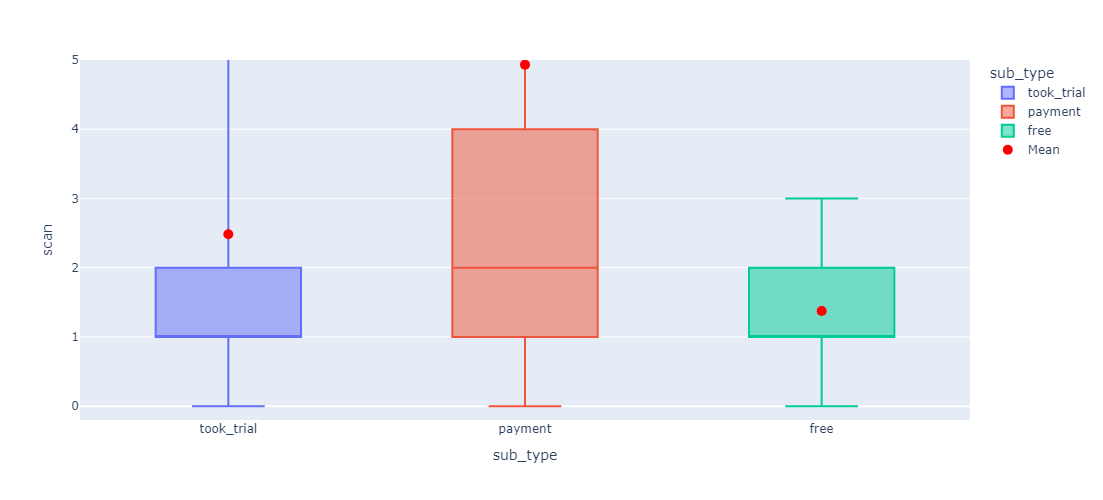

In [311]:
import plotly.graph_objects as go

fig = px.box(data_frame=sorted_df, x='sub_type', y='scan', points=False, range_y = [-0.2, 5], width=1100, height=500, color='sub_type')
fig.add_trace(
    go.Scatter(
        x=sorted_df[['sub_type', 'adjustment', 'scan']].groupby('sub_type')['scan'].describe().index,
        y=sorted_df[['sub_type', 'adjustment', 'scan']].groupby('sub_type')['scan'].describe()['mean'],
        mode='markers',
        marker=dict(color='red', size=10),
        name='Mean'
    )
)

In [228]:
means = sorted_df[['sub_type', 'adjustment', 'scan']].groupby('sub_type')['scan'].describe()['mean']

In [229]:
sorted_df[['sub_type', 'adjustment', 'scan']].groupby('sub_type')['scan'].describe().index

Index(['free', 'payment', 'took_trial'], dtype='object', name='sub_type')

<Axes: xlabel='event_type'>

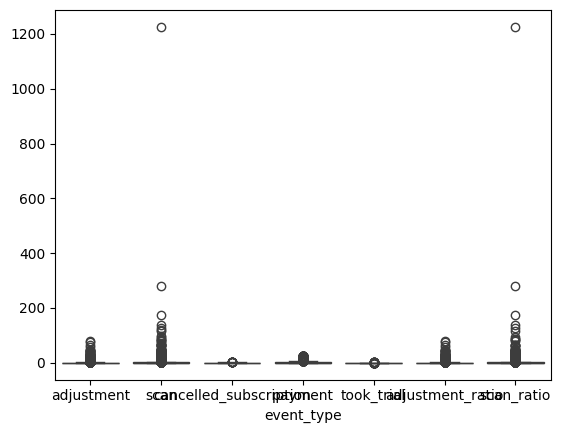

In [230]:
sns.boxplot(data=sorted_df)

              count      mean       std  min  25%  50%  75%   max
sub_type                                                         
free        25462.0  1.740712  1.559273  0.0  1.0  1.0  2.0  16.0
payment       497.0  3.136821  3.116908  0.0  1.0  2.0  4.0  16.0
took_trial   5270.0  2.128843  2.112580  0.0  1.0  1.0  2.0  16.0


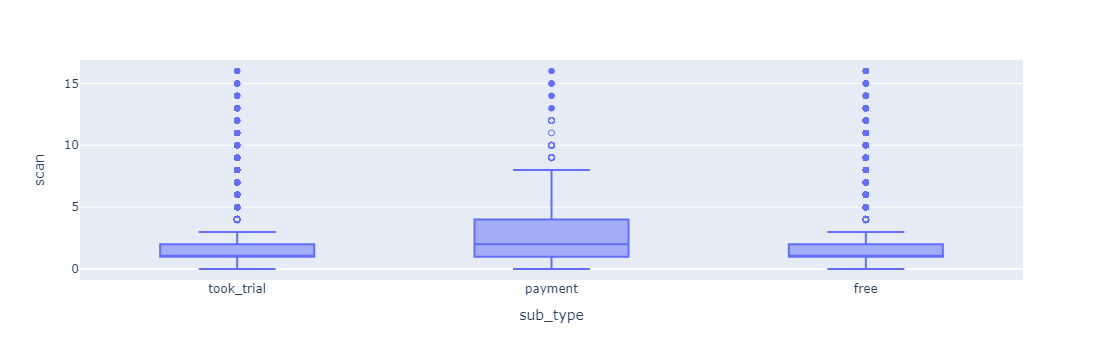

In [231]:
import pandas as pd
import plotly.express as px

# Assuming merged_df123 is your DataFrame and already contains the necessary columns
# First, sort the DataFrame by sub_type
sorted_df = merged_df123.sort_values(by='sub_type', ascending=False)

# Define a function to remove outliers based on IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.03)
    Q3 = df[column].quantile(0.97)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the 'scan' column
cleaned_df = remove_outliers(sorted_df, 'scan')

# Generate the descriptive statistics after removing outliers
desc_stats = cleaned_df[['sub_type', 'adjustment', 'scan']].groupby('sub_type')['scan'].describe()
print(desc_stats)

# Create the box plot with the cleaned DataFrame
fig = px.box(data_frame=cleaned_df, x='sub_type', y='scan', points='suspectedoutliers')
fig.show()

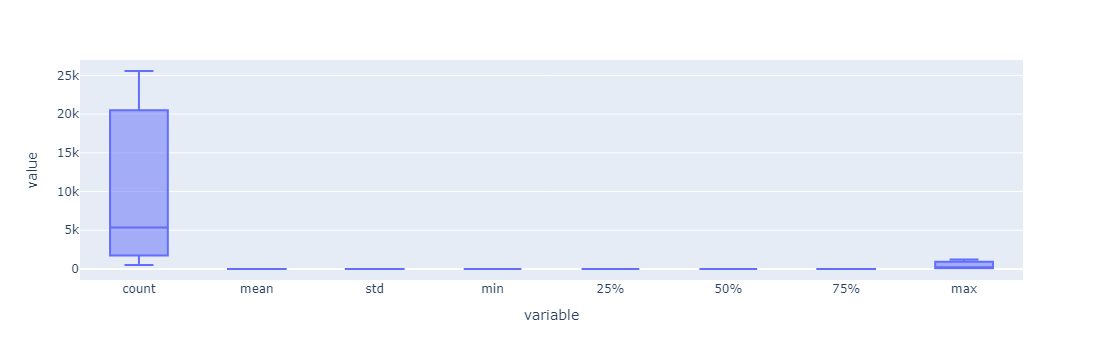

In [232]:
px.box(data_frame = merged_df123[['sub_type', 'adjustment', 'scan']].groupby('sub_type')['scan'].describe())

In [233]:
merged_df123[merged_df123['scan'] == merged_df123[merged_df123['sub_type'] == 'payment']['adjustment'].max()]

event_type                                        user_id    sub_type  \
2442        scanner2#14c2c89f-e80f-4477-8fa1-159862e290d9  took_trial   
3158        scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966        free   
16084       scanner2#83cf600e-a3a6-43a8-974b-31a6aabb0620  took_trial   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  \
2442                 2    38                     1.0      3.0         1.0   
3158                59    38                     NaN      NaN         NaN   
16084                0    38                     1.0      0.0         1.0   

event_type  adjustment_ratio  scan_ratio  
2442                     2.0        38.0  
3158                    59.0        38.0  
16084                    0.0        38.0

In [234]:
df_pay[df_pay['user_id'] == 'scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966']

Empty DataFrame
Columns: [user_id, event_type, event_time, date, month, end_sub]
Index: []

In [235]:
df_event[df_event['user_id'] == 'scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966']

user_id  event_type  \
49940   scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966        scan   
49941   scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966        scan   
49942   scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966        scan   
49943   scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966  adjustment   
49944   scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966        scan   
...                                               ...         ...   
180442  scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966  adjustment   
180443  scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966  adjustment   
180466  scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966        scan   
180467  scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966  adjustment   
180468  scanner2#1a887e67-de0b-4205-800a-8ab1fa7d7966  adjustment   

                    event_time        date  day  
49940  2023-01-03 22:35:59.439  2023-01-03  NaN  
49941  2023-01-03 22:47:34.039  2023-01-03  NaN  
49942  2023-01-03 22:46:11.321  2023-01-03  NaN  
49943  2023-01-03 22:46:32.055  2023-01-03  NaN  
49944  2023-01-03 22:54:10.418  2023-01-03  NaN  
...                        ...         ...  ...  
180442 2023-01-05 17:24:35.090  2023-01-05  NaN  
180443 2023-01-05 17:24:44.012  2023-01-05  NaN  
180466 2022-12-13 10:33:33.832  2022-12-13  NaN  
180467 2022-12-13 10:32:02.870  2022-12-13  NaN  
180468 2022-12-13 10:32:14.583  2022-12-13  NaN  

[98 rows x 5 columns]

In [236]:
merged_df123[merged_df123['scan'] == merged_df123[merged_df123['sub_type'] == 'free']['scan'].max()]

event_type                                        user_id sub_type  \
20178       scanner2#a3b20430-67be-4153-8fe2-3613c01b976f     free   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  \
20178               80  1226                     NaN      NaN         NaN   

event_type  adjustment_ratio  scan_ratio  
20178                   80.0      1226.0

In [237]:
merged_df123[merged_df123['user_id'] == 'scanner2#00076efd-13ee-40bb-9338-92dd6307606f']

event_type                                        user_id    sub_type  \
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  \
3                    1     1                     1.0     21.0         1.0   

event_type  adjustment_ratio  scan_ratio  
3                        1.0         1.0

In [238]:
merged_df123[merged_df123['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

event_type                                        user_id    sub_type  \
10908       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57     payment   
10909       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57  took_trial   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  \
10908                1   118                     1.0     18.0         1.0   
10909                0    23                     1.0     18.0         1.0   

event_type  adjustment_ratio  scan_ratio  
10908               0.055556    6.555556  
10909               0.000000   23.000000

In [239]:
merged_df123[merged_df123['user_id'] == 'scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5']

event_type                                        user_id sub_type  \
2           scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5     free   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  \
2                    0     2                     NaN      NaN         NaN   

event_type  adjustment_ratio  scan_ratio  
2                        0.0         2.0

In [240]:
merged_df123[merged_df123['user_id'] == 'scanner2#00076efd-13ee-40bb-9338-92dd6307606f']

event_type                                        user_id    sub_type  \
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   

event_type  adjustment  scan  cancelled_subscription  payment  took_trial  \
3                    1     1                     1.0     21.0         1.0   

event_type  adjustment_ratio  scan_ratio  
3                        1.0         1.0

In [241]:
user_event_counts1[user_event_counts1['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

event_type                                        user_id    sub_type  \
10908       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57     payment   
10909       scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57  took_trial   

event_type  adjustment  scan  
10908                1   118  
10909                0    23

In [242]:
user_event_counts1[user_event_counts1['user_id'] == 'scanner2#00076efd-13ee-40bb-9338-92dd6307606f']

event_type                                        user_id    sub_type  \
3           scanner2#00076efd-13ee-40bb-9338-92dd6307606f  took_trial   

event_type  adjustment  scan  
3                    1     1

In [243]:
subscription_counts[subscription_counts['user_id'] == 'scanner2#00076efd-13ee-40bb-9338-92dd6307606f']

event_type                                        user_id  \
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f   

event_type  cancelled_subscription  payment  took_trial  
0                                1       21           1

In [244]:
merged_df = subscription_counts.merge(user_event_counts1, on='user_id')

In [245]:
merged_df

event_type                                        user_id  \
0           scanner2#00076efd-13ee-40bb-9338-92dd6307606f   
1           scanner2#00167300-479e-4372-9c26-8031f0db0201   
2           scanner2#0037d75f-06e2-4fc3-a5e7-37ac97a705f6   
3           scanner2#0039e228-3403-4906-90a2-60b2f33aa1fb   
4           scanner2#003d55d1-3f5d-4ca9-b2fb-f4ae1113482b   
...                                                   ...   
5885        scanner2#ffc65df4-8f41-4228-96df-4a26d64a242b   
5886        scanner2#ffc65df4-8f41-4228-96df-4a26d64a242b   
5887        scanner2#ffc7f0ed-3a15-4425-be00-9c6004b7b793   
5888        scanner2#ffcb262d-9e25-4b8d-977c-0b7b338ad742   
5889        scanner2#ffd3c2a8-7c19-4aaf-940a-f65de066e0db   

event_type  cancelled_subscription  payment  took_trial    sub_type  \
0                                1       21           1  took_trial   
1                                1        0           1  took_trial   
2                                0        0           1  took_trial   
3                                0        0           1  took_trial   
4                                1        0           1  took_trial   
...                            ...      ...         ...         ...   
5885                             1        2           1     payment   
5886                             1        2           1  took_trial   
5887                             0        0           1  took_trial   
5888                             1        0           1  took_trial   
5889                             1        0           1  took_trial   

event_type  adjustment  scan  
0                    1     1  
1                    1     1  
2                    0     1  
3                    0     1  
4                    0     5  
...                ...   ...  
5885                 0     1  
5886                 2     3  
5887                 1     2  
5888                 0     1  
5889                 0     1  

[5890 rows x 7 columns]

In [ ]:
# df_filtered1 = dfy_filtered[dfy_filtered['event_type'].isin(['scan', 'adjustment'])]

user_event_counts1 = dfy_filtered.groupby('user_id')['sub_type'].value_counts().reset_index()

In [ ]:
user_event_counts1.reset_index()

In [ ]:
user_event_counts

In [ ]:
user_event_counts[['sub_type', 'adjustment', 'scan']].groupby('sub_type').describe()

In [ ]:
df_filte['sub_type'].value_counts()

In [ ]:
user_event_counts[user_event_counts['user_id'] == ]

In [ ]:
df_pay[df_pay['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

In [ ]:
df_event[df_event['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

In [ ]:
dfy[dfy['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']

In [ ]:
dfy

In [ ]:
dfy['sub_type'] = dfy.apply(categorize_subscription, axis=1)

In [ ]:
dfy

In [ ]:
def period_of_sub(row):
    if row['sub_type'] == 'free':
        return 'free_user'
    return f"{row['time_of_buy']}_{row['end_of_sub']}"

In [ ]:
dfy['subscription_period'] = dfy.apply(period_of_sub, axis=1)

In [ ]:
dfy

In [ ]:
dfy['subscription_period'] = dfy.apply(
    lambda row: f"{row['time_of_buy']}_{row['end_of_sub']}", axis=1
)

In [ ]:
period_event_counts = dfy.groupby(['user_id', 'subscription_period', 'sub_type', 'event_type']).size().unstack(fill_value=0).reset_index()

# Групування по типу підписки та обчислення середньої кількості подій на період
# average_events_per_period = period_event_counts.groupby('sub_type')[['adjustment',	'onboarding',	'scan']].describe()

In [ ]:
period_event_counts = (
    dfy.groupby(['user_id', 'subscription_period', 'sub_type'])
       .agg({
           'event_type': lambda x: (x == 'adjustment').sum(),
           'event_type': lambda x: (x == 'scan').sum()
       })
       .rename(columns={'event_type': 'event_count'})
       .reset_index()
)

In [ ]:
period_event_counts

In [ ]:
period_event_counts

In [ ]:
average_events_per_period.drop(columns='onboarding', axis=0, inplace=True)

In [ ]:
average_events_per_period

In [ ]:
user_event_counts[user_event_counts['scan'] == user_event_counts[user_event_counts['sub_type'] == 'payment']['scan'].max()]

In [ ]:
# period_event_counts['scan'].max()

In [ ]:
period_event_counts[period_event_counts['scan'] == period_event_counts[period_event_counts['sub_type'] == 'payment']['scan'].max()]

In [ ]:
period_event_counts[period_event_counts['user_id'] == 'scanner2#5a9bd2af-37a1-4d82-a35e-5032082aec57']